<a href="https://colab.research.google.com/github/saabir2003/pwskills/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install opendatasets
import opendatasets as od

In [412]:
od.download("https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=sharing")

66450it [00:00, 141477919.19it/s]

Downloaded to  ./BIKE DETAILS.csv


In [413]:
df=pd.read_csv('/content/BIKE DETAILS.csv')

#Questions:

###1. What is the range of selling prices in the dataset?

In [414]:
df.head()

name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [415]:
max(df['selling_price'])

760000

In [416]:
min(df['selling_price'])

5000

In [417]:
range=max(df['selling_price'])-min(df['selling_price'])

In [418]:
print("The range of selling price is",range)

The range of selling price is 755000


###2. What is the median selling price for bikes in the dataset?

In [419]:
median_price=df['selling_price'].median()

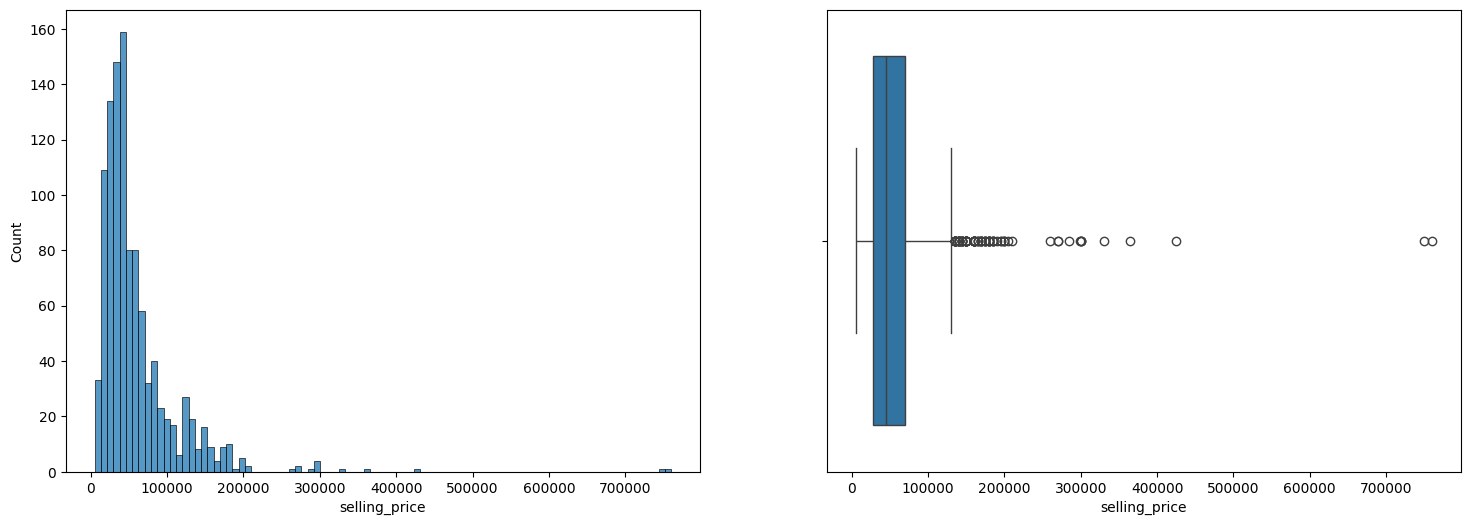

In [420]:
#plot to explain that
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='selling_price')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='selling_price')
plt.show()

In [421]:
print("The median selling price of bikes in dataset is ",median_price)

The median selling price of bikes in dataset is  45000.0


#3.  What is the most common seller type?

In [422]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [423]:
df['seller_type'].value_counts()


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [424]:
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

<Figure size 1800x600 with 0 Axes>

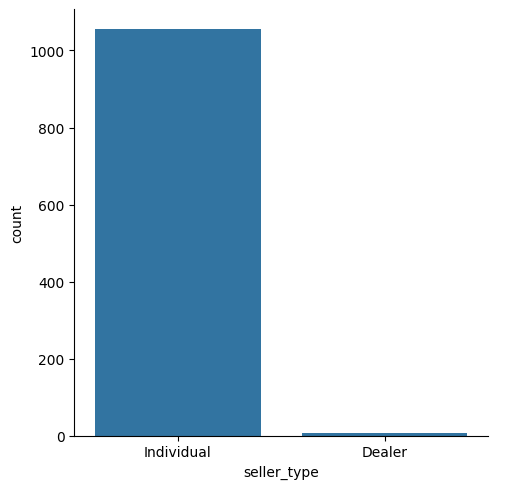

In [425]:
plt.figure(figsize=(18,6))
sns.catplot(data=df,x='seller_type',kind='count')
plt.show()

In [426]:
print("The most common seller type is Individual")

The most common seller type is Individual


###The most common seller type is Individual

###4.How many bikes have driven more than 50,000 kilometers?

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [428]:
len(df[df['km_driven']>=50000].km_driven)

207

In [429]:
print("Bikes that have driven more than 50000 Km are",len(df[df['km_driven']>=50000].km_driven))

Bikes that have driven more than 50000 Km are 207


###4.What is the average km_driven value for each ownership type?

In [430]:
df['km_driven'].mean()

np.float64(34359.83317624882)

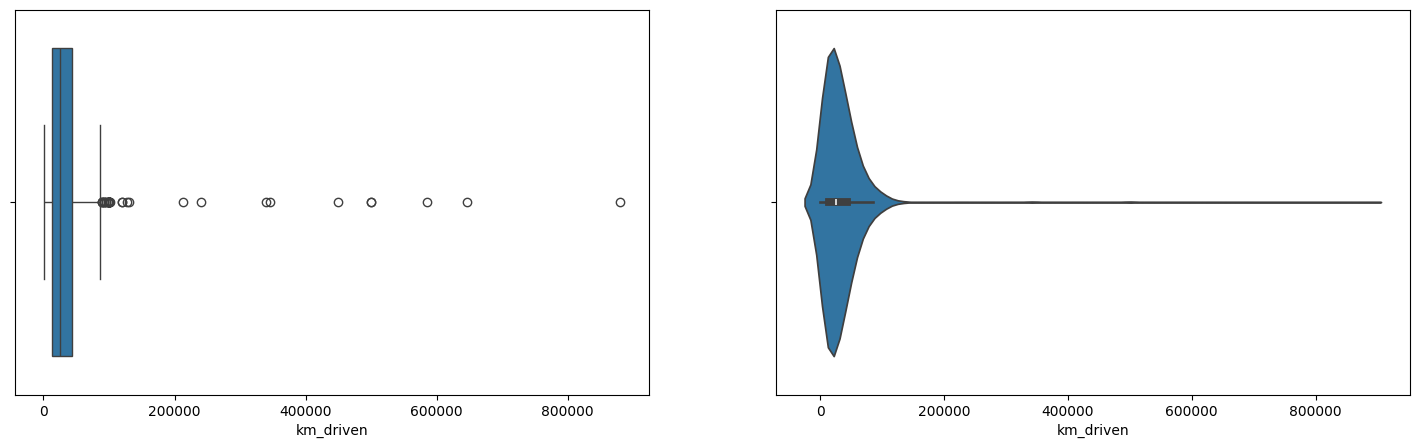

In [431]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='km_driven')

plt.subplot(1,2,2)
sns.violinplot(data=df,x='km_driven')
plt.show()

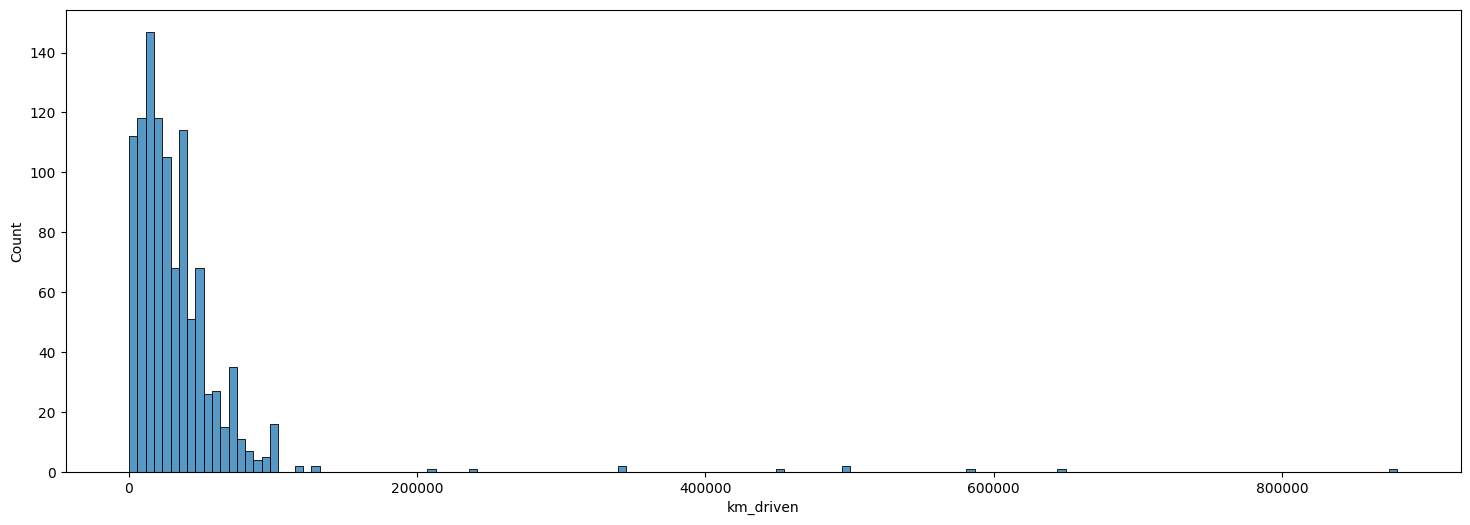

In [432]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='km_driven')
plt.show()

In [433]:
#As we can see it contains outliers
df['km_driven'].describe()

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [434]:
print(df['km_driven'].quantile(0.25))
print(df['km_driven'].quantile(0.75))

13500.0
43000.0


In [435]:
IQR=df['km_driven'].quantile(0.75)-df['km_driven'].quantile(0.25)
lower_fence=df['km_driven'].quantile(0.25)-1.5*IQR
upper_fence=df['km_driven'].quantile(0.75)+1.5*IQR
print(lower_fence,upper_fence)

-30750.0 87250.0


In [436]:
new_df=df[df['km_driven']<upper_fence]

In [437]:
new_df.shape

(1022, 7)

In [438]:
df.shape

(1061, 7)

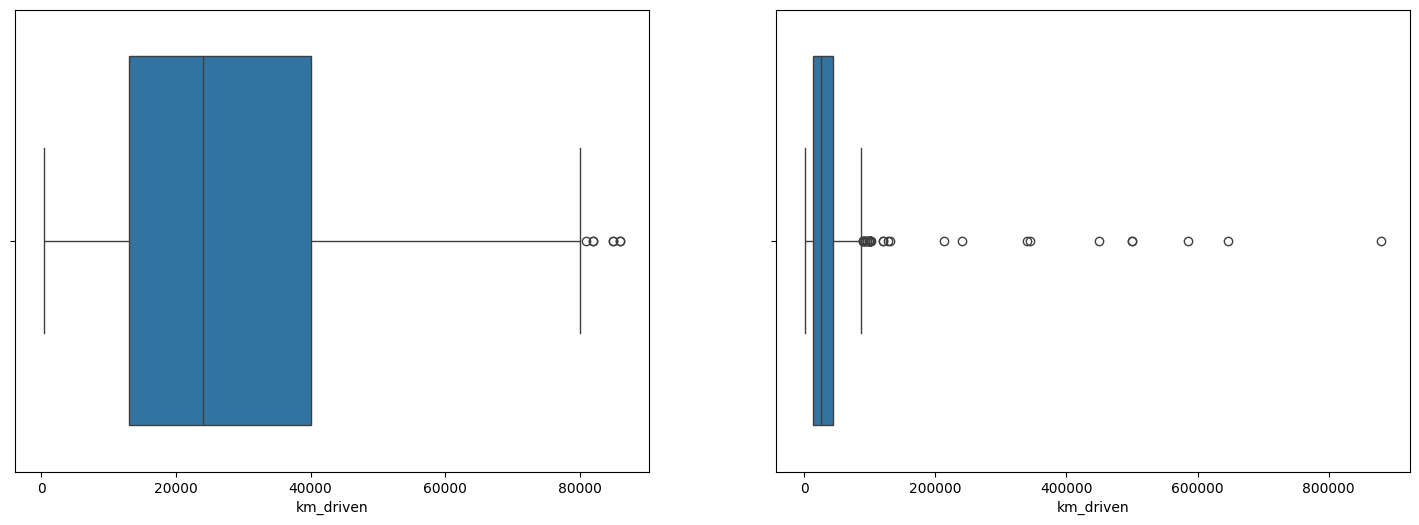

In [439]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(x='km_driven',data=new_df)

plt.subplot(1,2,2)
sns.boxplot(x='km_driven',data=df)
plt.show()

In [440]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1022 non-null   object 
 1   selling_price      1022 non-null   int64  
 2   year               1022 non-null   int64  
 3   seller_type        1022 non-null   object 
 4   owner              1022 non-null   object 
 5   km_driven          1022 non-null   int64  
 6   ex_showroom_price  607 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 63.9+ KB


In [441]:
df.groupby(['owner'])['km_driven'].mean()# with outliers

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [442]:
owkm=new_df.groupby(['owner'])['km_driven'].mean()#without outliers
owkm

owner
1st owner    27396.447309
2nd owner    33893.555556
3rd owner    33292.181818
4th owner    27250.000000
Name: km_driven, dtype: float64

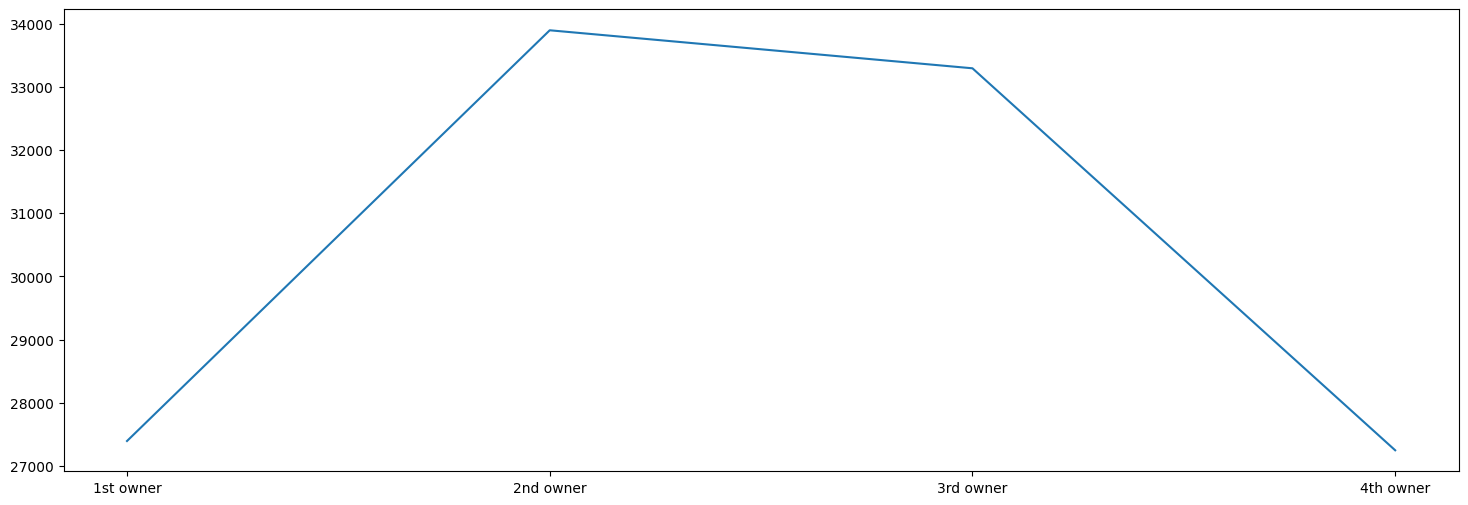

In [443]:
plt.figure(figsize=(18,6))
plt.plot(owkm)

### 6.What proportion of bikes are from the year 2015 or older?

In [444]:
no_of_bike_older_than_2015=len(new_df[new_df['year']<=2015])

In [445]:
total_no_of_bikes=new_df['year'].count()
total_no_of_bikes

np.int64(1022)

In [446]:
p=(no_of_bike_older_than_2015)/(total_no_of_bikes)
p

np.float64(0.5547945205479452)

the propotion of bikes older than 2015 is 0.55

### 7. What is the trend of missing values across the dataset?

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [448]:
# As we can see only ex_showroom_price has null values
# The no of null values are
df.ex_showroom_price.isna().sum()

np.int64(435)

### 8.What is the highest ex_showroom_price recorded, and for which bike?

In [449]:
df[df['ex_showroom_price']==df['ex_showroom_price'].max()]

name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0

In [450]:
#The highest ex_showroom_price is given
df[df['ex_showroom_price']==df['ex_showroom_price'].max()]

name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0

In [451]:
print("name of bike is",(df[df['ex_showroom_price']==df['ex_showroom_price'].max()].name))

name of bike is 134    Harley-Davidson Street Bob
Name: name, dtype: object


###9. What is the total number of bikes listed by each seller type?

In [452]:
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

### 10 .What is the relationship between selling_price and km_driven for first-owner bikes?

In [453]:
df['owner'].value_counts()

owner
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64

In [454]:
df[df['owner']=='1st owner']

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
5                        Honda CB Twister          18000  2010  Individual   
...                                   ...            ...   ...         ...   
1055                        Bajaj  ct 100          18000  2017  Individual   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
5     1st owner      60000            53857.0  
...         ...        ...                ...  
1055  1st owner      35000            32000.0  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[924 rows x 7 columns]

In [455]:
data = df[df['owner']=='1st owner'][['selling_price','km_driven']]
correlation = data.corr(method='pearson')
print("The correaltion between is ",correlation)

The correaltion between is                 selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000


### 11.Identify and remove outliers in the km_driven column using the IQR method?

In [456]:
df['km_driven'].describe()

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

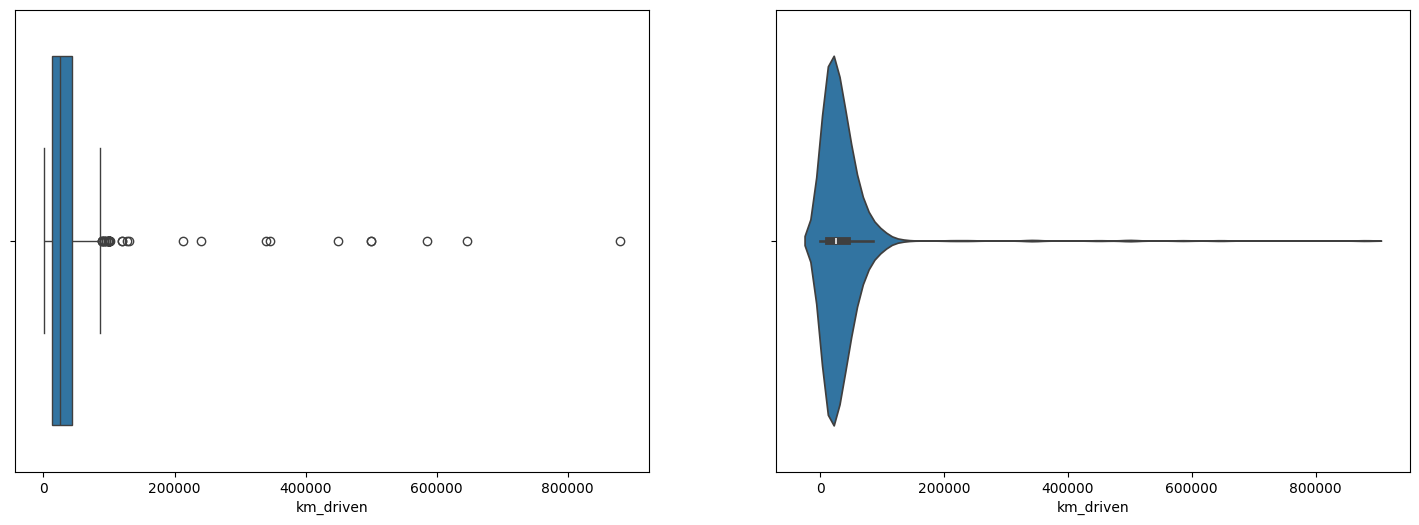

In [457]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='km_driven')

plt.subplot(1,2,2)
sns.violinplot(data=df,x='km_driven')
plt.show()

In [458]:
quantile25=df['km_driven'].quantile(0.25)
quantile75=df['km_driven'].quantile(0.75)
print(quantile25,quantile75)
IQR=quantile75-quantile25
print(IQR)

13500.0 43000.0
29500.0


In [459]:
kmlower=quantile25-(IQR*1.5)
kmupper=quantile75+(IQR*1.5)
print(kmlower,kmupper)

-30750.0 87250.0


In [460]:
n_df=df[df['km_driven']<kmupper]

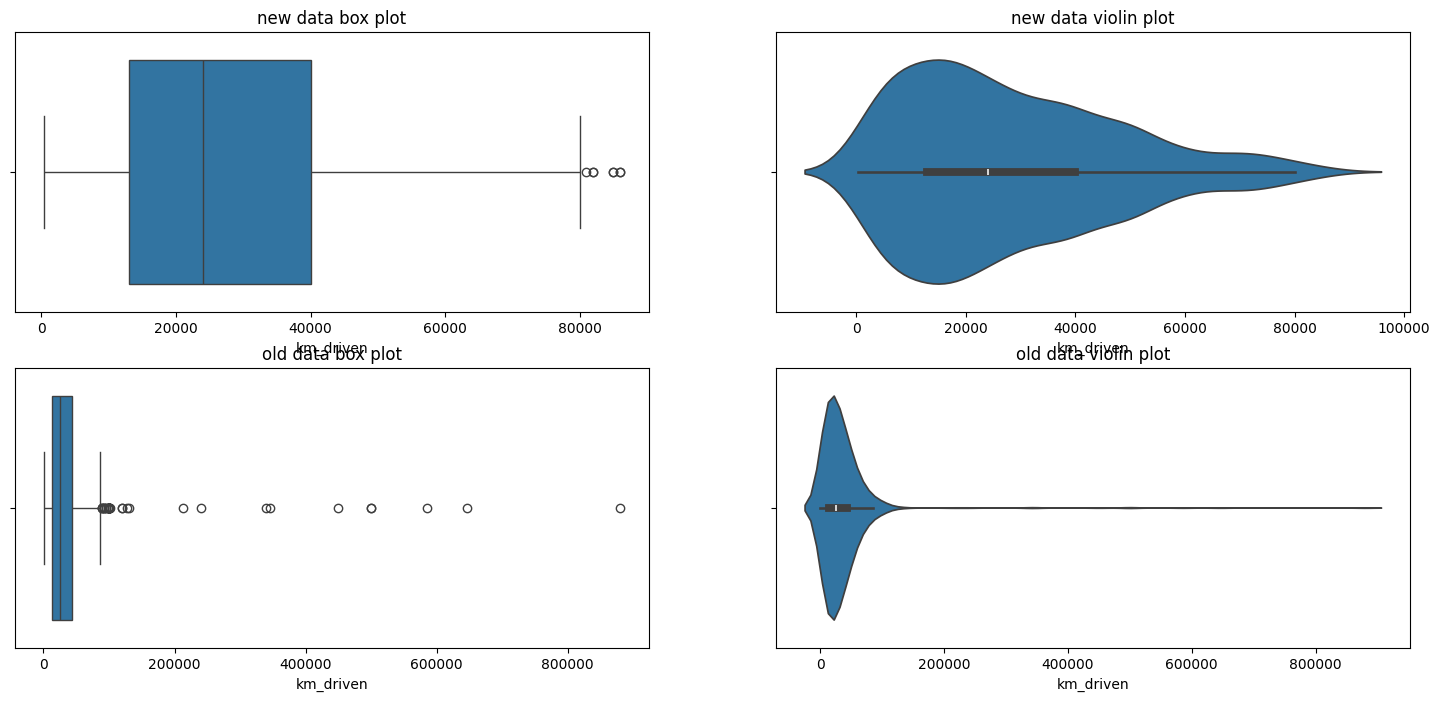

In [461]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.title('new data box plot')
sns.boxplot(data=n_df, x='km_driven')

plt.subplot(2,2,2)
plt.title('new data violin plot')
sns.violinplot(data=n_df,x='km_driven')

plt.subplot(2,2,3)
plt.title('old data box plot')
sns.boxplot(data=df,x='km_driven')

plt.subplot(2,2,4)
plt.title('old data violin plot')
sns.violinplot(data=df,x='km_driven')
plt.show()



In [462]:
# therefore we cleared all the outliers the new is n_df

###12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

In [463]:
n_df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [464]:
n_df['year'].value_counts()

year
2017    132
2018    131
2016    103
2015     99
2014     89
2019     86
2013     71
2012     66
2011     58
2010     57
2008     25
2009     23
2007     22
2006     19
2005     14
2000      6
2020      3
2002      3
2004      3
1998      3
2001      2
1988      1
1999      1
1991      1
1997      1
2003      1
1993      1
1995      1
Name: count, dtype: int64

In [465]:
ytsm=n_df.groupby('year').agg({'selling_price':'mean'})

In [466]:
ytsm.head()

selling_price
year               
1988        20000.0
1991         6000.0
1993       130000.0
1995       150000.0
1997        25000.0

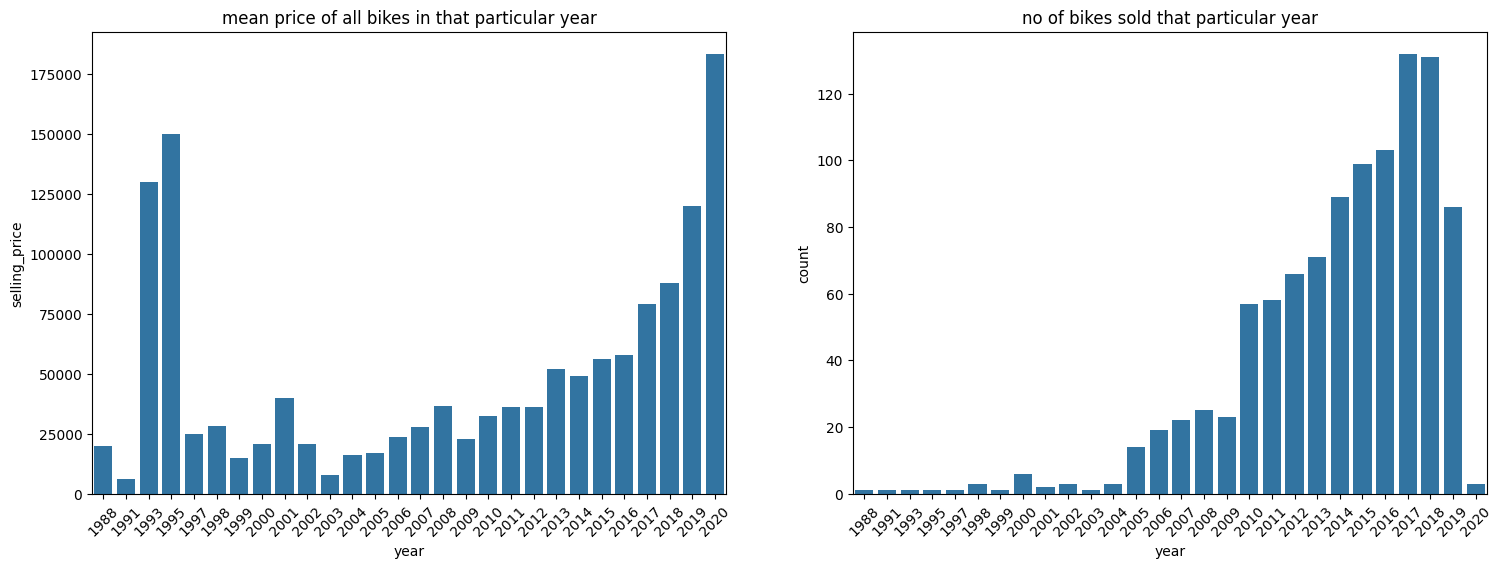

In [467]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x='year',data=ytsm,y='selling_price')
plt.xticks(rotation=45)
plt.title("mean price of all bikes in that particular year")

plt.subplot(1,2,2)
sns.countplot(data=n_df,x='year')
plt.xticks(rotation=45)
plt.title("no of bikes sold that particular year")
plt.show()

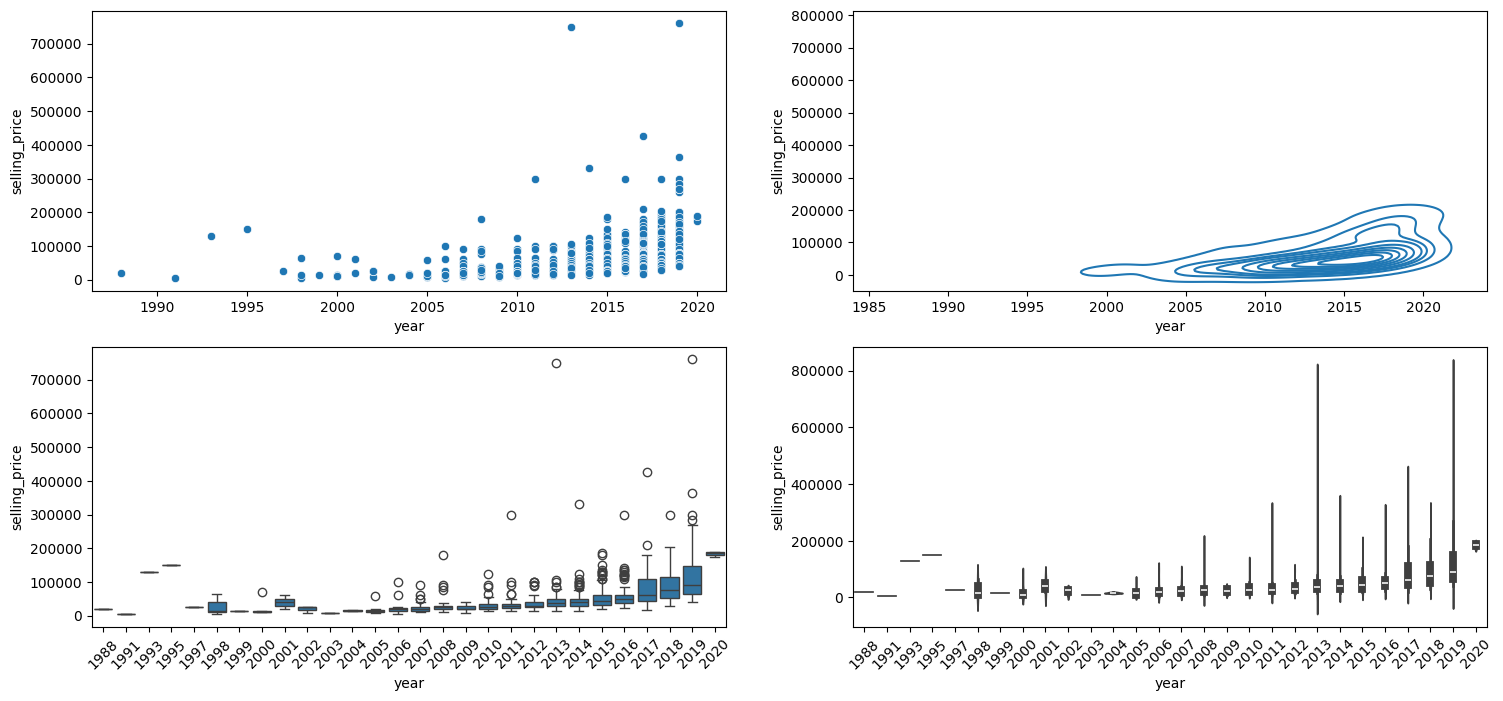

In [468]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.scatterplot(x='year',y='selling_price',data=n_df)

plt.subplot(2,2,2)
sns.kdeplot(data=n_df,x='year',y='selling_price')

plt.subplot(2,2,3)
sns.boxplot(data=n_df,x='year',y='selling_price')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.violinplot(data=n_df,x='year',y='selling_price')
plt.xticks(rotation=45)
plt.show()

### 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [469]:
n_df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [470]:
curr_year=2025

In [471]:
n_df['bike_age']=curr_year-df['year']

In [472]:
n_df['depre_price']=df['ex_showroom_price']-df['selling_price']

<Axes: xlabel='bike_age'>

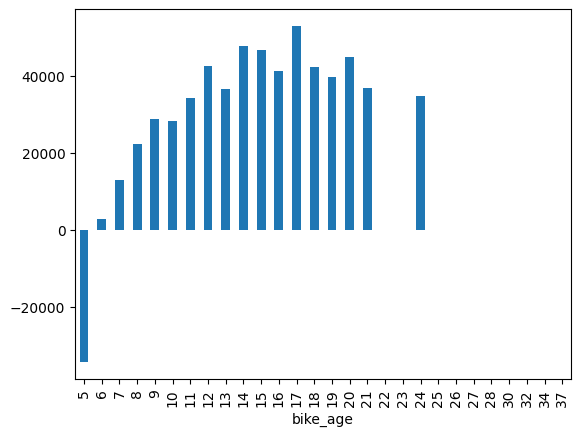

In [687]:
n_df.groupby('bike_age')['depre_price'].mean().plot(kind='bar')

In [691]:
n_df.groupby('bike_age')['depre_price'].mean().dropna()

bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22307.226190
9     28750.407407
10    28314.291139
11    34287.812500
12    42766.423077
13    36609.529412
14    47758.750000
15    46757.280000
16    41398.909091
17    53021.166667
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depre_price, dtype: float64

### 14.Which bike names are priced significantly above the average price for their manufacturing year?

In [476]:
n_df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'bike_age', 'depre_price'],
      dtype='object')

In [477]:
avg_price_in_manu_year=n_df.groupby(['year','name']).agg({'ex_showroom_price':'mean','name':'count'}).dropna()

In [478]:
print(avg_price_in_manu_year)

                                          ex_showroom_price  name
year name                                                        
2001 TVS Victor                                     54852.0     1
2004 TVS Victor                                     54852.0     1
2005 TVS Victor                                     54852.0     1
2006 Bajaj Discover 125                             57549.0     1
     Honda Activa [2000-2015]                       50267.0     2
...                                                     ...   ...
2019 Yamaha Fascino 110                             57112.0     2
     Yamaha Saluto                                  59844.0     1
     Yamaha YZF R15 V3                             146400.0     1
     Yamaha YZF R3                                 351680.0     1
2020 Royal Enfield Classic Gunmetal Grey           155740.0     1

[403 rows x 2 columns]


In [479]:
avg_price_in_manu_year_and_count=n_df.groupby(['year']).agg({'ex_showroom_price':'mean','name':'count'}).dropna()

In [480]:
avg_price_in_manu_year_and_count

ex_showroom_price  name
year                         
2001       54852.000000     2
2004       54852.000000     3
2005       54852.000000    14
2006       51164.500000    19
2007       67382.333333    22
2008       74537.833333    25
2009       63762.545455    23
2010       80117.280000    57
2011       85040.000000    58
2012       69256.558824    66
2013       95641.423077    71
2014       84395.625000    89
2015       82605.430380    99
2016       82234.172840   103
2017       92842.940476   132
2018      100860.857143   131
2019      114079.562500    86
2020      155740.000000     3

In [481]:
n_df.groupby('year')

### 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap?

In [482]:
n_df.describe().T

count          mean           std      min      25%  \
selling_price      1022.0  60810.166341  56868.037871   5000.0  30000.0   
year               1022.0   2014.014677      4.242962   1988.0   2012.0   
km_driven          1022.0  28203.415851  19552.083583    350.0  13000.0   
ex_showroom_price   607.0  88565.372323  78560.068654  30490.0  55000.0   
bike_age           1022.0     10.985323      4.242962      5.0      8.0   
depre_price         607.0  28357.655684  32966.804064 -34260.0  14000.0   

                       50%      75%        max  
selling_price      45000.0  72000.0   760000.0  
year                2015.0   2017.0     2020.0  
km_driven          24000.0  40000.0    86000.0  
ex_showroom_price  72973.0  87042.0  1278000.0  
bike_age              10.0     13.0       37.0  
depre_price        24147.0  37000.0   528000.0

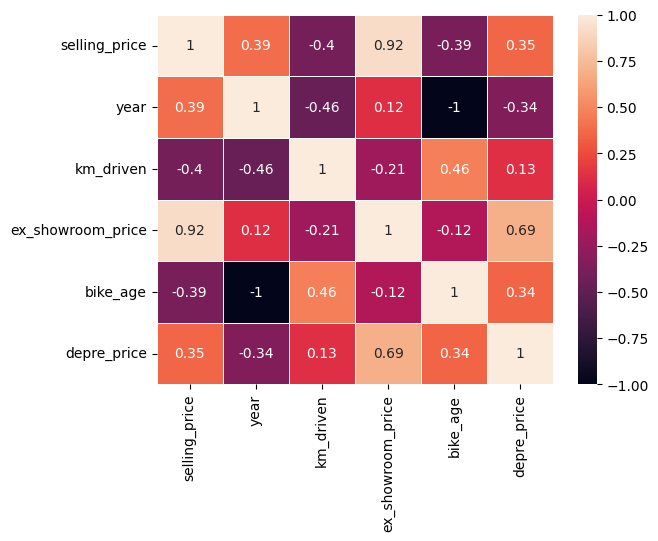

In [483]:
datacorr=n_df.corr(numeric_only=True)
sns.heatmap(datacorr,annot=True,linewidth=0.5)
plt.show()

# EDA assignment 2 (Car Sales)

In [484]:
od.download("https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view?usp=sharing")

3833504it [00:00, 575458328.66it/s]

Downloaded to  ./Car Sale.csv


In [485]:
car_sales=pd.read_csv("/content/Car Sale.csv")

In [486]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


###1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [487]:
car_sales.groupby('Dealer_Name').agg({'Price ($)':"mean"})

Price ($)
Dealer_Name                                                  
Buddy Storbeck's Diesel Service Inc              27217.261563
C & M Motors Inc                                 28111.755200
Capitol KIA                                      28189.703822
Chrysler Plymouth                                27555.526400
Chrysler of Tri-Cities                           28123.091054
Classic Chevy                                    28602.014446
Clay Johnson Auto Sales                          27816.027113
Diehl Motor CO Inc                               27993.929487
Enterprise Rent A Car                            28312.580800
Gartner Buick Hyundai Saab                       28247.621019
Hatfield Volkswagen                              27853.712242
Iceberg Rentals                                  28522.958533
McKinney Dodge Chrysler Jeep                     27684.096979
Motor Vehicle Branch Office                      27956.739617
Nebo Chevrolet                                   27818.889415
New Castle Ford Lincoln Mercury                  27867.131955
Pars Auto Sales                                  28013.060317
Pitre Buick-Pontiac-Gmc of Scottsdale            27404.248408
Progressive Shippers Cooperative Association No  27884.264036
Rabun Used Car Sales                             28527.536177
Race Car Help                                    28163.372706
Ryder Truck Rental and Leasing                   27914.988782
Saab-Belle Dodge                                 28190.139888
Scrivener Performance Engineering                28297.371589
Star Enterprises Inc                             28113.055244
Suburban Ford                                    28112.206758
Tri-State Mack Inc                               28095.562050
U-Haul CO                                        28769.919006

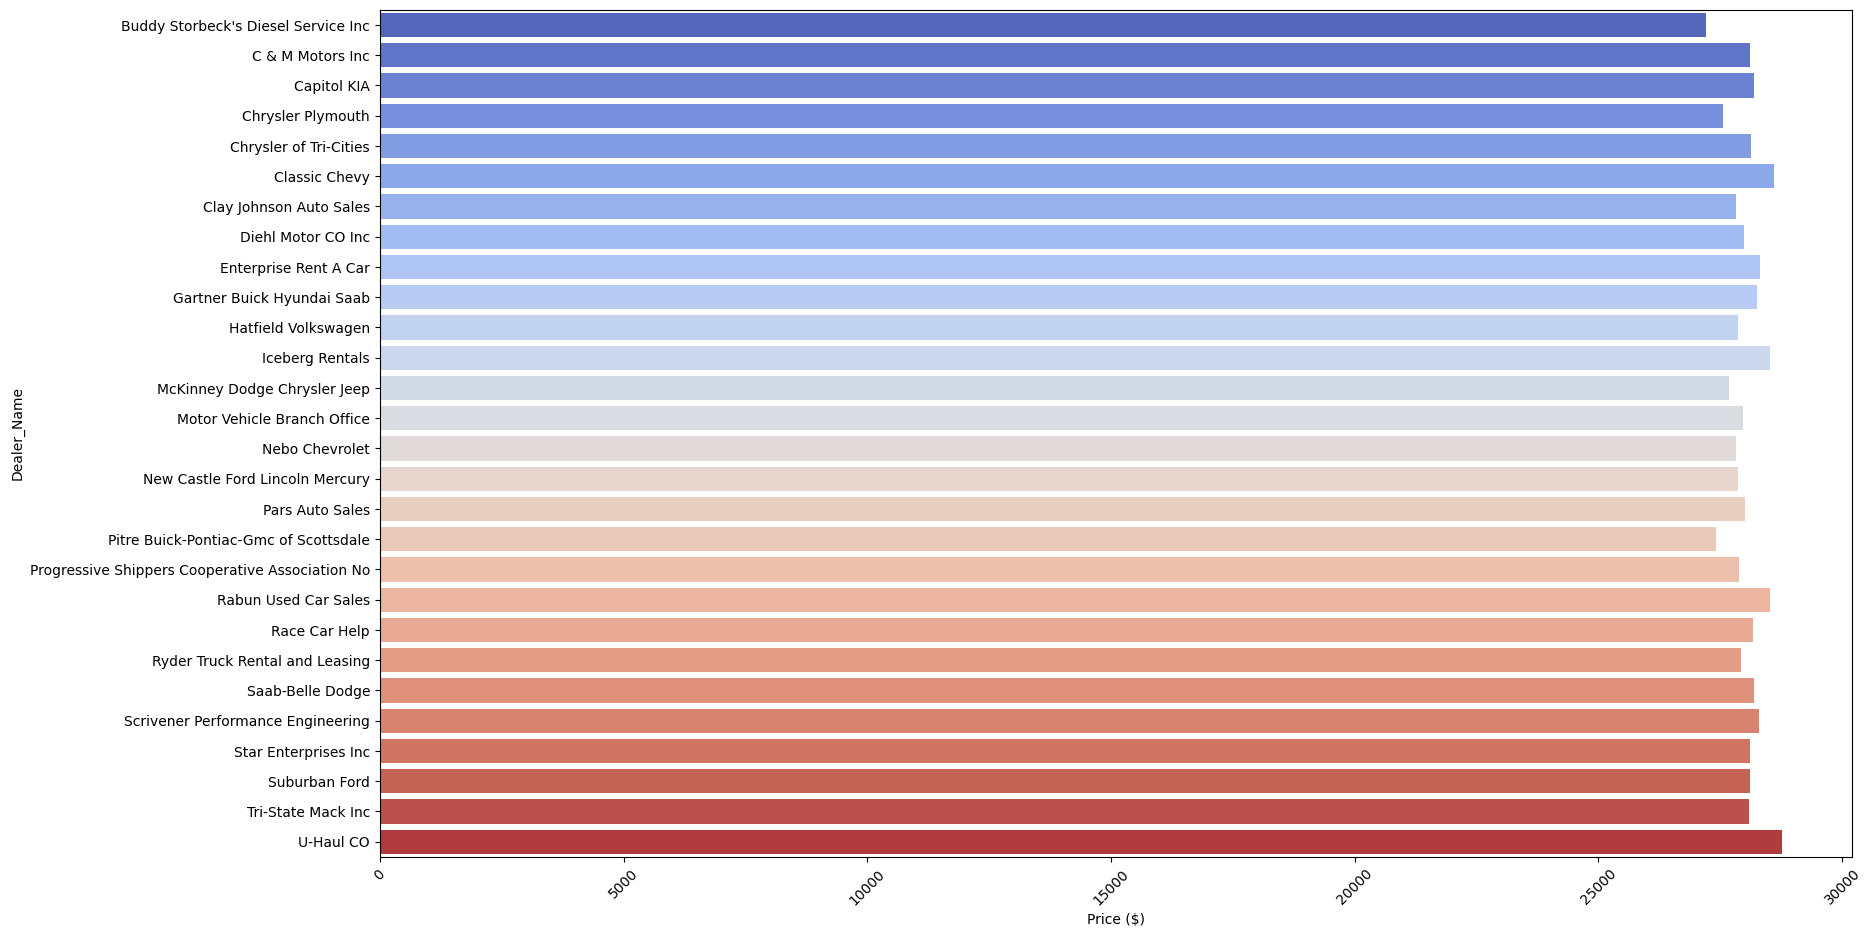

In [488]:
table_of_q1=car_sales.groupby('Dealer_Name').agg({'Price ($)':"mean"})
plt.figure(figsize=(19,11))
#plt.subplot(2,1,1)
sns.barplot(data=table_of_q1,y='Dealer_Name',x='Price ($)',palette="coolwarm")
plt.xticks(rotation=45)

#plt.subplot(2,1,2)
#plt.barh(table_of_q1,table_of_q1.index,color='r')
#plt.xticks(rotation=45)
plt.show()

### 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [489]:
print(car_sales.groupby(['Company']).agg({'Price ($)':'std'}))

               Price ($)
Company                 
Acura        8183.046414
Audi        12904.243867
BMW         15065.578723
Buick       17142.232626
Cadillac    19517.120220
Chevrolet   13311.063223
Chrysler    11583.286811
Dodge       11187.592085
Ford        15849.090227
Honda       11148.629062
Hyundai      3485.982649
Infiniti    13696.332844
Jaguar      10222.531533
Jeep         9459.834418
Lexus       17852.923492
Lincoln     19658.050211
Mercedes-B  15722.807459
Mercury     16445.172195
Mitsubishi  11671.343035
Nissan      16214.264017
Oldsmobile  15711.345857
Plymouth    19065.997338
Pontiac     14348.963592
Porsche      5261.839206
Saab        19653.740089
Saturn      15990.223671
Subaru      12920.771620
Toyota      15367.131714
Volkswagen  12527.124011
Volvo       12933.790185


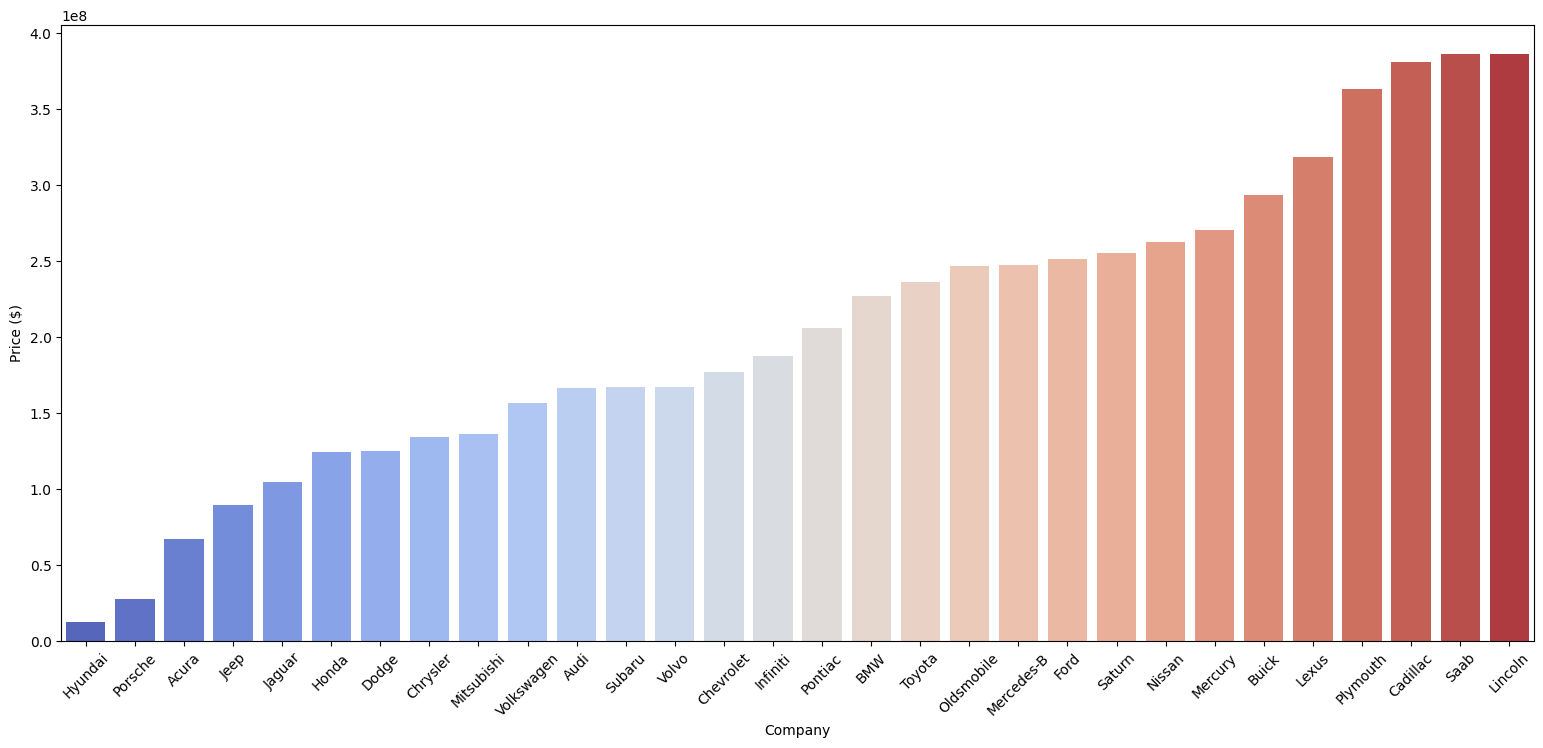

In [490]:
table_of_q2=car_sales.groupby(['Company']).agg({'Price ($)':'var'}).sort_values('Price ($)')
plt.figure(figsize=(19,8))
#plt.subplot(2,1,1)
sns.barplot(data=table_of_q2,x='Company',y='Price ($)',palette="coolwarm")
plt.xticks(rotation=45)

#plt.subplot(2,1,2)
#plt.barh(table_of_q1,table_of_q1.index,color='r')
#plt.xticks(rotation=45)
plt.show()

### car brand (Company) has the highest variation in prices is Lincoln

As we can see in the above table the price variation of cars and their trends

### 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [491]:
car_sales.groupby(['Transmission','Price ($)'])

In [492]:
car_sales['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [493]:
car_sales[car_sales['Transmission']=='Auto']['Price ($)']

0        26000
1        19000
4        24500
7        42000
9        15000
         ...  
23899    62000
23900    19000
23902    16000
23904    31000
23905    27500
Name: Price ($), Length: 12571, dtype: int64

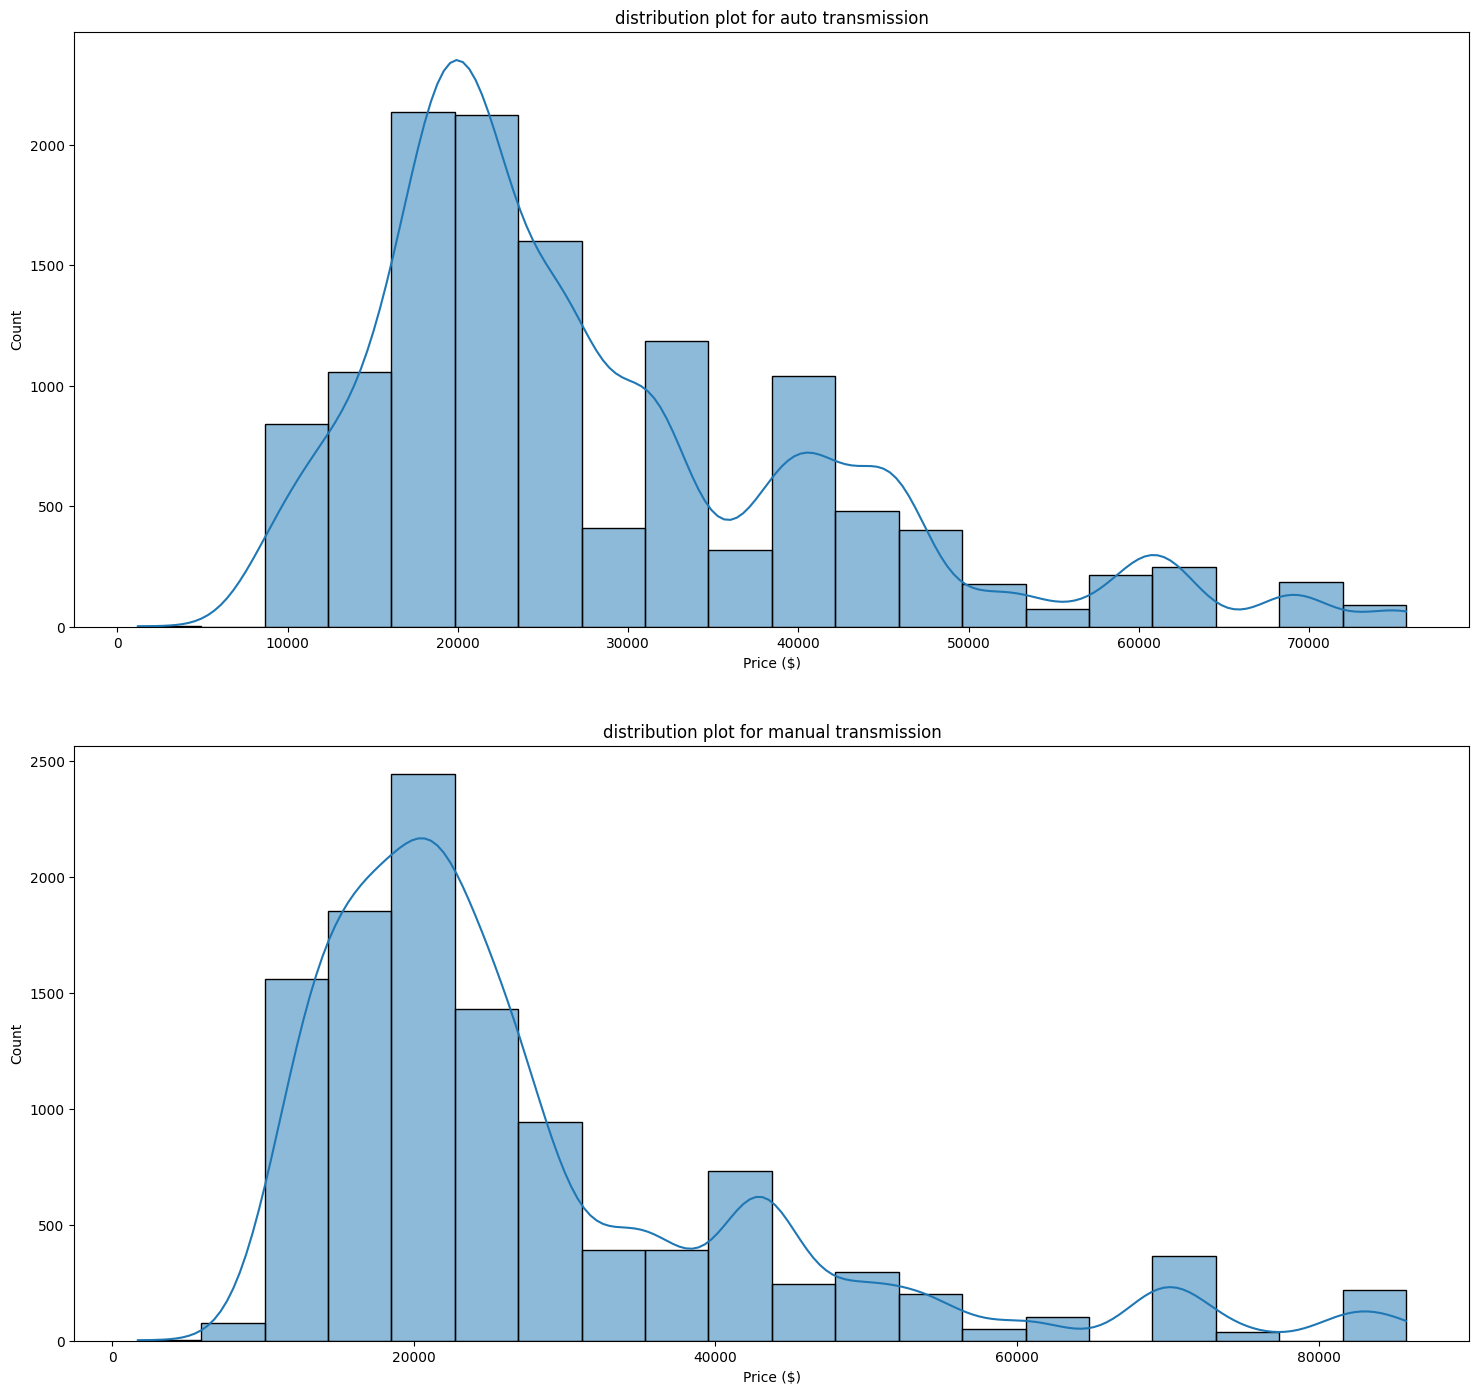

In [494]:
plt.figure(figsize=(18,17))
plt.subplot(2,1,1)
sns.histplot(car_sales[car_sales['Transmission']=='Auto']['Price ($)'],kde=True,bins=20)
plt.title("distribution plot for auto transmission")

plt.subplot(2,1,2)
sns.histplot(car_sales[car_sales['Transmission']=='Manual']['Price ($)'],kde=True,bins=20)
plt.title("distribution plot for manual transmission")
plt.show()

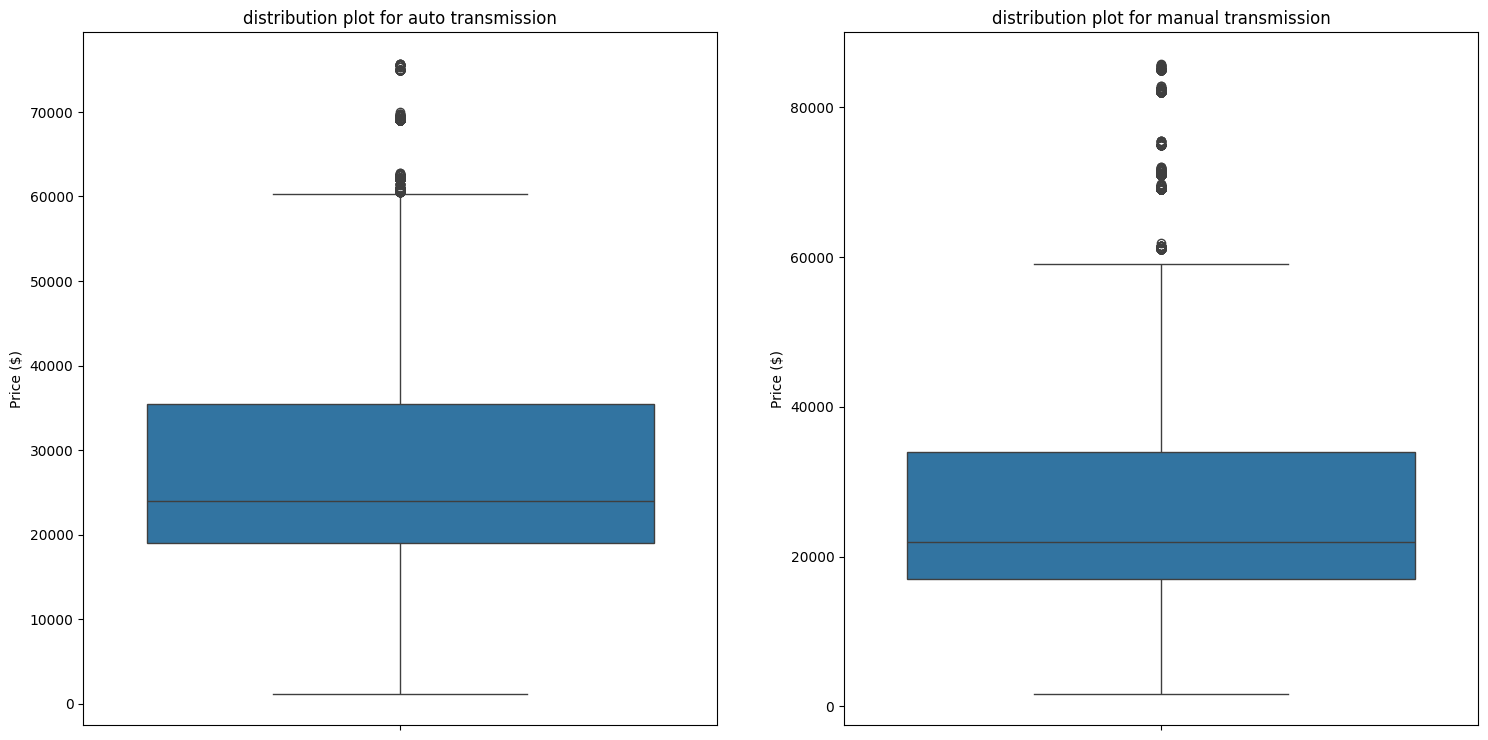

In [495]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
sns.boxplot(car_sales[car_sales['Transmission']=='Auto']['Price ($)'])
plt.title("distribution plot for auto transmission")

plt.subplot(1,2,2)
sns.boxplot(car_sales[car_sales['Transmission']=='Manual']['Price ($)'])
plt.title("distribution plot for manual transmission")
plt.show()

In [496]:
np.quantile(car_sales[car_sales['Transmission']=='Auto']['Price ($)'],0.25)

np.float64(19000.0)

In [497]:
auto25=(np.quantile(car_sales[car_sales['Transmission']=='Auto']['Price ($)'],0.25))
auto50=(np.quantile(car_sales[car_sales['Transmission']=='Auto']['Price ($)'],0.50))
auto75=(np.quantile(car_sales[car_sales['Transmission']=='Auto']['Price ($)'],0.75))


In [498]:
manual25=(np.quantile(car_sales[car_sales['Transmission']=='Manual']['Price ($)'],0.25))
manual50=(np.quantile(car_sales[car_sales['Transmission']=='Manual']['Price ($)'],0.50))
manual75=(np.quantile(car_sales[car_sales['Transmission']=='Manual']['Price ($)'],0.75))

In [499]:
transmissionplot=pd.DataFrame({'quan':[25,50,75],'Manual':[manual25,manual50,manual75],'auto':[auto25,auto50,auto75]})

In [500]:
print(transmissionplot)

   quan   Manual     auto
0    25  17000.0  19000.0
1    50  22001.0  24000.0
2    75  34000.0  35500.0


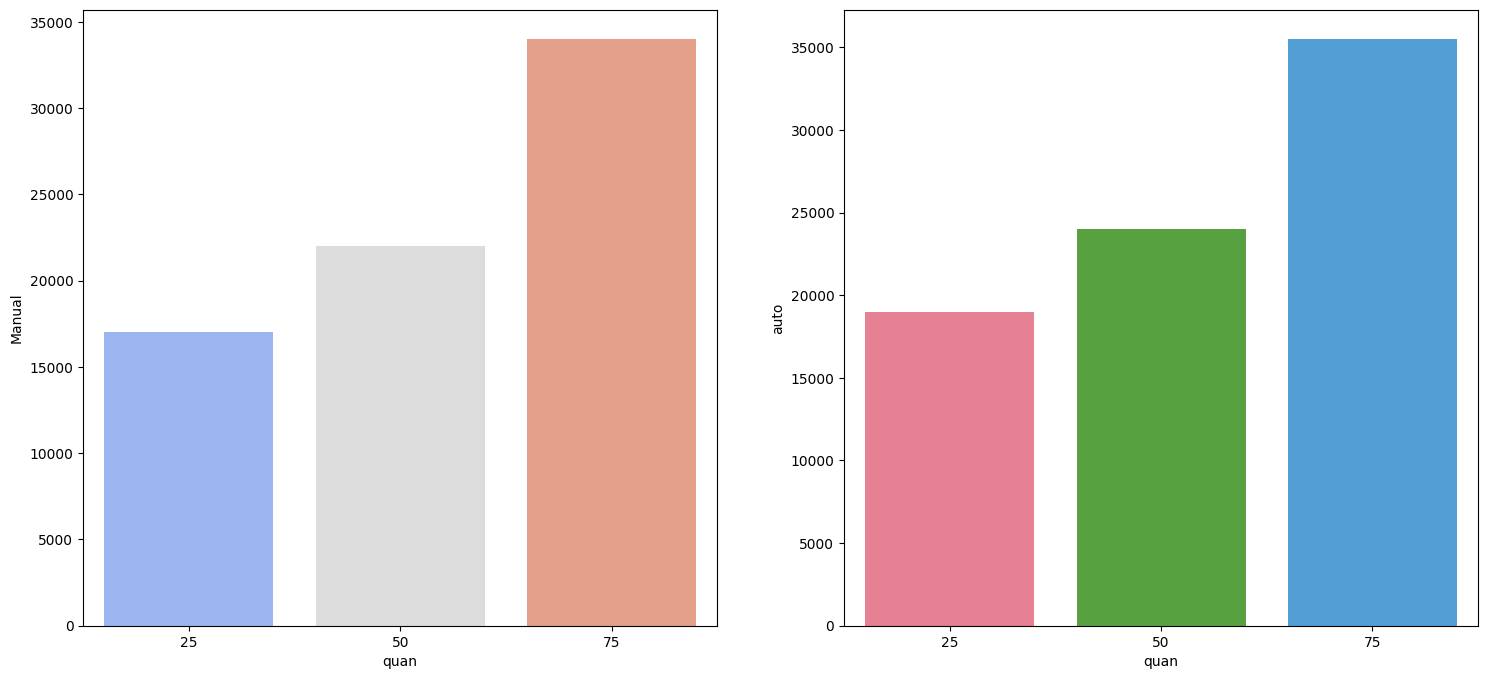

In [501]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(x="quan",y="Manual",data=transmissionplot,palette="coolwarm")

plt.subplot(1,2,2)
sns.barplot(x="quan",y="auto",data=transmissionplot,palette="husl")
plt.show()


### 4.What is the distribution of car prices across different regions?

In [502]:
car_sales.Dealer_Region.unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [503]:
print(car_sales.groupby('Dealer_Region')['Price ($)'].mean())

Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64


In [504]:
u_DR=car_sales.Dealer_Region.unique()

In [505]:
u_DR

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [506]:
car_sales[car_sales['Dealer_Region']=="Aurora"]['Price ($)']

1        19000
12        9000
15       17000
32       19000
36       21000
         ...  
23873    49000
23879    21001
23890    20001
23896    41000
23899    62000
Name: Price ($), Length: 3130, dtype: int64

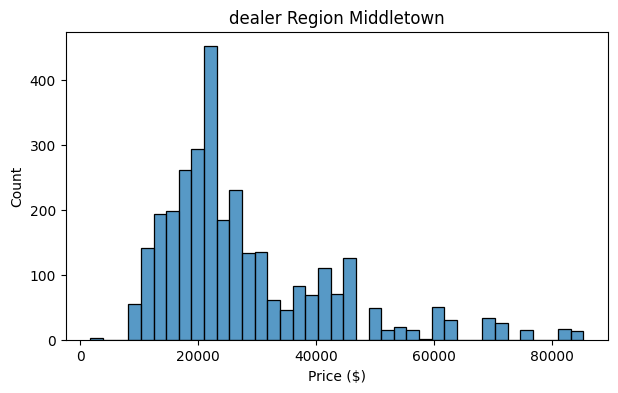

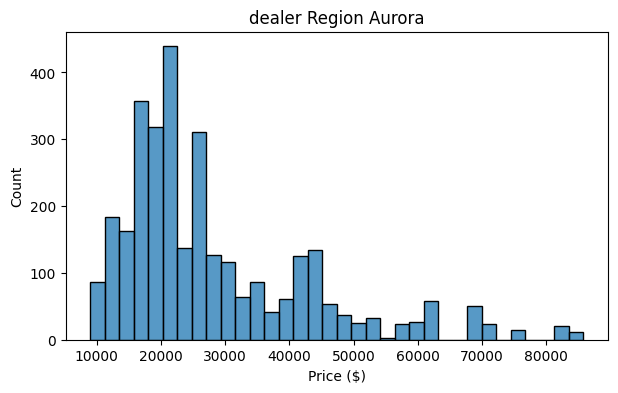

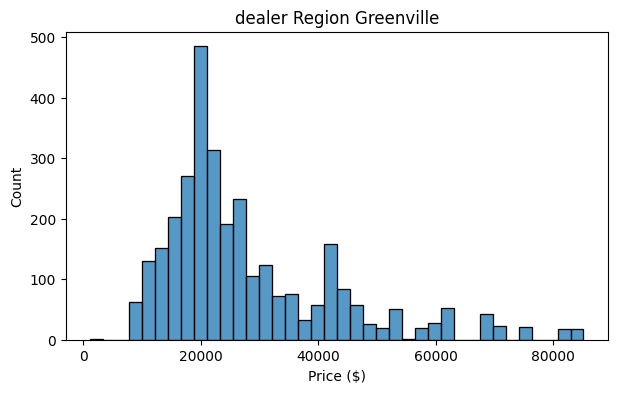

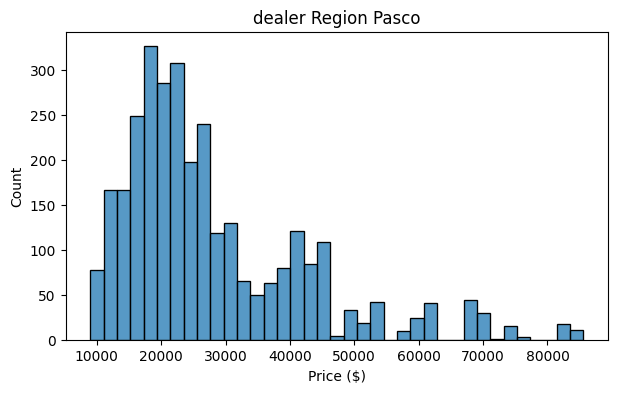

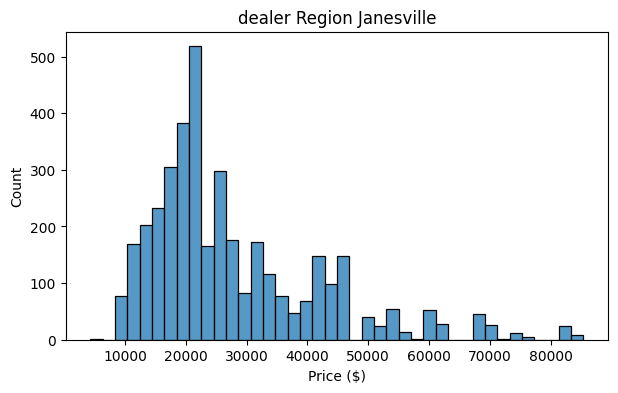

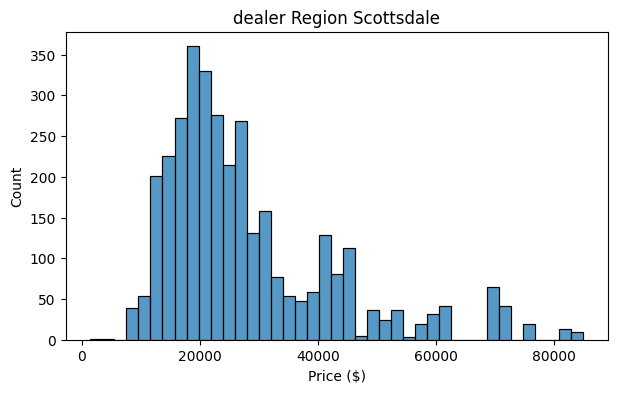

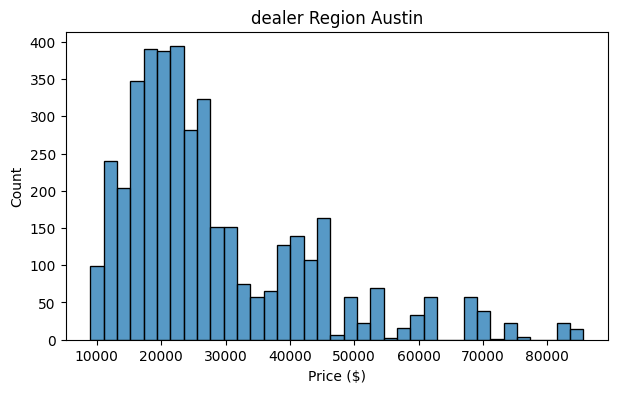

In [507]:
for i in u_DR:
  plt.figure(figsize=(7,4))
  sns.histplot(x=car_sales[car_sales['Dealer_Region']==i]['Price ($)'],data=car_sales,palette="coolwarm")
  plt.title("dealer Region "+ i)
  plt.show()

In [508]:
#the above graphs are distribution of  car prices across different regions

### 5) What is the distribution of cars based on body styles?

In [509]:
car_sales.groupby('Body Style')['Car_id'].count()

Body Style
Hardtop      2971
Hatchback    6128
Passenger    3945
SUV          6374
Sedan        4488
Name: Car_id, dtype: int64

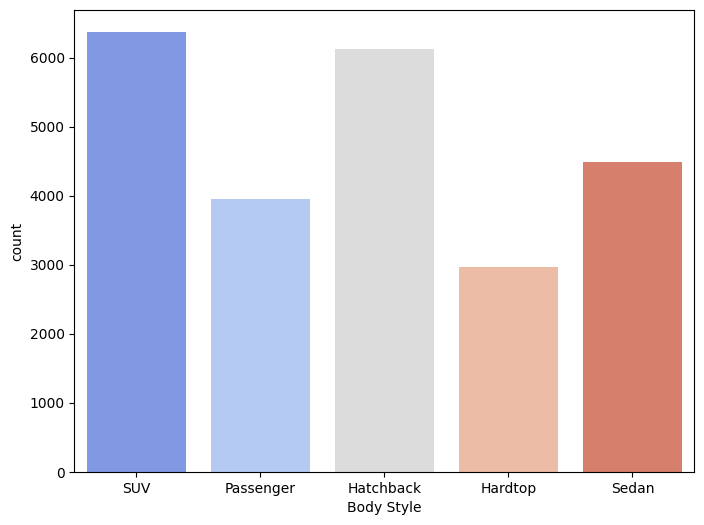

In [510]:
plt.figure(figsize=(8,6))
sns.countplot(x='Body Style',data=car_sales,palette="coolwarm")
plt.show()

In [511]:
# so the distribution of cars based upon body types are given above

In [512]:
u_BS=car_sales['Body Style'].unique()

In [513]:
u_BS

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

### 6) How does the average selling price of cars vary by customer gender and annual income?

In [514]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [515]:
table_Q6=car_sales.groupby(['Gender']).agg({'Price ($)':'mean'})

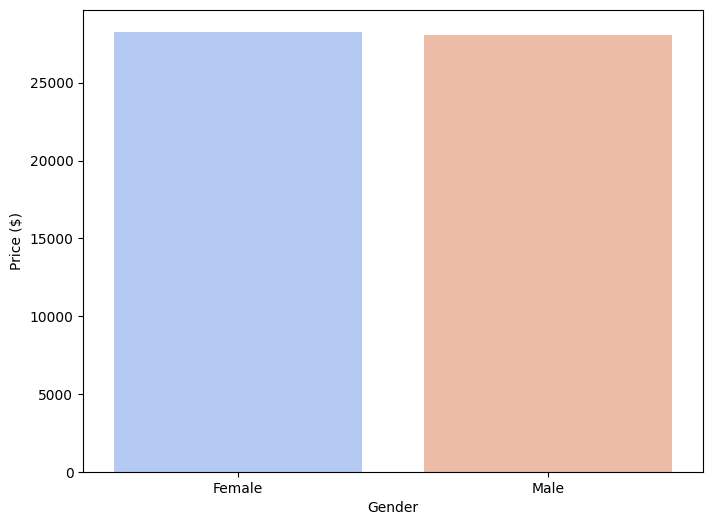

In [516]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender',data=table_Q6,y='Price ($)', palette="coolwarm")
plt.show()

In [517]:
table_Q6_p2=car_sales.groupby(['Annual Income']).agg({'Price ($)':'mean'}).sort_values('Annual Income')

In [518]:
table_Q6_p2

Price ($)
Annual Income              
10080          22801.000000
13500          27878.981415
24000          61001.000000
85000          43000.000000
106000         46001.000000
...                     ...
6600000        39000.000000
6800000        15000.000000
7650000        21000.000000
8000000        85000.000000
11200000       26001.000000

[2508 rows x 1 columns]

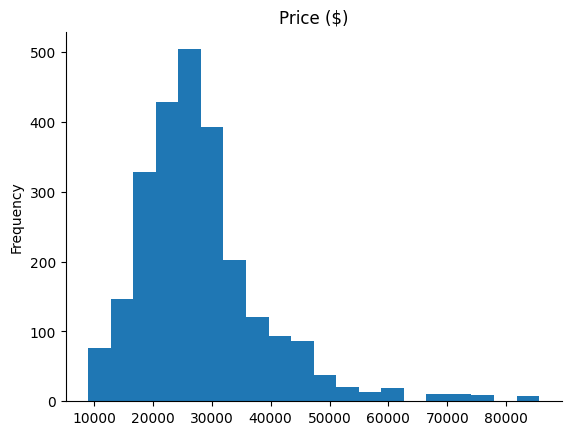

In [519]:
from matplotlib import pyplot as plt
table_Q6_p2['Price ($)'].plot(kind='hist', bins=20, title='Price ($)')
plt.gca().spines[['top', 'right',]].set_visible(False)

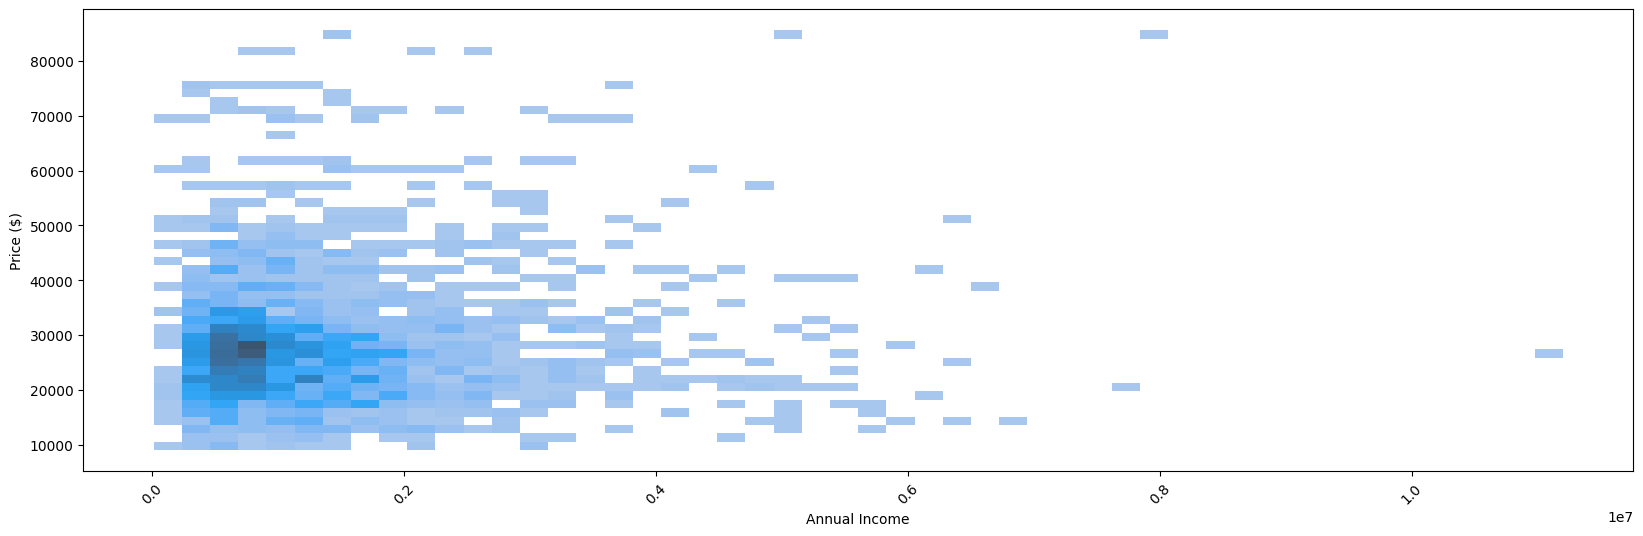

In [520]:
plt.figure(figsize=(20,6))
sns.histplot(x='Annual Income',data=table_Q6_p2,y='Price ($)', palette="coolwarm", bins=50,kde=True)
plt.xticks(rotation=45)
plt.show()

### 7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [521]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [522]:
car_sales.Dealer_Region.unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [523]:
print(car_sales.groupby('Dealer_Region')['Price ($)'].mean())

Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64


In [524]:
u_DR=car_sales.Dealer_Region.unique()

In [525]:
car_sales[car_sales['Dealer_Region']=="Aurora"]['Price ($)']

1        19000
12        9000
15       17000
32       19000
36       21000
         ...  
23873    49000
23879    21001
23890    20001
23896    41000
23899    62000
Name: Price ($), Length: 3130, dtype: int64

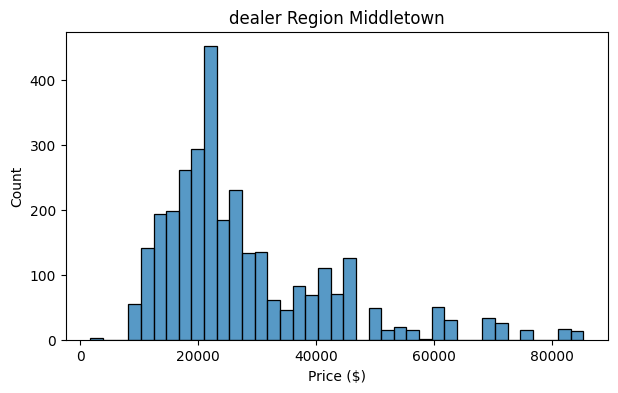

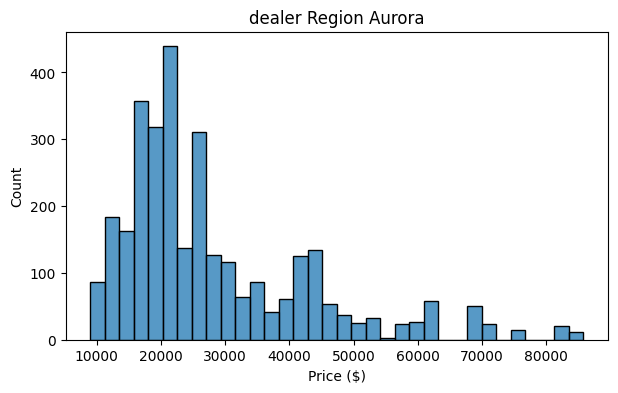

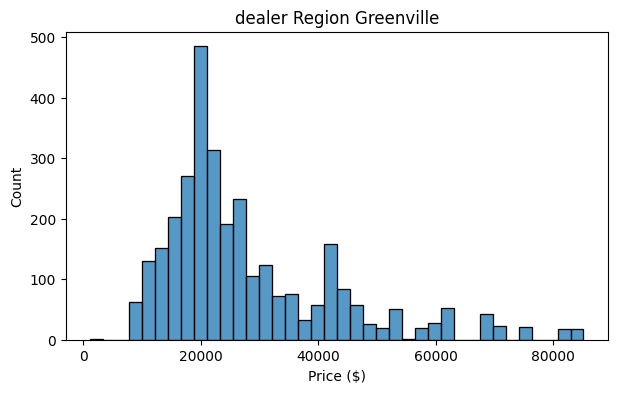

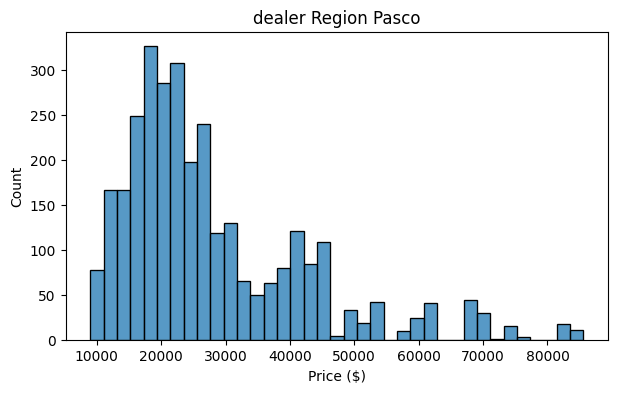

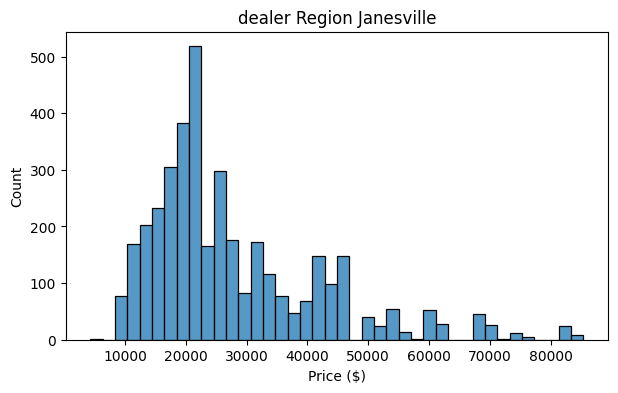

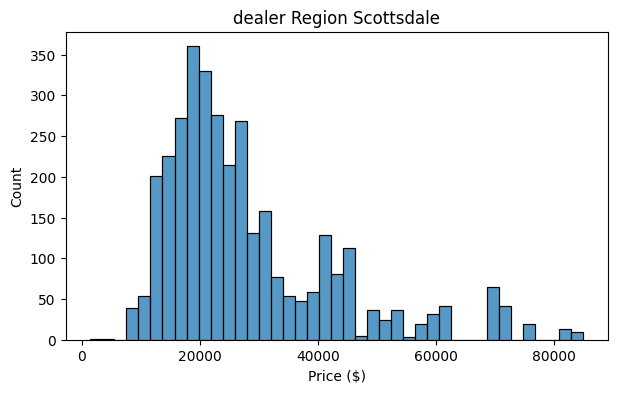

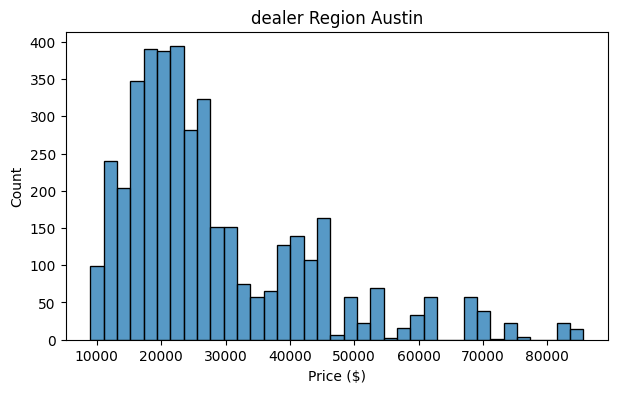

In [526]:
for i in u_DR:
  plt.figure(figsize=(7,4))
  sns.histplot(x=car_sales[car_sales['Dealer_Region']==i]['Price ($)'],data=car_sales,palette="coolwarm")
  plt.title("dealer Region "+ i)
  plt.show()

In [527]:
car_sales.groupby(['Dealer_Region'])['Car_id'].count()

Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Car_id, dtype: int64

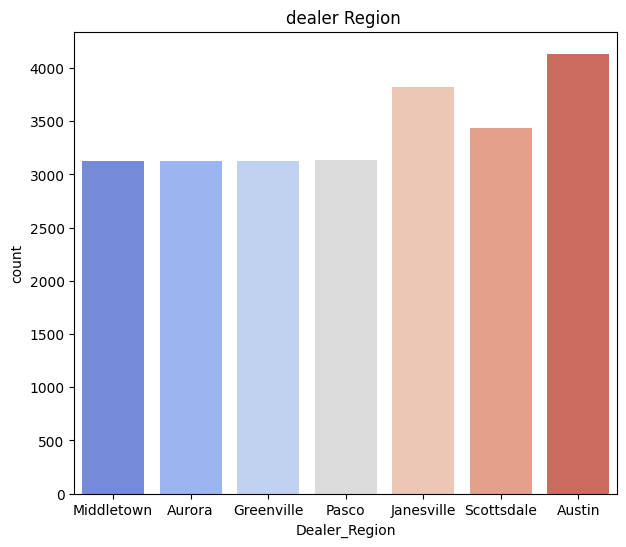

In [528]:
plt.figure(figsize=(7,6))
sns.countplot(x="Dealer_Region",data=car_sales,palette="coolwarm")
plt.title("dealer Region ")
plt.show()

### 8)How does the average car price differ between cars with different engine sizes?

In [529]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [530]:
car_sales.Engine.unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [531]:
car_sales['Engine']=car_sales['Engine'].map({'DoubleÂ\xa0Overhead Camshaft':'double overhead camshaft','Overhead Camshaft':'Overhead Camshaft'})

In [532]:
car_sales['Engine'].unique()

array(['double overhead camshaft', 'Overhead Camshaft'], dtype=object)

In [533]:
Q8=car_sales.groupby(['Engine']).agg({'Car_id':'count'})

In [534]:
Q8

Car_id
Engine                          
Overhead Camshaft          11335
double overhead camshaft   12571

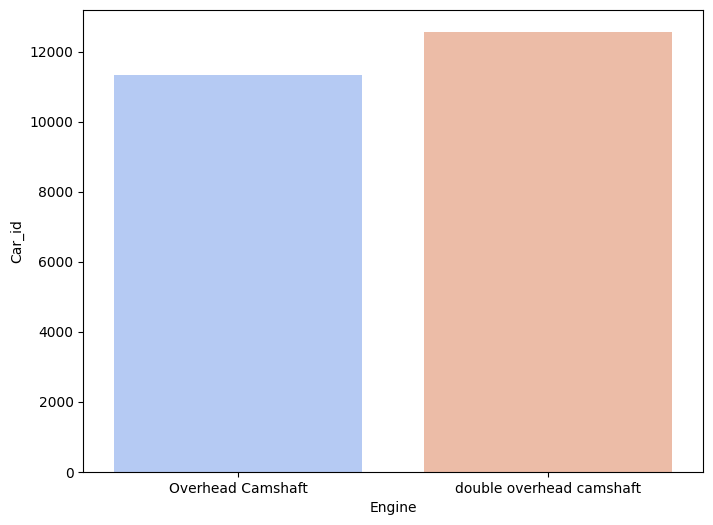

In [535]:
plt.figure(figsize=(8,6))
sns.barplot(x="Engine",y="Car_id",data=Q8,palette="coolwarm")
plt.show()

## 9)How do car prices vary based on the customer’s annual income bracket?

In [536]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [537]:
car_sales.groupby(['Annual Income']).agg({'Price ($)':'mean'})

Price ($)
Annual Income              
10080          22801.000000
13500          27878.981415
24000          61001.000000
85000          43000.000000
106000         46001.000000
...                     ...
6600000        39000.000000
6800000        15000.000000
7650000        21000.000000
8000000        85000.000000
11200000       26001.000000

[2508 rows x 1 columns]

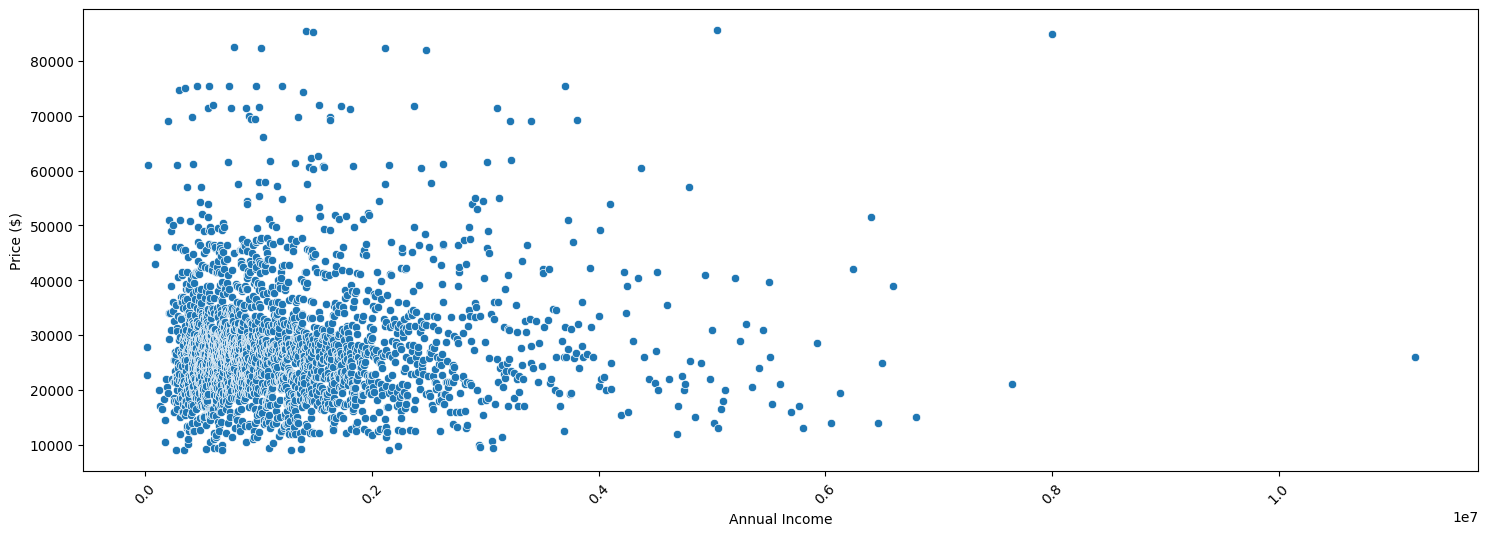

In [538]:
plt.figure(figsize=(18,6))
sns.scatterplot(x="Annual Income",y="Price ($)",data=car_sales.groupby(['Annual Income']).agg({'Price ($)':'mean'}))
plt.xticks(rotation=45)
plt.show()

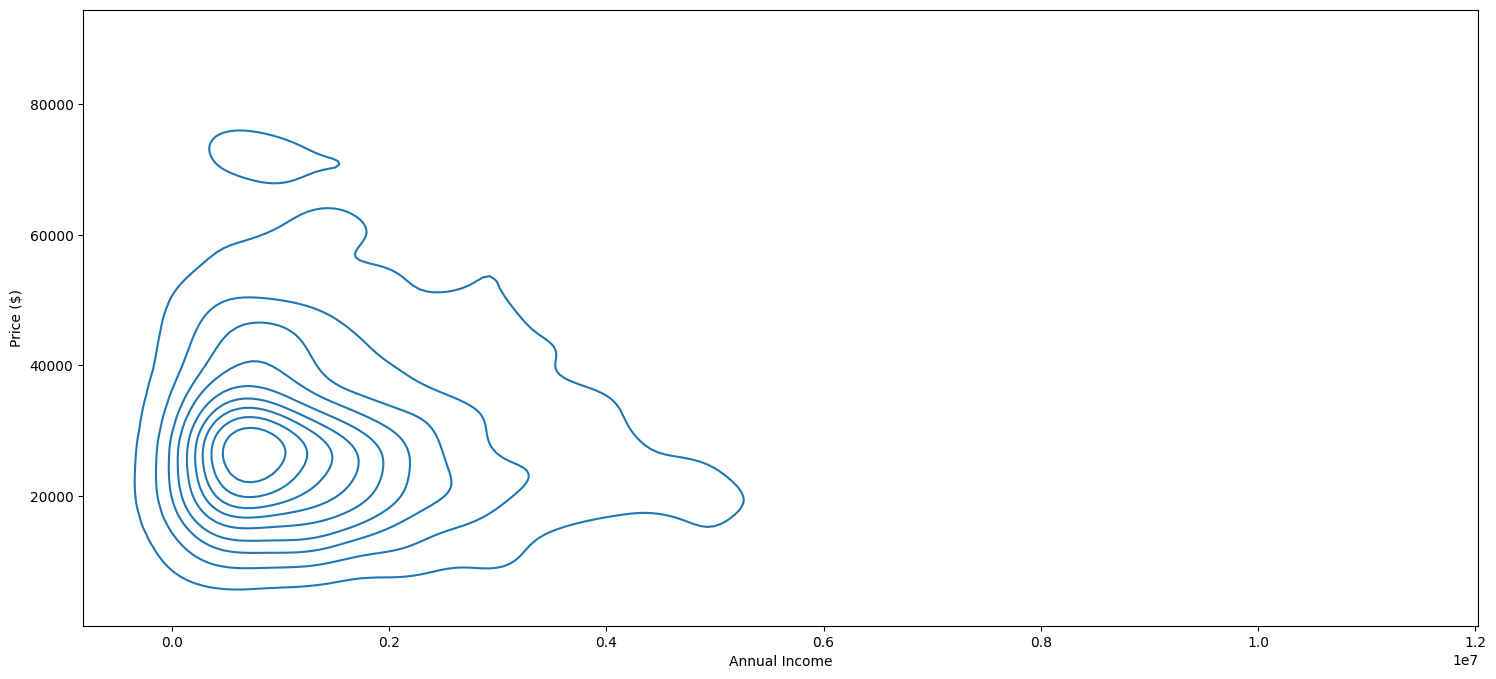

In [697]:
plt.figure(figsize=(18,8))
sns.kdeplot(x="Annual Income",y="Price ($)",data=car_sales.groupby(['Annual Income']).agg({'Price ($)':'mean'}),orient='h')
#plt.xticks(rotation=45)
plt.show()

## 10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [539]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [540]:
car_sales.groupby(['Model']).agg({'Car_id':'count'}).sort_values('Car_id',ascending=False)[:5]

Car_id
Model             
Diamante       418
Prizm          411
Silhouette     411
Passat         391
Ram Pickup     383

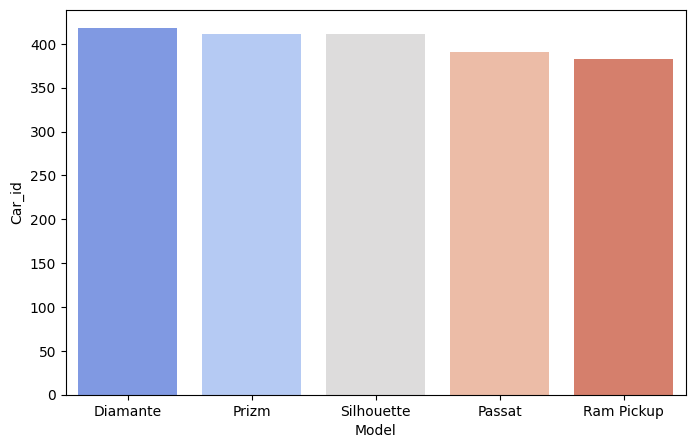

In [541]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="Car_id",data=car_sales.groupby(['Model']).agg({'Car_id':'count'}).sort_values('Car_id',ascending=False)[:5],palette="coolwarm")
plt.show()

In [542]:
tempdata=pd.DataFrame(car_sales.groupby(['Model']).agg({'Car_id':'count'}).sort_values('Car_id',ascending=False)[:5]).T

In [543]:
tempdata

Model   Diamante  Prizm  Silhouette  Passat  Ram Pickup
Car_id       418    411         411     391         383

In [544]:
tempdata.columns

Index(['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'], dtype='object', name='Model')

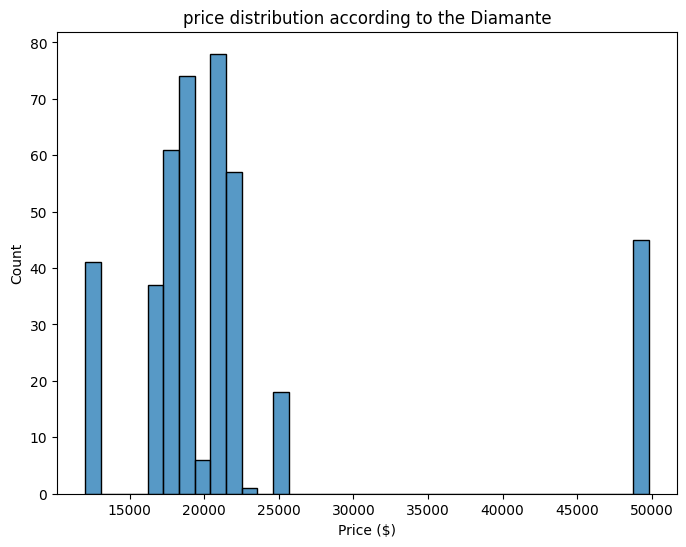

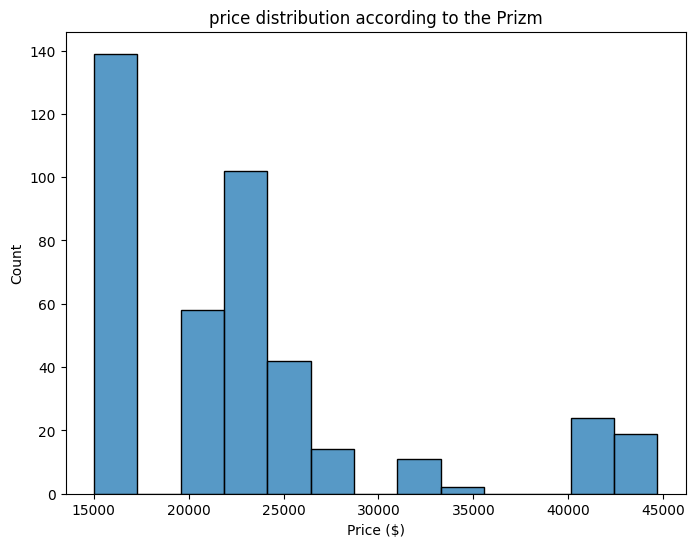

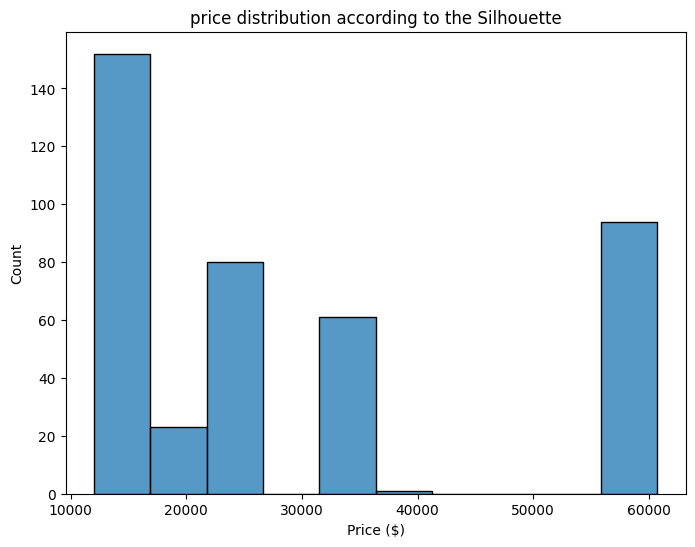

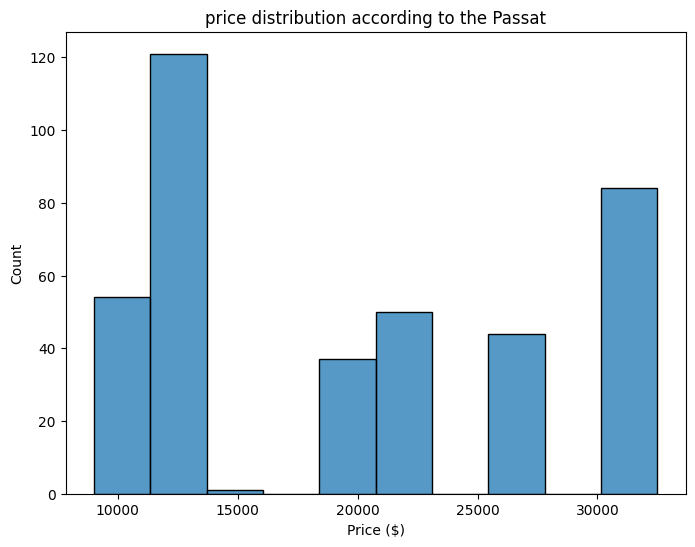

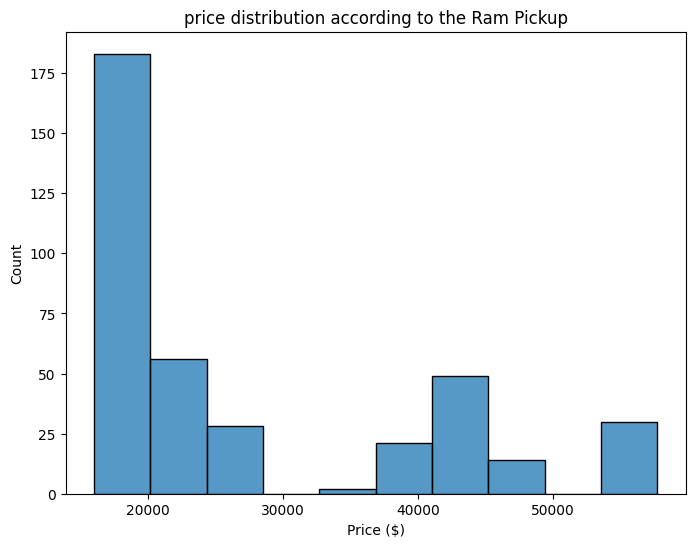

In [545]:
for i in tempdata.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(x='Price ($)',data=car_sales[car_sales['Model']==i])
  plt.title("price distribution according to the "+i)
  plt.show()

In [546]:
# the above is the price distributions of top 5 car models

## 11)How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [547]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [548]:
car_sales.groupby(['Engine','Color']).agg({'Price ($)':'std'})

Price ($)
Engine                   Color                   
Overhead Camshaft        Black       17457.405345
                         Pale White  13000.103061
                         Red         17346.642554
double overhead camshaft Black       12418.674126
                         Pale White  14402.413401
                         Red         13499.354247

In [549]:
car_sales.groupby(['Engine','Color']).agg({'Price ($)':'std'}).iloc[:,0]

Engine                    Color     
Overhead Camshaft         Black         17457.405345
                          Pale White    13000.103061
                          Red           17346.642554
double overhead camshaft  Black         12418.674126
                          Pale White    14402.413401
                          Red           13499.354247
Name: Price ($), dtype: float64

In [550]:
car_sales.groupby(['Engine','Color']).agg({'Price ($)':'std'}).T

Engine    Overhead Camshaft                              \
Color                 Black    Pale White           Red   
Price ($)      17457.405345  13000.103061  17346.642554   

Engine    double overhead camshaft                              
Color                        Black    Pale White           Red  
Price ($)             12418.674126  14402.413401  13499.354247

In [551]:
[car_sales.groupby(['Engine','Color']).agg({'Price ($)':'std'}).T.columns]

[MultiIndex([(       'Overhead Camshaft',      'Black'),
             (       'Overhead Camshaft', 'Pale White'),
             (       'Overhead Camshaft',        'Red'),
             ('double overhead camshaft',      'Black'),
             ('double overhead camshaft', 'Pale White'),
             ('double overhead camshaft',        'Red')],
            names=['Engine', 'Color'])]

In [552]:
tempQ=car_sales[car_sales["Engine"]== 'Overhead Camshaft']
tempq=tempQ[tempQ["Color"]=='Black']
tempq["Price ($)"]

16       18000
20       25000
33       43000
42       42500
44       36001
         ...  
23877    21900
23881    69001
23885    18000
23892    18000
23893    21000
Name: Price ($), Length: 3685, dtype: int64

Overhead Camshaft and  Black


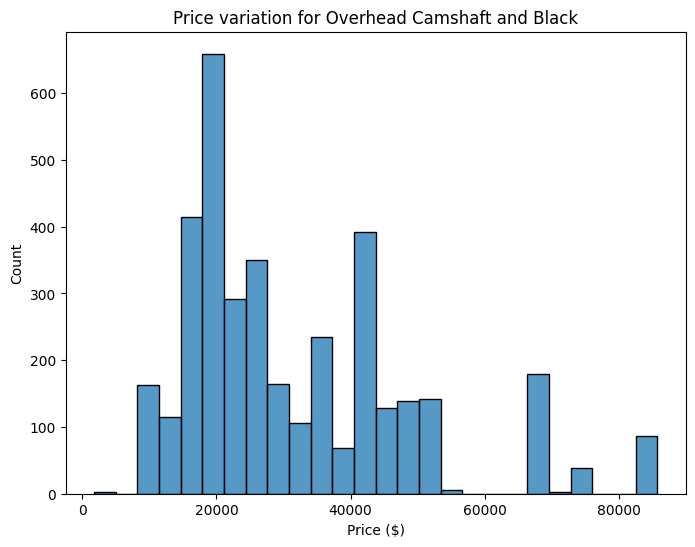

Overhead Camshaft and  Pale White


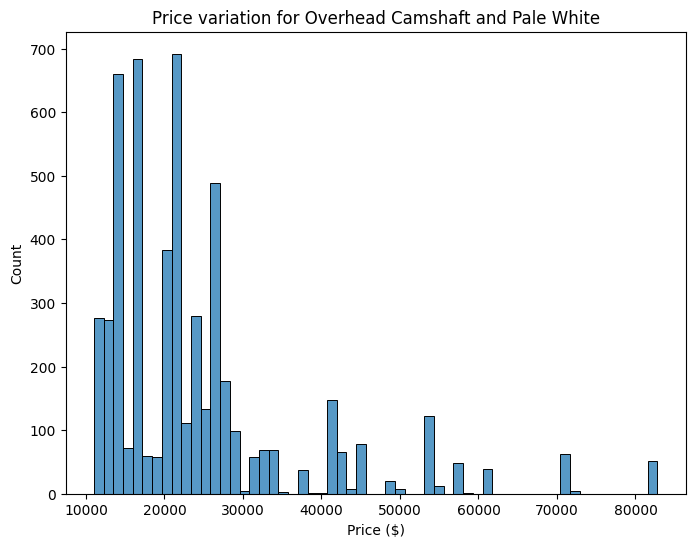

Overhead Camshaft and  Red


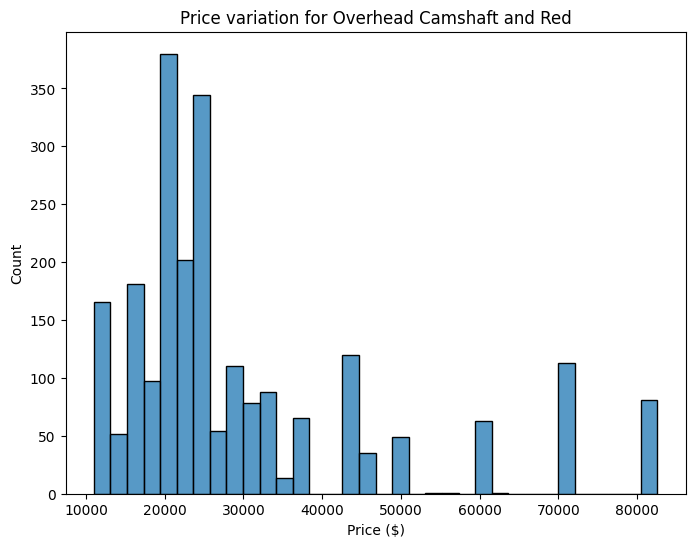

double overhead camshaft and  Black


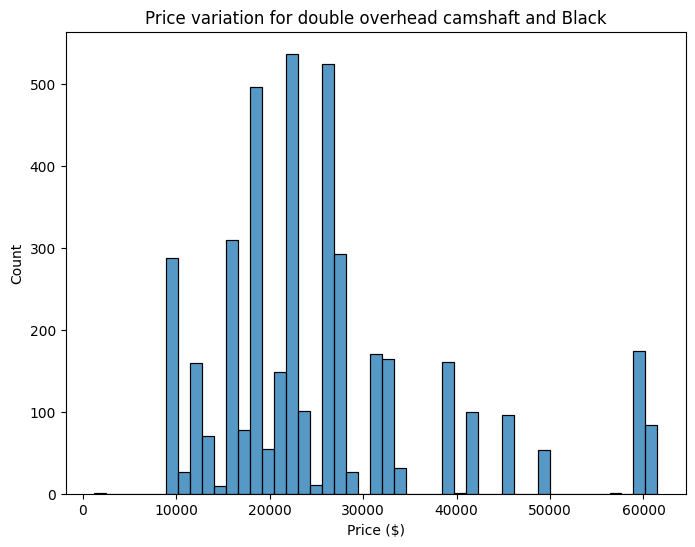

double overhead camshaft and  Pale White


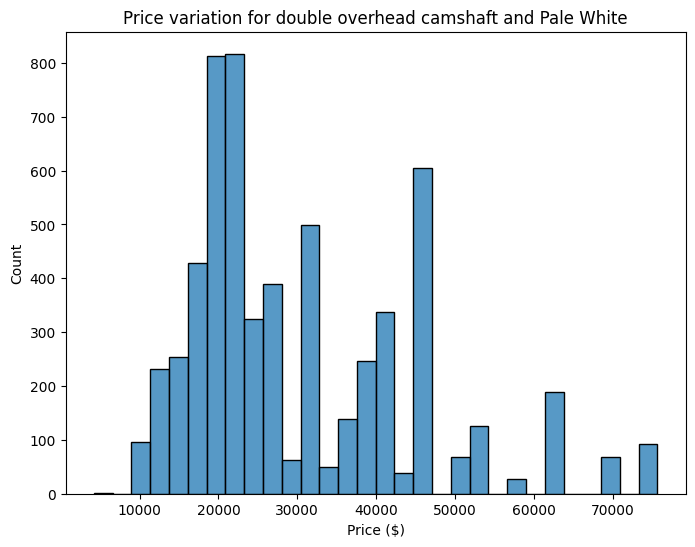

double overhead camshaft and  Red


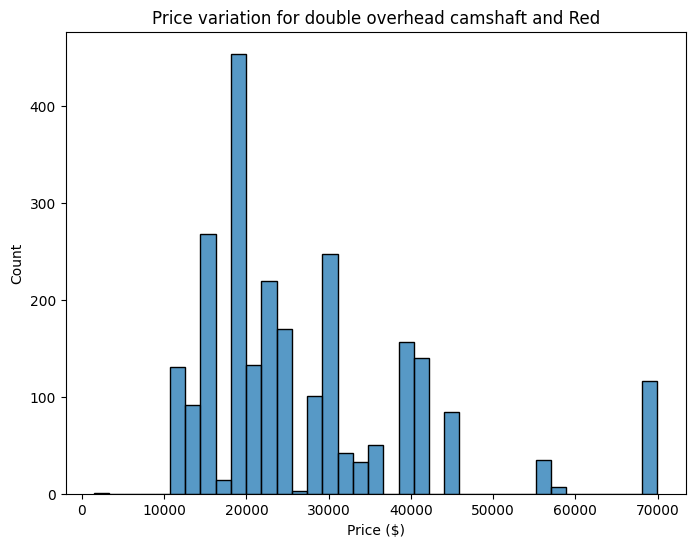

In [553]:
for i in car_sales.groupby(['Engine','Color']).agg({'Price ($)':'std'}).T.columns:
  print(i[0],"and ",i[1])
  tempQ=car_sales[car_sales["Engine"]== i[0]]
  tempq=tempQ[tempQ["Color"]==i[1]]
  #tempq["Price ($)"]
  plt.figure(figsize=(8,6))
  sns.histplot(x="Price ($)",data=tempq)
  plt.title('Price variation for '+i[0]+" and "+i[1])
  plt.show()

In [554]:
# The above grphs are car price vary with engine size across different car colors
# we can conclude that the color with highest price varistion is Black

## 12)Is there any seasonal trend in car sales based on the date of sale?

In [555]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [556]:
car_sales["Date"].unique()

array(['1/2/2022', '1/3/2022', '1/4/2022', '1/5/2022', '1/6/2022',
       '1/9/2022', '1/10/2022', '1/12/2022', '1/13/2022', '1/17/2022',
       '1/19/2022', '1/21/2022', '1/23/2022', '1/24/2022', '1/26/2022',
       '1/27/2022', '1/28/2022', '1/30/2022', '1/31/2022', '2/3/2022',
       '2/6/2022', '2/7/2022', '2/8/2022', '2/9/2022', '2/10/2022',
       '2/14/2022', '2/15/2022', '2/16/2022', '2/18/2022', '2/20/2022',
       '2/21/2022', '2/22/2022', '2/23/2022', '2/25/2022', '2/27/2022',
       '2/28/2022', '3/1/2022', '3/2/2022', '3/5/2022', '3/6/2022',
       '3/7/2022', '3/8/2022', '3/9/2022', '3/10/2022', '3/12/2022',
       '3/13/2022', '3/14/2022', '3/15/2022', '3/16/2022', '3/17/2022',
       '3/19/2022', '3/20/2022', '3/21/2022', '3/22/2022', '3/23/2022',
       '3/24/2022', '3/26/2022', '3/27/2022', '3/28/2022', '3/29/2022',
       '3/30/2022', '3/31/2022', '4/2/2022', '4/4/2022', '4/5/2022',
       '4/6/2022', '4/7/2022', '4/9/2022', '4/10/2022', '4/11/2022',
       '4/12/202

In [557]:
car_sales["Date"]=pd.to_datetime(car_sales["Date"],format="%m/%d/%Y")
car_sales["Date"].unique()

<DatetimeArray>
['2022-01-02 00:00:00', '2022-01-03 00:00:00', '2022-01-04 00:00:00',
 '2022-01-05 00:00:00', '2022-01-06 00:00:00', '2022-01-09 00:00:00',
 '2022-01-10 00:00:00', '2022-01-12 00:00:00', '2022-01-13 00:00:00',
 '2022-01-17 00:00:00',
 ...
 '2023-12-20 00:00:00', '2023-12-22 00:00:00', '2023-12-23 00:00:00',
 '2023-12-24 00:00:00', '2023-12-25 00:00:00', '2023-12-26 00:00:00',
 '2023-12-27 00:00:00', '2023-12-29 00:00:00', '2023-12-30 00:00:00',
 '2023-12-31 00:00:00']
Length: 612, dtype: datetime64[ns]

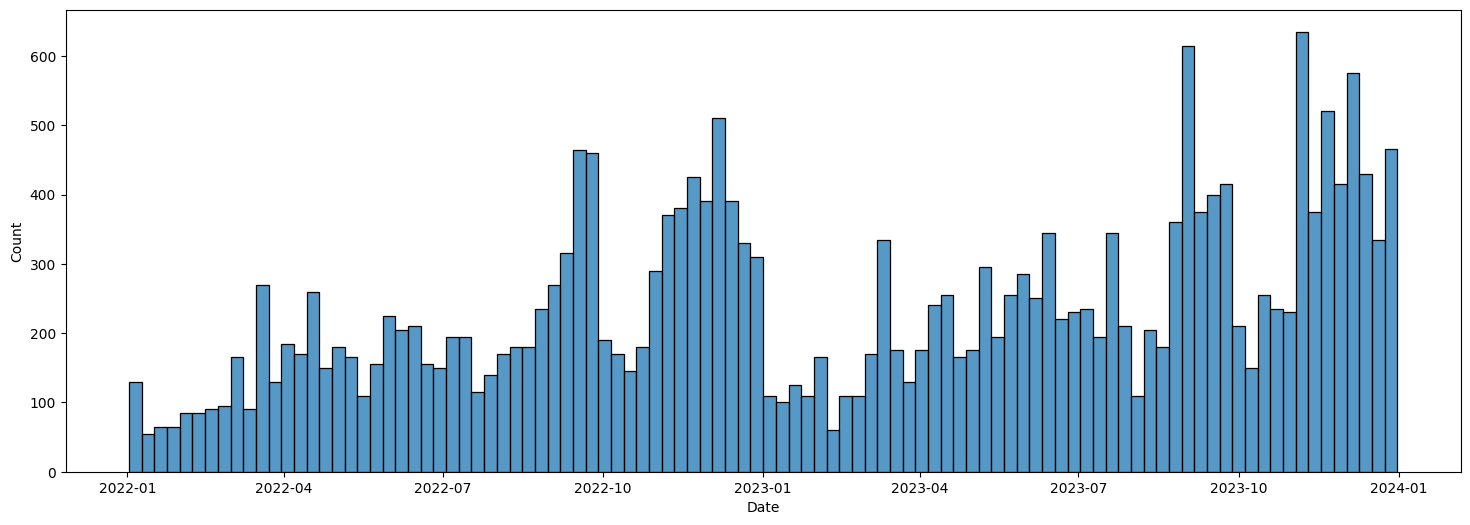

In [558]:
plt.figure(figsize=(18,6))
sns.histplot(x="Date",data=car_sales,palette="coolwarm",bins=100)
plt.show()

we can see from the following graph that the seasonal trends are in a following way in between November december and at the just before the end of every new year there is a very high rise in sale of cars than the rest of the months in every year this is a seasonal trends that can be observed from the following graph

## 13) How does the car price distribution change when considering different combinations of body style and transmission type?

In [559]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [560]:
car_sales["Body Style"].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [561]:
car_sales["Transmission"].unique()

array(['Auto', 'Manual'], dtype=object)

In [562]:
car_sales.groupby(['Transmission','Body Style']).agg({"Price ($)":"mean"}).T

Transmission         Auto                                            \
Body Style        Hardtop     Hatchback     Passenger           SUV   
Price ($)     31520.18821  25910.544824  28915.835149  27501.404407   

Transmission                      Manual                              \
Body Style           Sedan       Hardtop     Hatchback     Passenger   
Price ($)     29955.294344  27016.943698  28702.550562  28969.521039   

Transmission                              
Body Style             SUV         Sedan  
Price ($)     26079.019161  29664.271572

In [563]:
car_sales.groupby(['Transmission','Body Style']).agg({"Price ($)":"mean"}).T.columns

MultiIndex([(  'Auto',   'Hardtop'),
            (  'Auto', 'Hatchback'),
            (  'Auto', 'Passenger'),
            (  'Auto',       'SUV'),
            (  'Auto',     'Sedan'),
            ('Manual',   'Hardtop'),
            ('Manual', 'Hatchback'),
            ('Manual', 'Passenger'),
            ('Manual',       'SUV'),
            ('Manual',     'Sedan')],
           names=['Transmission', 'Body Style'])

In [564]:
tempQ=car_sales[car_sales["Transmission"]=="Auto"]
tempq=tempQ[car_sales["Body Style"]=="Hardtop"]

Auto and Hardtop


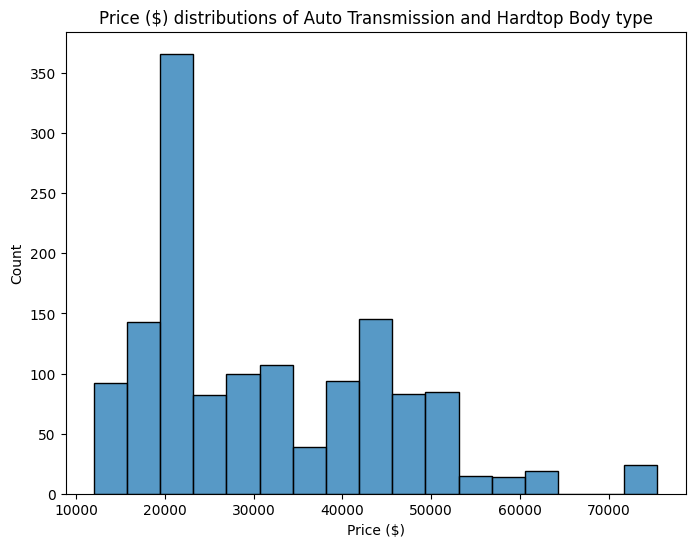

Auto and Hatchback


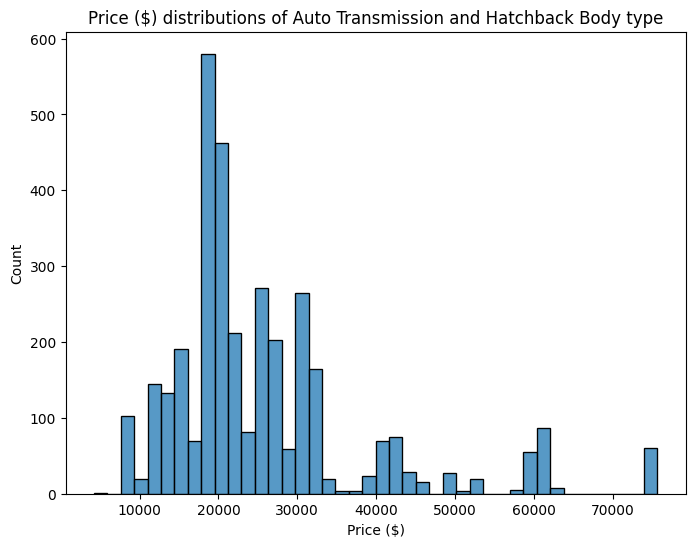

Auto and Passenger


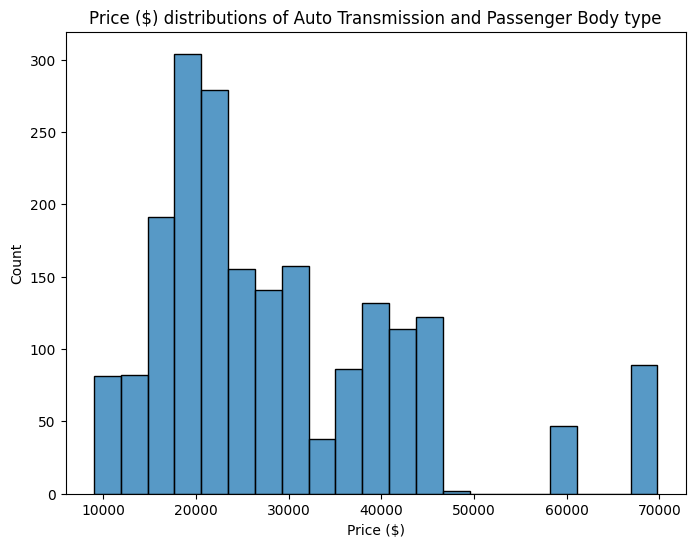

Auto and SUV


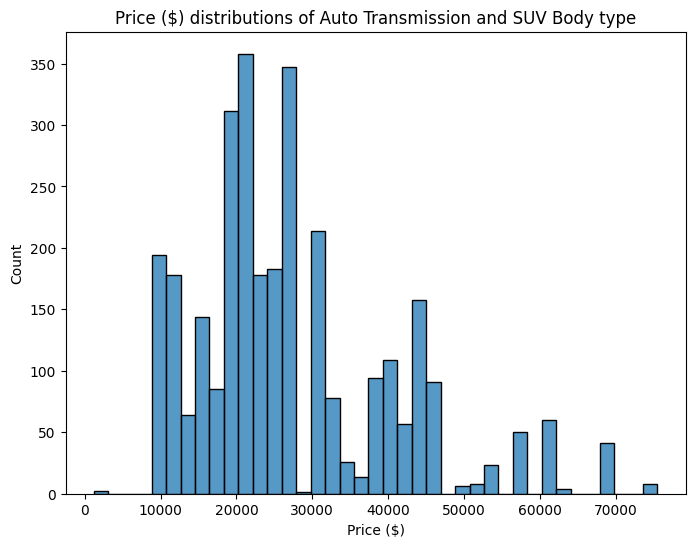

Auto and Sedan


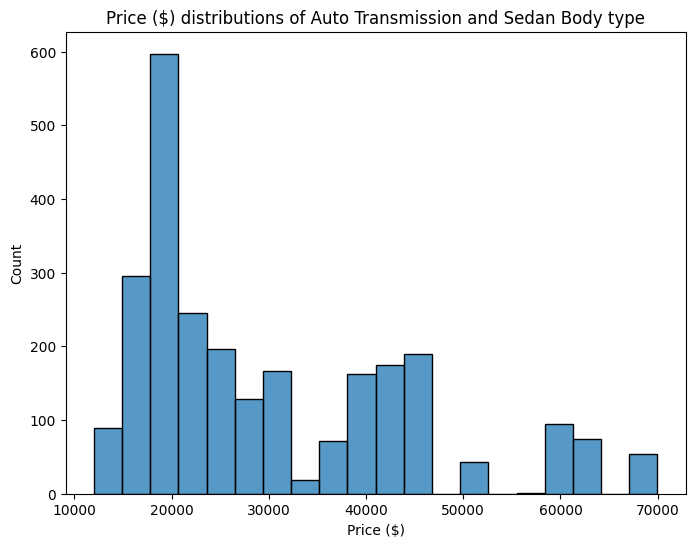

Manual and Hardtop


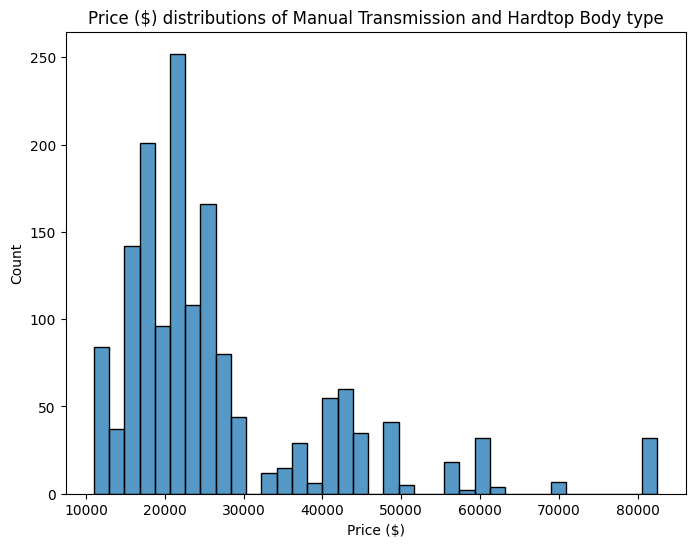

Manual and Hatchback


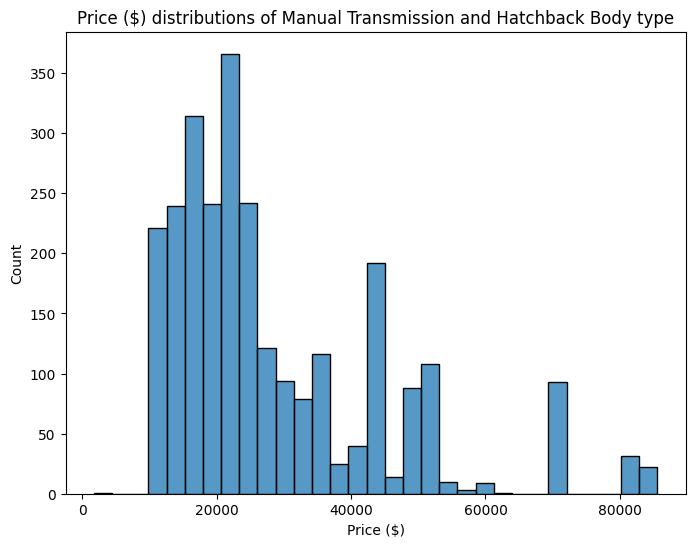

Manual and Passenger


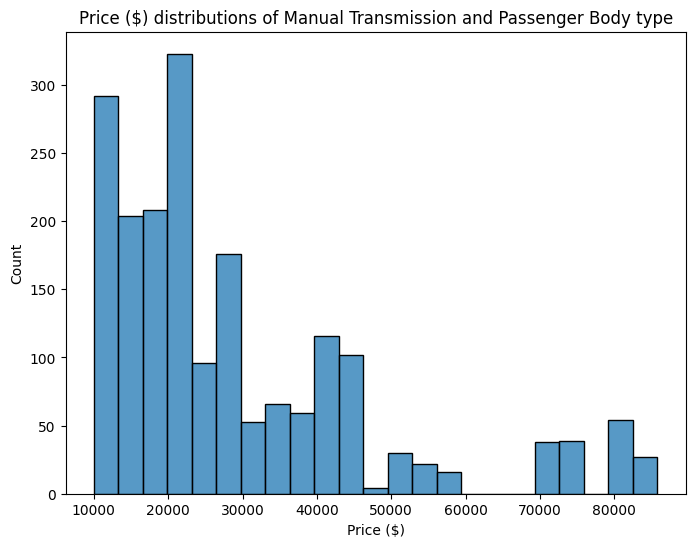

Manual and SUV


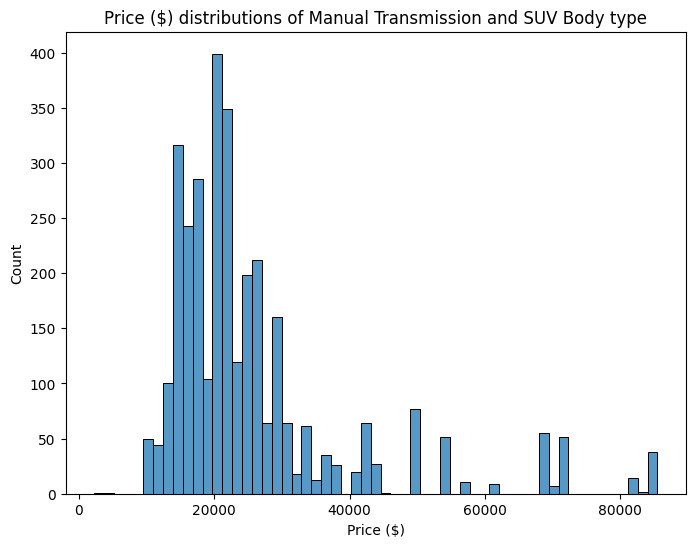

Manual and Sedan


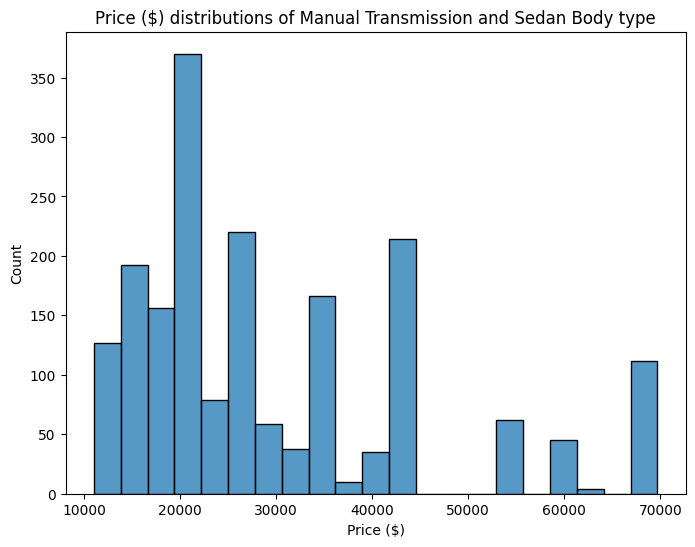

In [565]:
for i in car_sales.groupby(['Transmission','Body Style']).agg({"Price ($)":"mean"}).T:
  print(i[0],"and",i[1])
  tempQ=car_sales[car_sales["Transmission"]==i[0]]
  tempq=tempQ[car_sales["Body Style"]==i[1]]
  #tempq
  plt.figure(figsize=(8,6))
  sns.histplot(x="Price ($)",data=tempq,palette="coolwarm")
  plt.title("Price ($) distributions of "+i[0]+" Transmission and "+i[1]+" Body type")
  plt.show()

As we can see in the following graphs of different combinations and transmissions price distribution in cars we can see the following change in prices accordingly

## 14)What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [566]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [567]:
temp_data=car_sales[["Annual Income","Price ($)"]]
temp_data.corr()

Annual Income  Price ($)
Annual Income       1.000000   0.012065
Price ($)           0.012065   1.000000

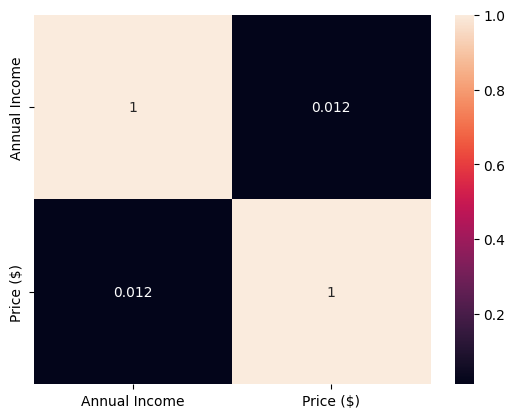

In [568]:
sns.heatmap(temp_data.corr(),annot=True)
plt.show()

In [569]:
[car_sales["Engine"]]

[0        double overhead camshaft
 1        double overhead camshaft
 2               Overhead Camshaft
 3               Overhead Camshaft
 4        double overhead camshaft
                    ...           
 23901           Overhead Camshaft
 23902    double overhead camshaft
 23903           Overhead Camshaft
 23904    double overhead camshaft
 23905    double overhead camshaft
 Name: Engine, Length: 23906, dtype: object]

In [570]:
 from scipy import stats

In [571]:
stats.pointbiserialr(car_sales["Price ($)"],car_sales["Engine"].map({"double overhead camshaft":0,"Overhead Camshaft":1}))

SignificanceResult(statistic=np.float64(-0.01127131276476485), pvalue=np.float64(0.08138854785388369))

In [572]:
stats.pointbiserialr(car_sales["Annual Income"],car_sales["Engine"].map({"double overhead camshaft":0,"Overhead Camshaft":1}))

SignificanceResult(statistic=np.float64(-0.0065979670220939445), pvalue=np.float64(0.30767784262417636))

We can see from the following statistics that there is no correlation between all three of the variables in the data set

## 15) How does the average car price vary across different car models and engine types?

In [573]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

In [574]:
car_sales.groupby(["Model"]).agg({"Price ($)":"mean"})

Price ($)
Model                 
3-Sep     37986.380117
3000GT    22282.250825
300M      21394.888889
323i      17355.634615
328i      27821.359223
...                ...
Viper     30905.258333
Voyager   31491.110497
Windstar  23682.842975
Wrangler  20134.548780
Xterra    18901.076087

[154 rows x 1 columns]

In [575]:
car_sales.groupby(["Model"]).agg({"Price ($)":"mean"}).sort_values("Price ($)",ascending=False)

Price ($)
Model                
Catera   56836.933333
DeVille  46154.050000
Contour  45309.079646
Integra  44604.000000
Tacoma   44576.743017
...               ...
Montero  16035.000000
C-Class  14538.414474
Escort   12901.092105
Cirrus   12727.243243
Mirage    9063.368421

[154 rows x 1 columns]

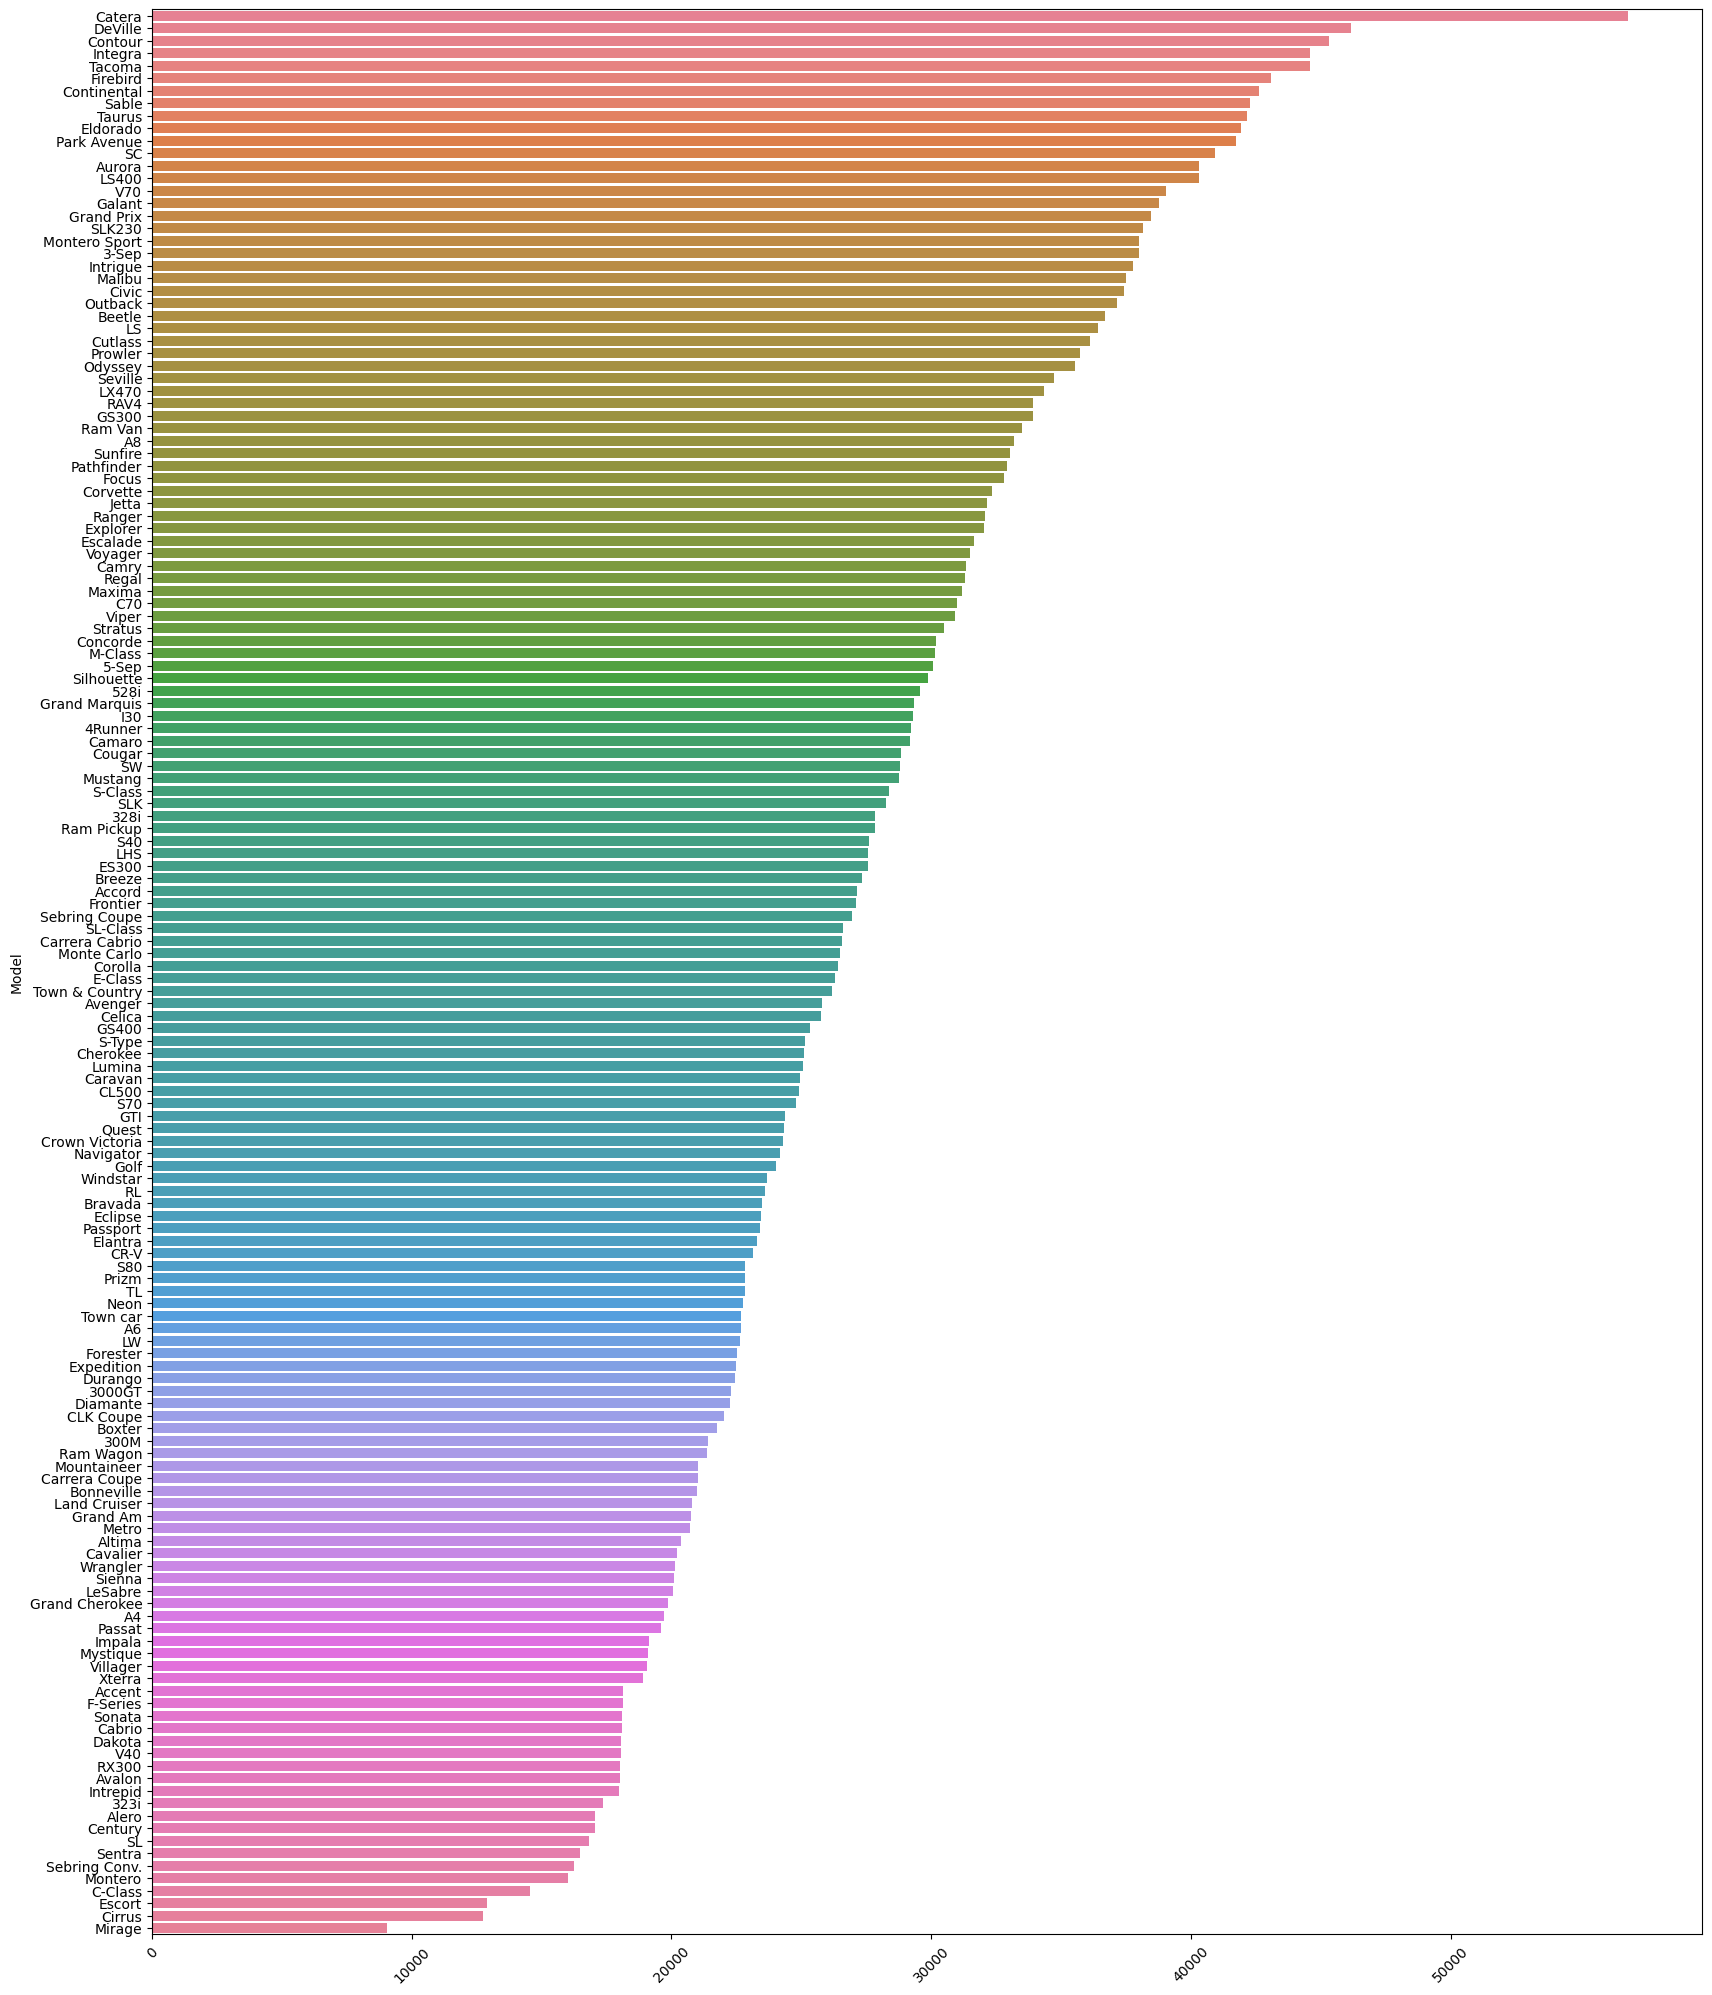

In [576]:
plt.figure(figsize=(20,25))
sns.barplot(data=car_sales.groupby(["Model"]).agg({"Price ($)":"mean"}).sort_values("Price ($)",ascending=False).T, orient = 'h')
plt.xticks(rotation=45)
plt.show()

In [577]:
car_sales.groupby(["Engine"]).agg({"Price ($)":"mean"})

Price ($)
Engine                                
Overhead Camshaft         27914.710631
double overhead camshaft  28248.525972

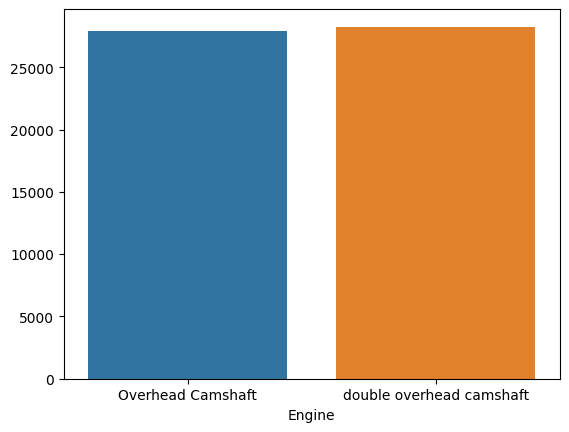

In [578]:
sns.barplot(data=car_sales.groupby(["Engine"]).agg({"Price ($)":"mean"}).T)
plt.show()

# EDA 3

Amazon Sales Data

In [579]:
od.download("https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view")

4744481it [00:00, 587638661.59it/s]

Downloaded to  ./amazon.csv


In [580]:
amazon=pd.read_csv("/content/amazon.csv")

In [581]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## 1)What is the average rating for each product category?

In [582]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [583]:
amazon["rating"].replace(to_replace={'|':0})

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460      4
1461    4.1
1462    3.6
1463      4
1464    4.3
Name: rating, Length: 1465, dtype: object

In [584]:
o=amazon["rating"].replace(to_replace={'|':0}).astype(dtype="float64",errors="ignore")

In [585]:
amazon["rating"]=o

In [586]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [587]:
q_df_amazon=amazon[["category","rating"]].iloc[:,:]

In [588]:
q_df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  1465 non-null   object 
 1   rating    1465 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [589]:
q_df_amazon['category'].iloc[0].split("|")

['Computers&Accessories',
 'Accessories&Peripherals',
 'Cables&Accessories',
 'Cables',
 'USBCables']

In [590]:
l=pd.DataFrame(columns=['cat',"rate"])
l["rate"]=l["rate"].astype(dtype="float64")
l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cat     0 non-null      object 
 1   rate    0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 132.0+ bytes


In [591]:
i=0
while i<1465:
  for j in (q_df_amazon['category'].iloc[i].split("|")):
    l.loc[len(l)]=[j,q_df_amazon['rating'].loc[i]]
  i=i+1

In [592]:
l.groupby(['cat']).agg({"rate":"mean"}).sort_values("rate",ascending=False)

rate
cat                   
Tablets           4.60
CoffeePresses     4.50
StreamingClients  4.50
SurgeProtectors   4.50
CordManagement    4.50
...                ...
3DGlasses         3.50
HandheldVacuums   3.45
DustCovers        3.40
ElectricGrinders  3.30
CoffeeGrinders    3.30

[317 rows x 1 columns]

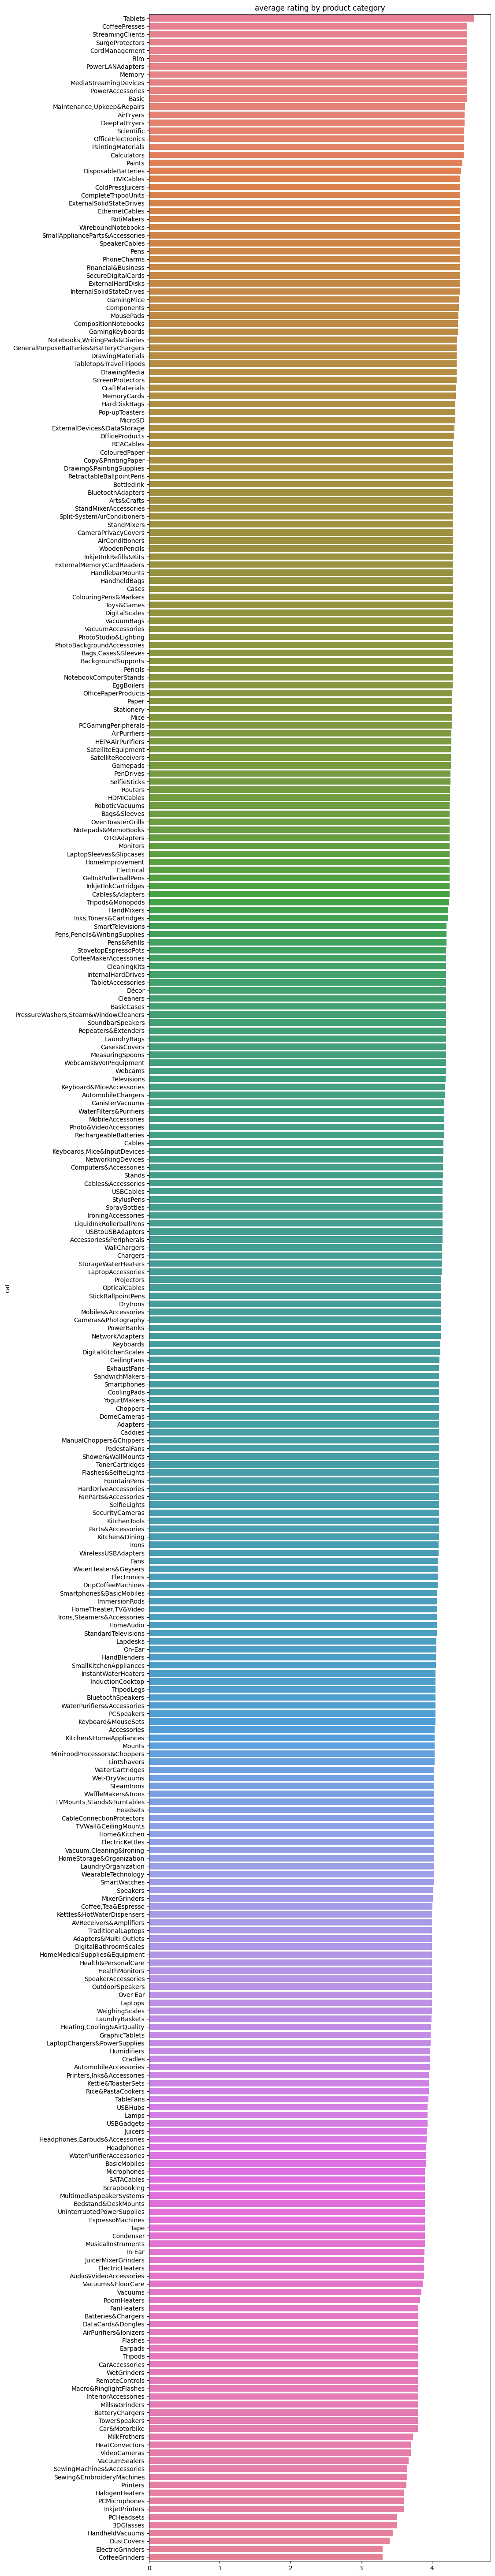

In [593]:
plt.figure(figsize=(10,75))
sns.barplot(data=l.groupby(['cat']).agg({"rate":"mean"}).sort_values("rate",ascending=False).T,orient='h')
plt.title("average rating by product category")
plt.show()

In [594]:
# therfore the above graph is the average product rating for each category

## 2)What are the top rating_count products by category?

In [595]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [596]:
amazon['rating_count'].replace('nan','NaN',inplace=True)
#amazon["rating_count"].map({'nan':})
amazon1=amazon.copy()

In [597]:
amazon1["rating_count"]=amazon['rating_count'].str.replace(',','')


In [598]:
amazon1["rating_count"]=amazon1["rating_count"].astype(dtype='float64')

In [599]:
q_df_amazon1=amazon1[["category","rating_count"]].iloc[:,:]
q_df_amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      1465 non-null   object 
 1   rating_count  1463 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [600]:
l['cat'].value_counts()

cat
Electronics                526
Computers&Accessories      453
Home&Kitchen               448
Accessories&Peripherals    381
Kitchen&HomeAppliances     308
                          ... 
StandMixers                  1
PedestalFans                 1
VacuumAccessories            1
VacuumBags                   1
HandheldBags                 1
Name: count, Length: 317, dtype: int64

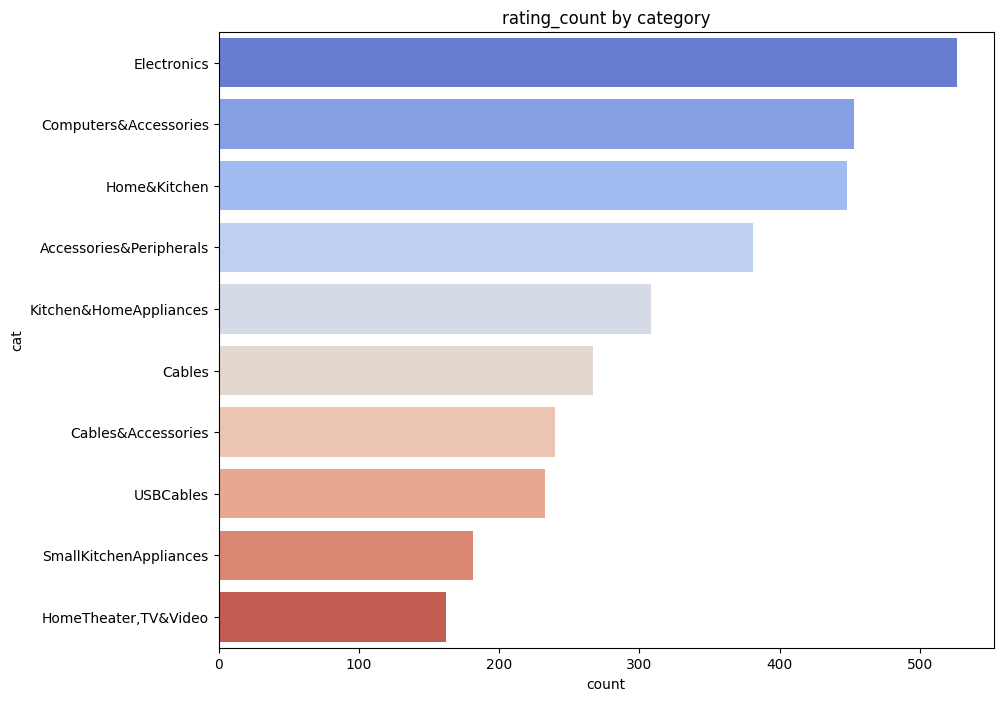

In [601]:
plt.figure(figsize=(10,8))
sns.barplot(data=l['cat'].value_counts()[:10],orient='h',palette="coolwarm")
plt.title("rating_count by category")
plt.show()

So these are top 10 rating counts by category this is shown everything in the above graph

## 3)What is the distribution of discounted prices vs. actual prices?

In [602]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [603]:
amazon1["discounted_price"].unique()
amazon1["discounted_price"]=amazon1['discounted_price'].str.replace(',','')
amazon1["discounted_price"]=amazon1['discounted_price'].str.replace('₹','')
amazon1["discounted_price"]=amazon1['discounted_price'].astype(dtype="float64")

In [604]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [605]:
amazon1["actual_price"].unique()
amazon1["actual_price"]=amazon1['actual_price'].str.replace(',','')
amazon1["actual_price"]=amazon1['actual_price'].str.replace('₹','')
amazon1["actual_price"]=amazon1['actual_price'].astype(dtype="float64")

In [606]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

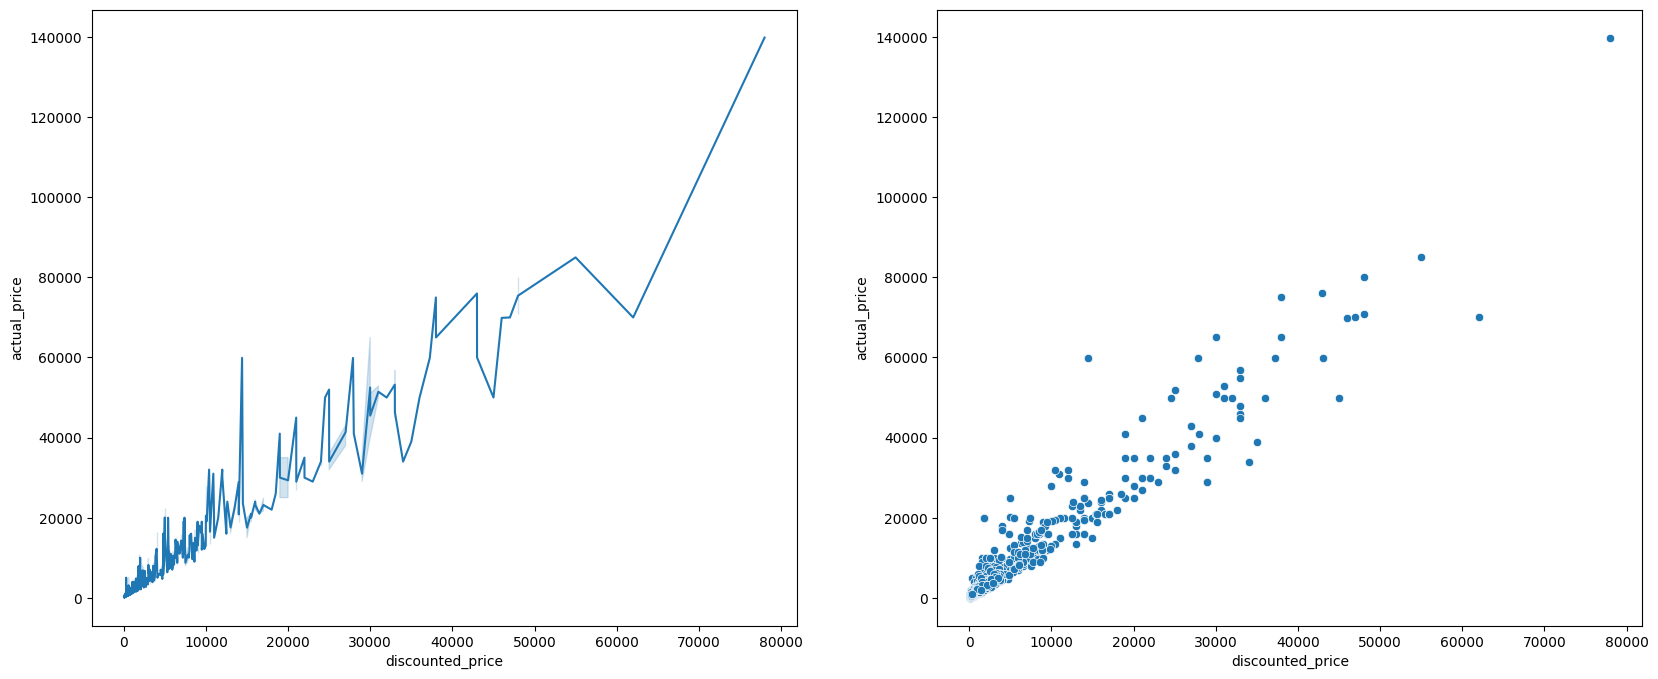

In [607]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x="discounted_price",y="actual_price",data=amazon1,palette="coolwarm")

plt.subplot(1,2,2)
sns.scatterplot(x="discounted_price",y="actual_price",data=amazon1,palette="coolwarm")
plt.show()

Therefore the distribution of discounted price and actual price in Lineplot and scattered plot is given above

## 4)How does the average discount percentage vary across categories?

In [608]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [609]:
amazon1["discount_percentage"]=amazon['discount_percentage'].str.replace('%','')

In [610]:
amazon1['discount_percentage'].unique()

array(['64', '43', '90', '53', '61', '85', '65', '23', '50', '33', '55',
       '63', '69', '60', '13', '44', '38', '39', '46', '41', '70', '42',
       '72', '25', '51', '73', '0', '80', '28', '67', '58', '35', '45',
       '62', '54', '27', '77', '56', '78', '31', '86', '47', '37', '75',
       '32', '68', '66', '22', '57', '17', '52', '88', '20', '59', '40',
       '26', '29', '83', '71', '15', '76', '48', '82', '36', '89', '87',
       '24', '34', '11', '91', '7', '19', '79', '21', '81', '18', '49',
       '30', '84', '10', '6', '14', '74', '4', '5', '16', '8', '2', '94',
       '12', '3', '9'], dtype=object)

In [611]:
amazon1["discount_percentage"]=amazon1["discount_percentage"].astype(dtype="float64")

In [612]:
l1=pd.DataFrame(columns=['cat',"discount"])
l1["discount"]=l1["discount"].astype(dtype="float64")
l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cat       0 non-null      object 
 1   discount  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 132.0+ bytes


In [613]:
q_df_amazon1=amazon1[["category","discount_percentage"]].iloc[:,:]
q_df_amazon1

category  discount_percentage
0     Computers&Accessories|Accessories&Peripherals|...                 64.0
1     Computers&Accessories|Accessories&Peripherals|...                 43.0
2     Computers&Accessories|Accessories&Peripherals|...                 90.0
3     Computers&Accessories|Accessories&Peripherals|...                 53.0
4     Computers&Accessories|Accessories&Peripherals|...                 61.0
...                                                 ...                  ...
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...                 59.0
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...                 25.0
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...                 28.0
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...                 26.0
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...                 22.0

[1465 rows x 2 columns]

In [614]:
i=0
while i<1465:
  for j in (q_df_amazon1['category'].iloc[i].split("|")):
    l1.loc[len(l1)]=[j,q_df_amazon1['discount_percentage'].loc[i]]
  i=i+1

In [615]:
l1.groupby(['cat']).agg({'discount':'mean'}).sort_values("discount",ascending=False).T

cat       Earpads  CableConnectionProtectors  PhoneCharms  DustCovers  \
discount     90.0                       90.0         90.0        87.5   

cat       Shower&WallMounts  InternalHardDrives  Adapters  USBtoUSBAdapters  \
discount               82.0                80.0      79.6              78.5   

cat       Décor     Stands  ...  Film  GelInkRollerballPens  \
discount   76.0  75.818182  ...   0.0                   0.0   

cat       StandMixerAccessories  Drawing&PaintingSupplies  StreamingClients  \
discount                    0.0                       0.0               0.0   

cat       Copy&PrintingPaper  ColouredPaper  ColouringPens&Markers  \
discount                 0.0            0.0                    0.0   

cat       Toys&Games  WoodenPencils  
discount         0.0            0.0  

[1 rows x 317 columns]

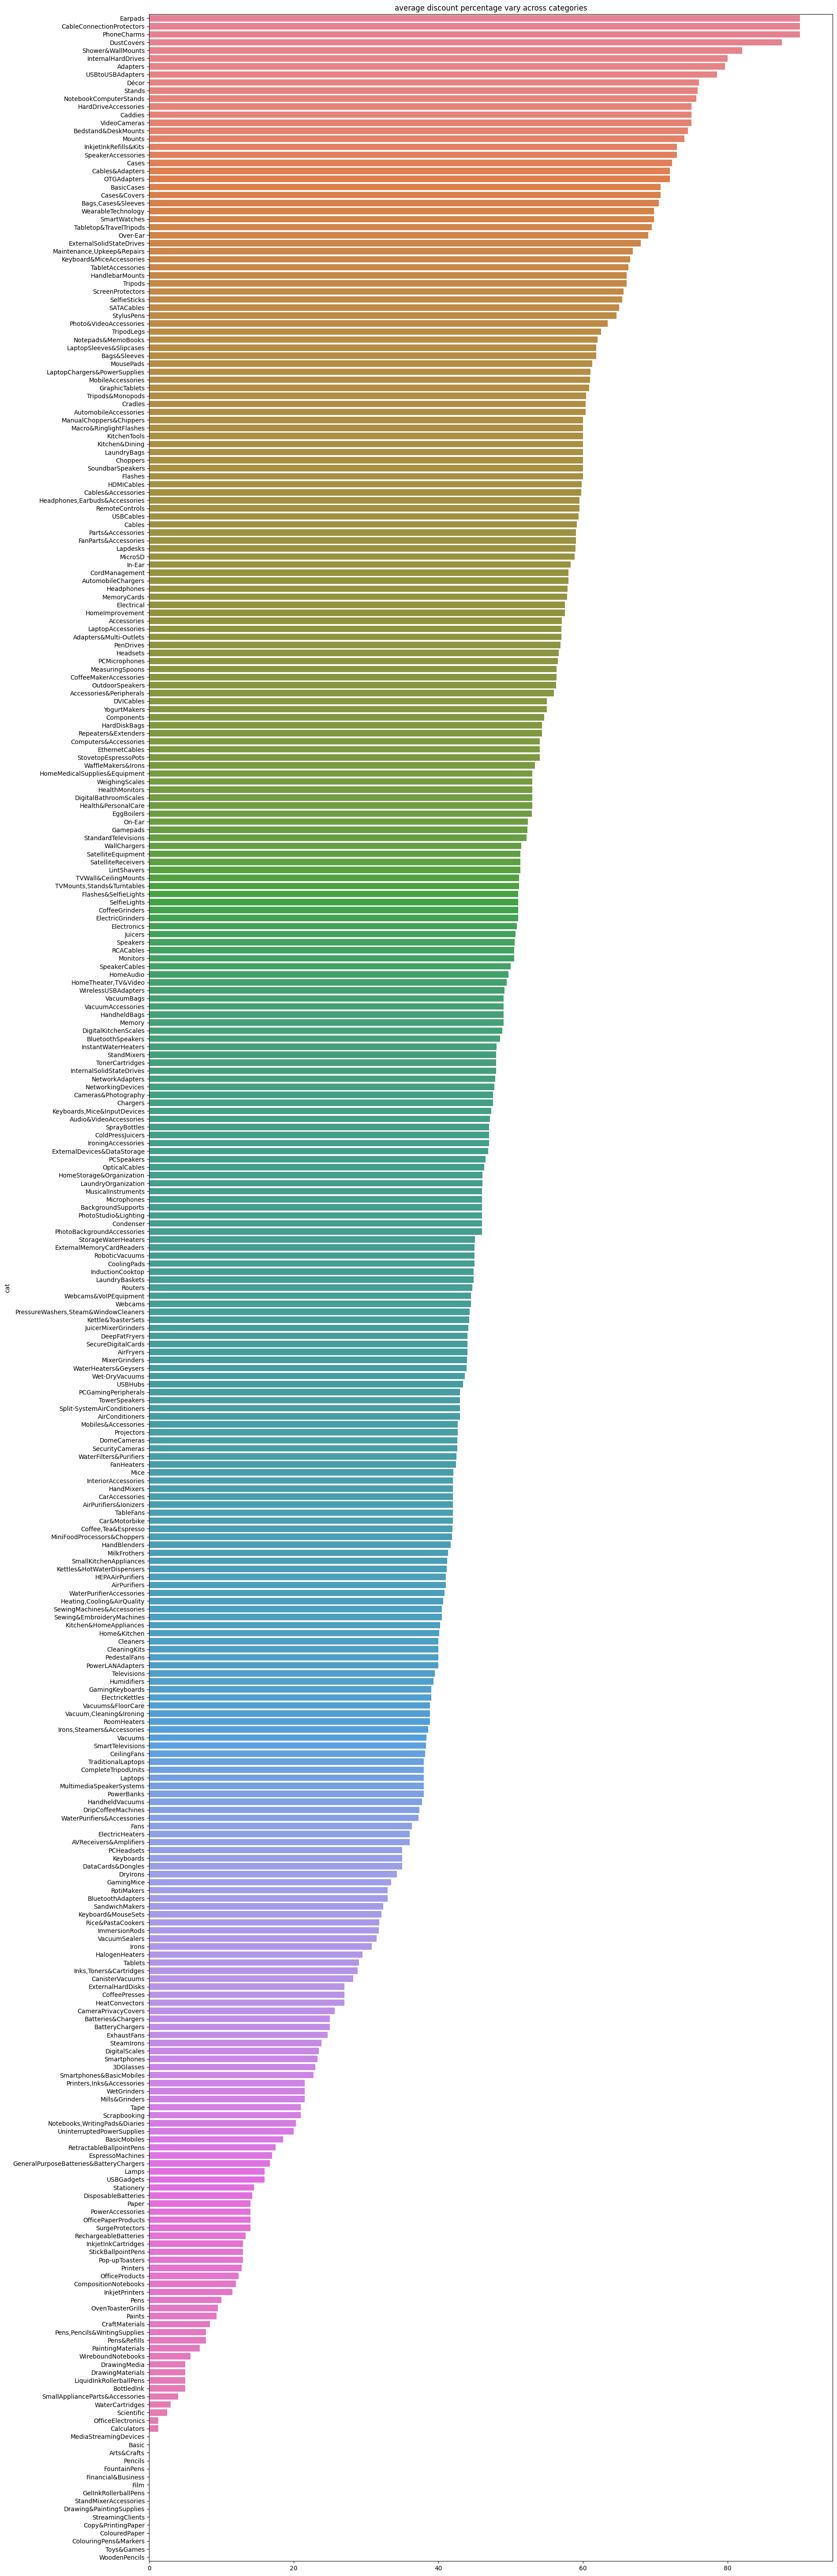

In [616]:
plt.figure(figsize=(20,75))
sns.barplot(data=(l1.groupby(['cat']).agg({'discount':'mean'}).sort_values("discount",ascending=False).T),orient='h')
plt.title('average discount percentage vary across categories')
plt.show()

## 5)What are the most popular product names?

In [617]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [618]:
amazon1["product_name"].value_counts()

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                                                3
                                                                                                                                                                                          ..
Kitchengenix's Mini Waffle Maker 4 Inch- 350 Watts: Stainless Steel Non-Stick Electric Iron Machine for Individual Belgian Waffles, Pan Cakes, Paninis or Other Snacks (Red)               1
IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1    1
IKEA Milk Frother for Your Milk, Coffee,(Cold and hot Drinks), Black                                                                                                                       1
Syska SDI-07 1000 W Stellar with Golden American Heritage Soleplate Dry Iron (Blue)                                                                                                        1
Hilton Quartz Heater 400/800-Watt ISI 2 Rods Multi Mode Heater Long Lasting Quick Heating Extremely Warm (Grey)                                                                            1
Name: count, Length: 1337, dtype: int64

In [619]:
product_names=[]
for i in amazon1["product_name"]:
  product_names.append(i.split(" ")[0])

In [620]:
pdproduct_names=pd.Series(product_names)

In [621]:
pdproduct_names.value_counts()

boAt            67
Samsung         36
AmazonBasics    33
Portronics      31
Ambrane         29
                ..
FYA              1
Campfire         1
SVM              1
Boat             1
Hi-Mobiler       1
Name: count, Length: 437, dtype: int64

In [622]:
dataset3qn5=pdproduct_names.value_counts()
dataset3qn5.iloc[:25]

boAt            67
Samsung         36
AmazonBasics    33
Portronics      31
Ambrane         29
Bajaj           26
Redmi           26
Fire-Boltt      26
Amazon          25
Noise           24
Wayona          24
HP              21
MI              21
Duracell        20
Havells         19
Philips         18
SanDisk         17
TP-Link         17
Zebronics       16
Logitech        15
Crompton        15
Prestige        14
AGARO           14
ZEBRONICS       14
iQOO            14
Name: count, dtype: int64

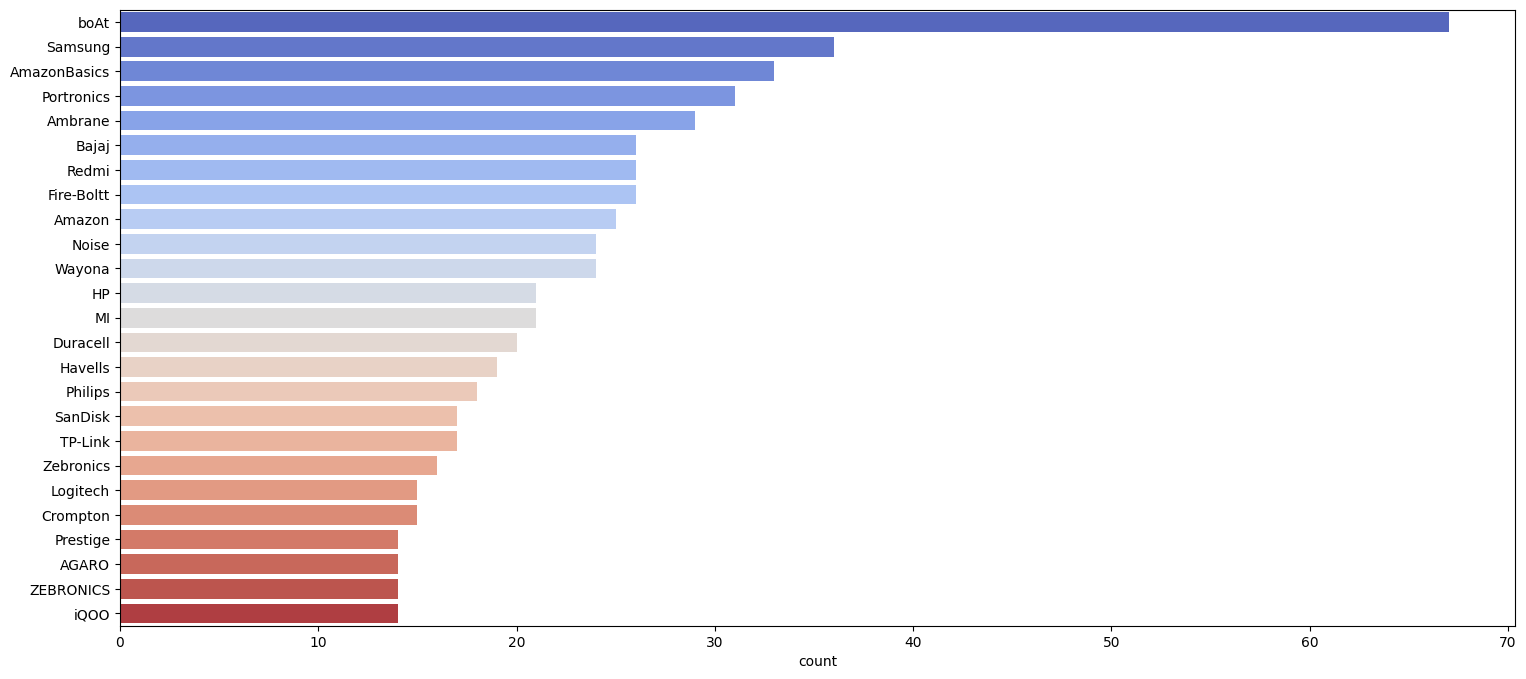

In [623]:
plt.figure(figsize=(18,8))
sns.barplot(data=dataset3qn5.iloc[:25],orient='h',palette="coolwarm")
plt.show()

In [624]:
# The above figure are the most popular product names

## 6)What are the most popular product keywords?

In [625]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [626]:
product_namesq6=[]
for i in amazon1["product_name"]:
  product_namesq6.extend(i.split(" "))

In [627]:
pdproduct_namesq6=pd.Series(product_namesq6)

In [628]:
pdproduct_namesq6.value_counts()

with         716
for          613
|            457
&            432
USB          342
            ... 
Celery         1
HD9306/06      1
Winter,        1
per            1
IS             1
Name: count, Length: 6440, dtype: int64

In [629]:
dataset3qn6=pdproduct_namesq6.value_counts()
dataset3qn6.iloc[:25]

with          716
for           613
|             457
&             432
USB           342
and           310
Cable         305
-             220
Charging      212
Fast          207
to            202
(Black)       184
C             176
Smart         171
Type          140
Compatible    134
HD            129
Data          128
TV            118
Wireless      114
LED           114
Black)        112
Black         112
in            110
1             101
Name: count, dtype: int64

In [630]:
pdproduct_namesq6=pdproduct_namesq6.str.replace('with','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('for','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('|','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('&','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('-','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('to','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('in','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('and','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('1','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('3','null')
pdproduct_namesq6=pdproduct_namesq6.str.replace('of','null')


In [631]:
dataset3qn6=pdproduct_namesq6.value_counts()
dataset3qn6.iloc[1:25]

USB            342
Cable          305
Chargnullg     212
Fast           207
(Black)        184
C              176
Smart          171
Type           140
Compatible     134
HD             129
Data           128
TV             118
LED            114
Wireless       114
Black)         112
Black          112
Bluenulloth    100
Water           94
Remote          93
2               91
Heater          89
Electric        87
Braided         85
TypenullC       85
Name: count, dtype: int64

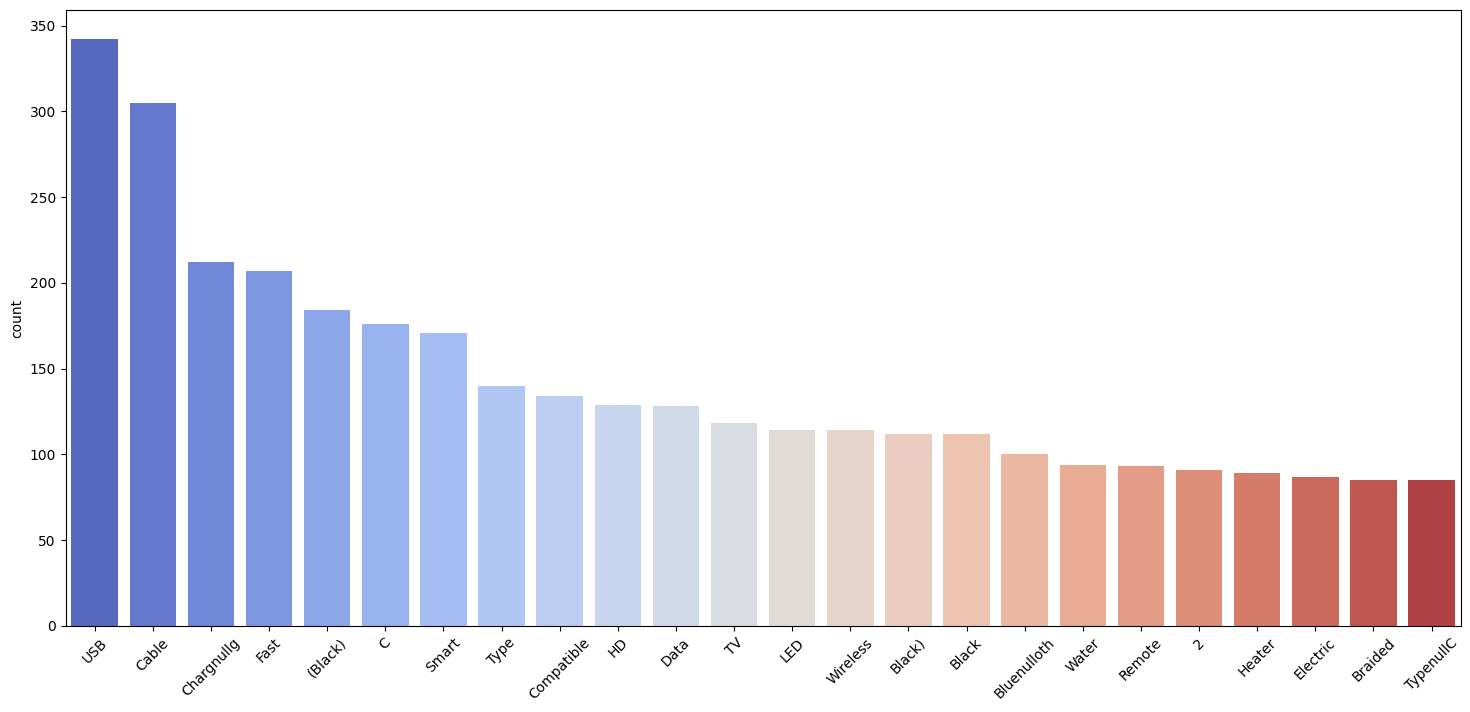

In [632]:
plt.figure(figsize=(18,8))
sns.barplot(data=dataset3qn6.iloc[1:25],palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [633]:
# So these the most popular keywords in products

## 7)What are the most popular product reviews?

In [634]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [635]:
amazon1["review_title"].unique()

array(['Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good',
       'A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit',
       "Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for money,Working nice,it's a really nice product",
       ...,
       'very good,Work but front melt after 2 month,Good one,It is durable,Review.,DEFECTIVE PRODUCT,Nice product,Nice product',
       'Fan Speed is slow,Good quality,Good product,good,Old is gold.,Good product,Nice product,Super 💕',
       'Works perfect,Ok good product,Nice Product. Recommend it. But cleaning its exterior is cumbersome.,Excellent product✌,A good product for household use,मुझे बिल्कुल भी मजा नहीं आया और वापस कर दिया।,Best product,Good'],
      dtype=object)

In [636]:
review_title_commonwords=[]
for i in amazon1["review_title"]:
  review_title_commonwords.extend(i.split(" "))
for i in review_title_commonwords:
  i.lower()
print(review_title_commonwords)

['Satisfied,Charging', 'is', 'really', 'fast,Value', 'for', 'money,Product', 'review,Good', 'quality,Good', 'product,Good', 'Product,As', 'of', 'now', 'seems', 'good', 'A', 'Good', 'Braided', 'Cable', 'for', 'Your', 'Type', 'C', 'Device,Good', 'quality', 'product', 'from', 'ambrane,Super', 'cable,As,Good', 'quality,Good', 'product,its', 'good,Good', 'quality', 'for', 'the', 'price', 'but', 'one', 'issue', 'with', 'my', 'unit', 'Good', 'speed', 'for', 'earlier', 'versions,Good', 'Product,Working', 'good,Good', 'for', 'the', 'price,Good,Worth', 'for', 'money,Working', "nice,it's", 'a', 'really', 'nice', 'product', 'Good', 'product,Good', 'one,Nice,Really', 'nice', 'product,Very', 'first', 'time', 'change,Good,Fine', 'product', 'but', 'could', 'be', 'better,Very', 'nice', "it's", 'charging', 'like', 'jet', 'As', 'good', 'as', 'original,Decent,Good', 'one', 'for', 'secondary', 'use,Best', 'quality,GOOD,Amazing', 'product', 'at', 'a', 'mind', 'blowing', 'price!,Nice', 'Quality,Good', 'produ

In [637]:
review_title_commonwords2=[]
for i in review_title_commonwords:
  review_title_commonwords2.extend(i.split(","))
print(review_title_commonwords2)
print(len(review_title_commonwords2))


['Satisfied', 'Charging', 'is', 'really', 'fast', 'Value', 'for', 'money', 'Product', 'review', 'Good', 'quality', 'Good', 'product', 'Good', 'Product', 'As', 'of', 'now', 'seems', 'good', 'A', 'Good', 'Braided', 'Cable', 'for', 'Your', 'Type', 'C', 'Device', 'Good', 'quality', 'product', 'from', 'ambrane', 'Super', 'cable', 'As', 'Good', 'quality', 'Good', 'product', 'its', 'good', 'Good', 'quality', 'for', 'the', 'price', 'but', 'one', 'issue', 'with', 'my', 'unit', 'Good', 'speed', 'for', 'earlier', 'versions', 'Good', 'Product', 'Working', 'good', 'Good', 'for', 'the', 'price', 'Good', 'Worth', 'for', 'money', 'Working', 'nice', "it's", 'a', 'really', 'nice', 'product', 'Good', 'product', 'Good', 'one', 'Nice', 'Really', 'nice', 'product', 'Very', 'first', 'time', 'change', 'Good', 'Fine', 'product', 'but', 'could', 'be', 'better', 'Very', 'nice', "it's", 'charging', 'like', 'jet', 'As', 'good', 'as', 'original', 'Decent', 'Good', 'one', 'for', 'secondary', 'use', 'Best', 'quality'

In [638]:
pdreview_title_commonwords=pd.Series(review_title_commonwords2)

In [639]:
pdreview_title_commonwords.value_counts().iloc[:15]

Good       2614
product    1793
for        1390
good       1160
is          904
and         802
            795
the         710
Nice        662
to          649
but         572
quality     552
not         451
money       443
Very        427
Name: count, dtype: int64

In [640]:
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('product','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('for','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('good','Good')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('very','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace(' ','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('to','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('in','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('and','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('to','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('but','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('not','null')


In [641]:
pdreview_title_commonwords.value_counts().iloc[:15]

null       6302
Good       3774
is          904
            795
the         710
Nice        662
quality     552
money       443
Very        427
a           401
price       377
it          376
Product     374
Best        354
Value       352
Name: count, dtype: int64

In [642]:
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('is','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('the','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('good','Good')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Very','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('money','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('a','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('price','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('product','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('best','best Value')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Value','best Value')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('not','null')


In [643]:
pdreview_title_commonwords.value_counts()[:15]

null          9564
Good          3774
               795
Nice           662
qunulllity     552
it             376
Product        374
Best           354
Vnulllue       352
thnull         339
with           303
of             290
use            274
Not            272
cnullble       247
Name: count, dtype: int64

In [644]:
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('qunulllity','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('it','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Product','Best Product')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Best','Best Product')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Vnulllue	','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('thnull	','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('with','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('of','null')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('best','best Value')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('Value','best Value')
pdreview_title_commonwords=pdreview_title_commonwords.str.replace('use','null')

In [645]:
print(pdreview_title_commonwords[1])
print(pdreview_title_commonwords[3])
print(pdreview_title_commonwords[6])

Chnullrgnullg
renulllly
null


In [646]:
pdreview_title_commonwordspd2=pd.Series(pdreview_title_commonwords.value_counts())

In [647]:
#From the above the good product reviews are good , Best and nice

## 8) What is the correlation between discounted_price and rating?

In [648]:
amazon1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [649]:
#amazon1.corr()
from scipy.stats import pearsonr
print(pearsonr(amazon1["discounted_price"],amazon1["rating"]))

PearsonRResult(statistic=np.float64(0.11429770050484664), pvalue=np.float64(1.1575942998224576e-05))


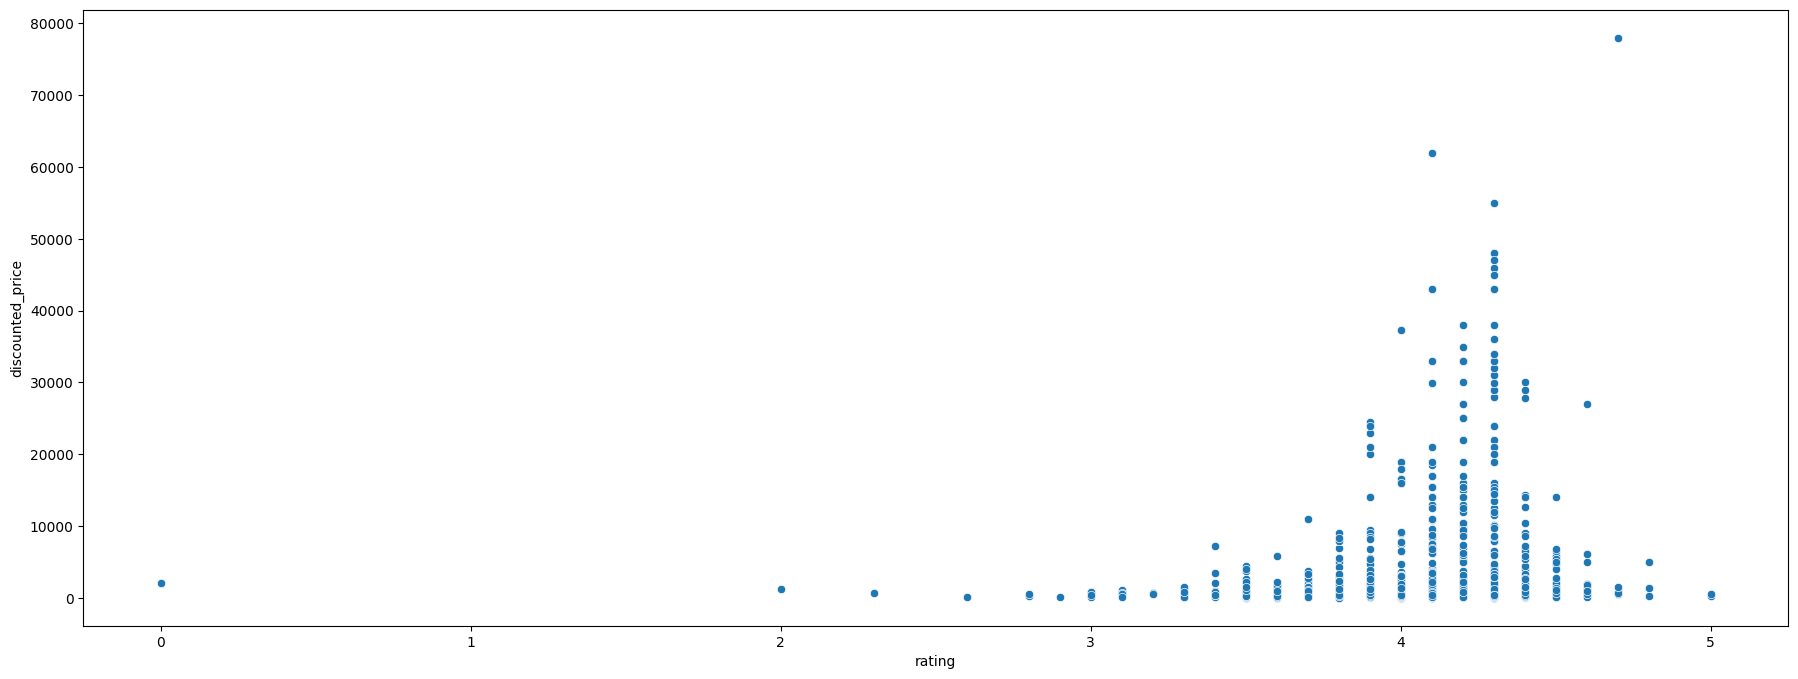

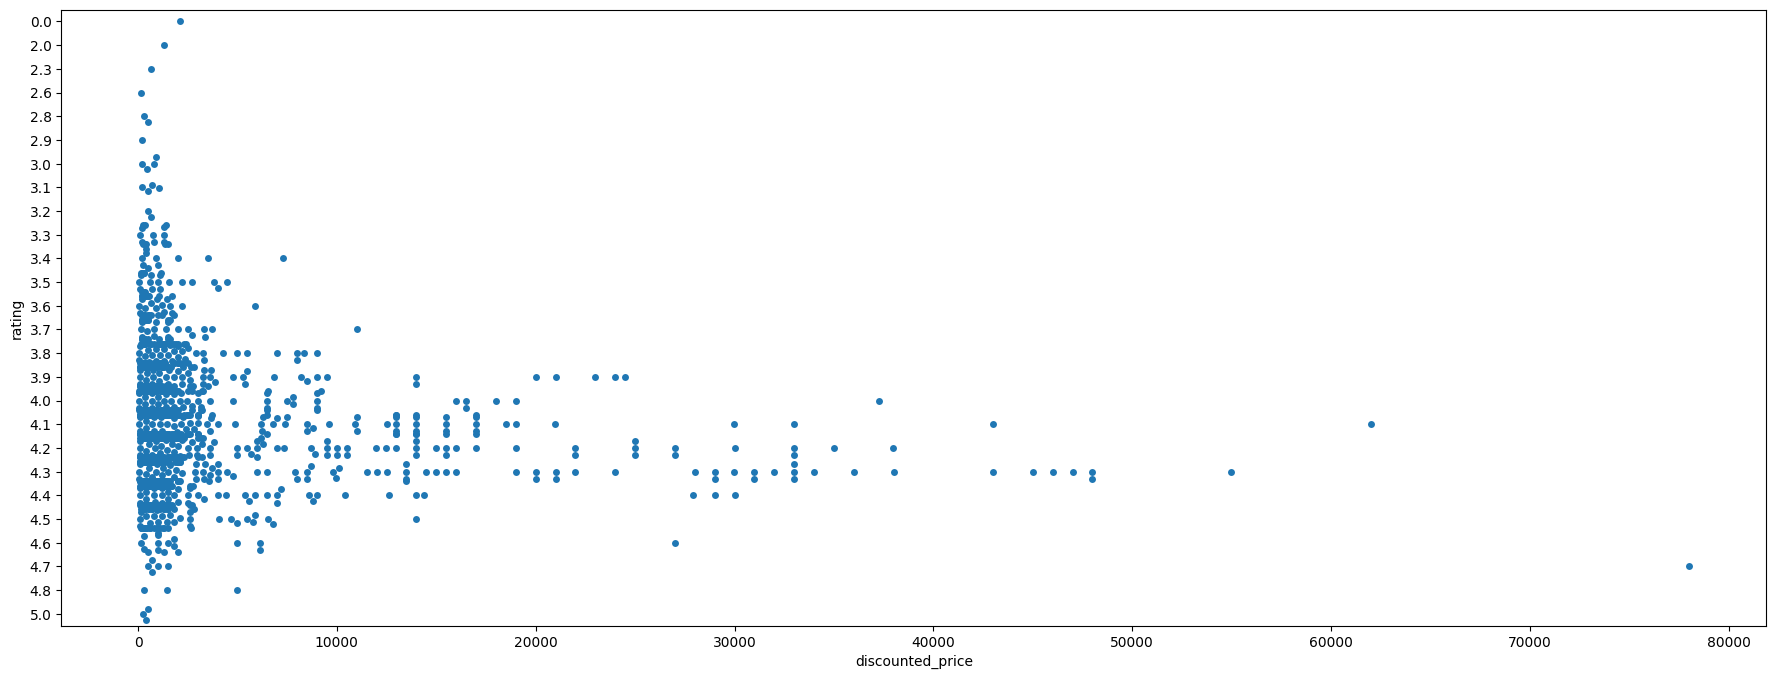

In [650]:
plt.figure(figsize=(22,8))

sns.scatterplot(data=amazon1,y="discounted_price",x="rating")
plt.show()

plt.figure(figsize=(22,8))
sns.swarmplot(data=amazon1,x="discounted_price",y="rating",orient='h')

plt.show()

## 9) What are the Top 5 categories based on the highest rating?

In [651]:
q_df_9amazon1=amazon1[["category","rating"]].iloc[:,:]
q_df_9amazon1

category  rating
0     Computers&Accessories|Accessories&Peripherals|...     4.2
1     Computers&Accessories|Accessories&Peripherals|...     4.0
2     Computers&Accessories|Accessories&Peripherals|...     3.9
3     Computers&Accessories|Accessories&Peripherals|...     4.2
4     Computers&Accessories|Accessories&Peripherals|...     4.2
...                                                 ...     ...
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...     4.0
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.1
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...     3.6
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...     4.0
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.3

[1465 rows x 2 columns]

In [652]:
l2=pd.DataFrame(columns=['cat',"rating"])
#l2["discount"]=l2["discount"].astype(dtype="float64")
l2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat     0 non-null      object
 1   rating  0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


In [653]:
i=0
while i<1465:
  for j in (q_df_9amazon1['category'].iloc[i].split("|")):
    l2.loc[len(l2)]=[j,q_df_9amazon1['rating'].loc[i]]
  i=i+1

In [654]:
l2.head()

cat  rating
0    Computers&Accessories     4.2
1  Accessories&Peripherals     4.2
2       Cables&Accessories     4.2
3                   Cables     4.2
4                USBCables     4.2

In [655]:
l2.groupby(['cat']).agg({'rating':'mean'}).sort_values("rating",ascending=False)[:5]

rating
cat                     
Tablets              4.6
CoffeePresses        4.5
StreamingClients     4.5
SurgeProtectors      4.5
CordManagement       4.5

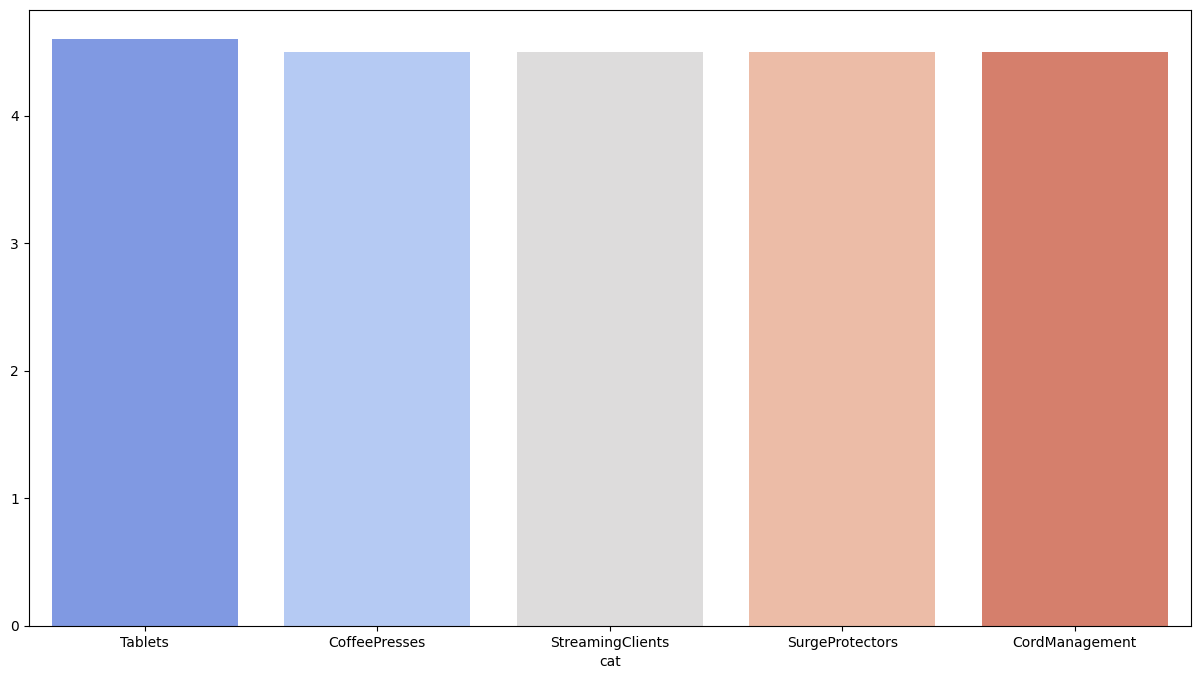

In [656]:
plt.figure(figsize=(15,8))
sns.barplot(data=l2.groupby(['cat']).agg({'rating':'mean'}).sort_values("rating",ascending=False)[:5].T,palette="coolwarm")
plt.show()

In [657]:
# So these are top five categories with the highest ratings

## 10)Identify any potential areas for improvement or optimization based on the data analysis?

Their is potential areas with improvement or optimization based on its data in the cis I have done in this Amazon sales data one of which is we can add a category variant item belongs to a main individual or primary category for example a computer should come primarily computer category we can have a category column called primary category where the item or an object belongs to mainly this category and secondary category which can belong to other categories


The another area of improvement is using to review the data analysis of reviews in the data which can be used to analyse the data can be cleaned more efficiently using nlp techniques which I have still not yet learnt basically we can give a basic star review or queue options for the user to pick a review such as good bad best average this can really help me in doing data cleaning and data analysis part in a more efficient and better way

So these are two main points in which there is a potential area of improvement

# spotify data analysis assignment iv

In [658]:
od.download("https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view")

29537it [00:00, 54551808.56it/s]

Downloaded to  ./spotify.csv


In [659]:
ass_4=pd.read_csv("/content/spotify.csv")
ass_4.tail()

Artist                                         Track Name  \
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e

##1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?

In [660]:
ass_4.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

So there are no null values in any of the columns now we'll cheque for any duplicate rows

In [661]:
print("no of duplicates",len(ass_4)-ass_4["Track ID"].nunique())

no of duplicates 27


In [662]:
ass_4.drop_duplicates("Track ID",inplace=True)

In [663]:
print("no of duplicates",len(ass_4)-ass_4["Track ID"].nunique())

no of duplicates 0


## 2)What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

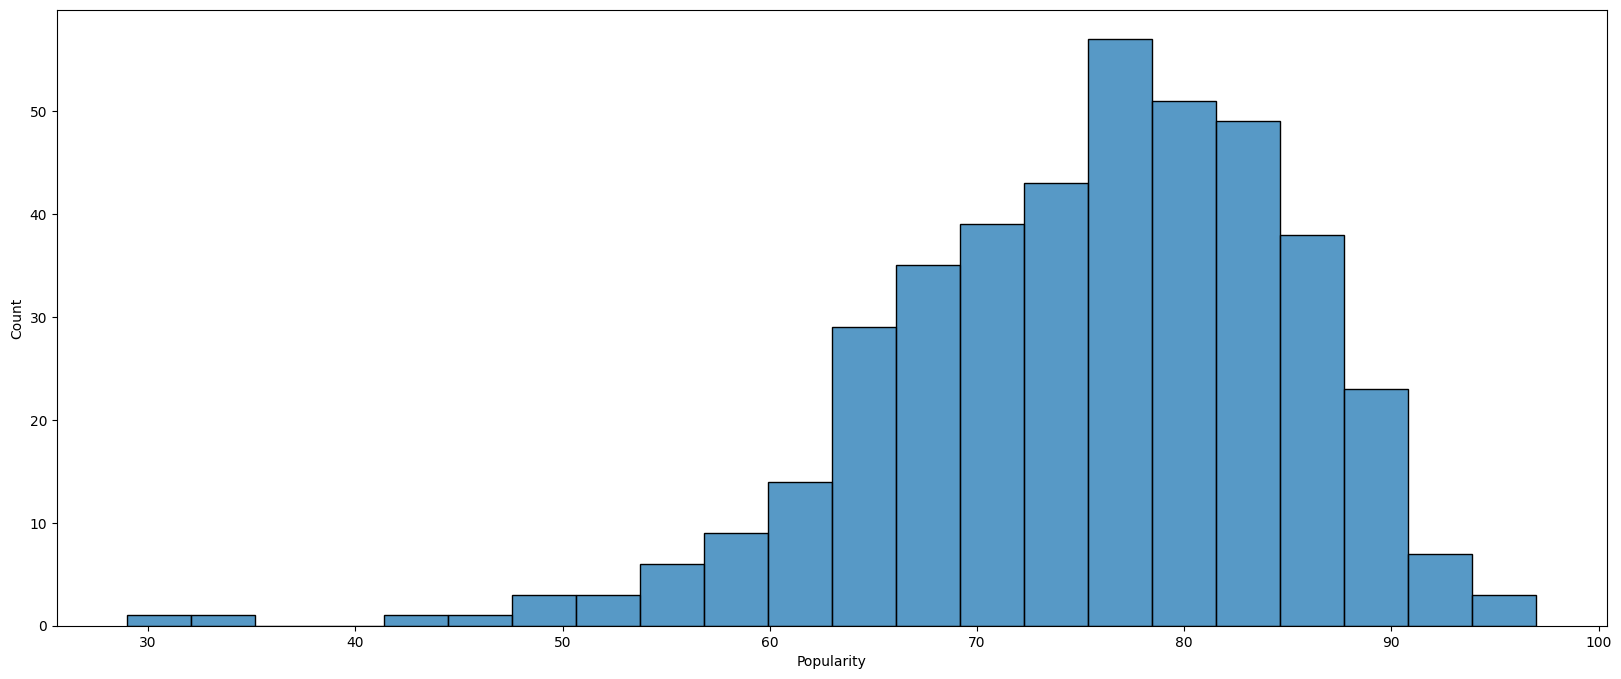

In [700]:
plt.figure(figsize=(20,8))
sns.histplot(data=ass_4,x="Popularity",palette="coolwarm")
plt.show()

## 3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

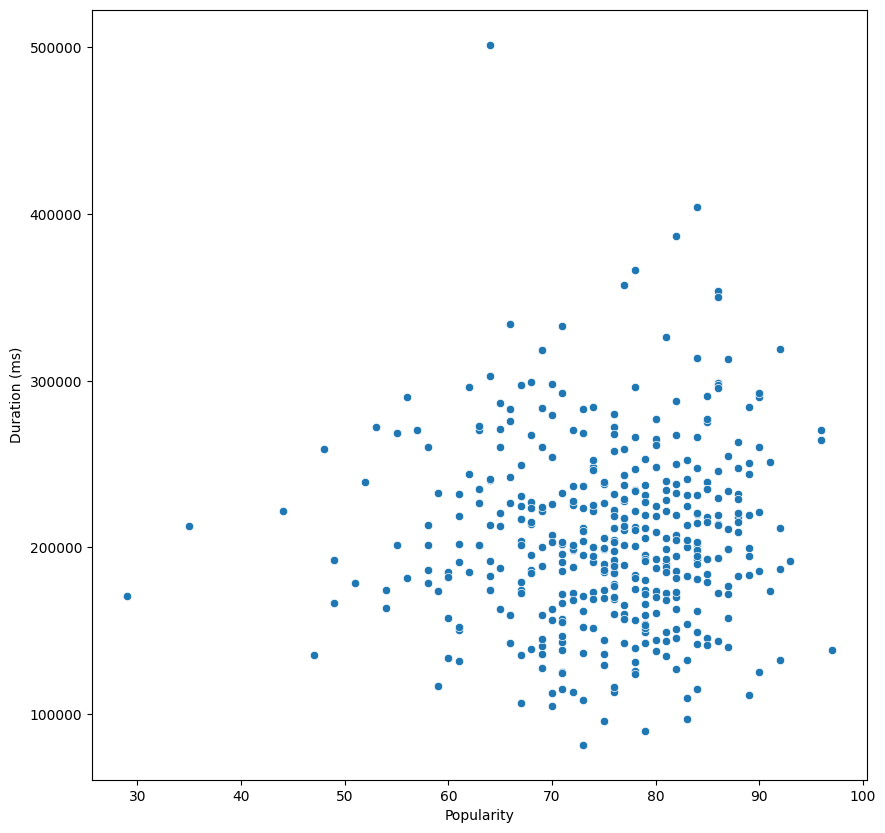

In [665]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=ass_4,x="Popularity",y="Duration (ms)")
plt.show()

In [666]:
print(pearsonr(ass_4["Popularity"],ass_4["Duration (ms)"]))

PearsonRResult(statistic=np.float64(0.038992009284390935), pvalue=np.float64(0.42934665162000424))


In [667]:
# As we can see there is no correlation between the popular and the duration of the track in the correlation is very low about 0.03

## 4)Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

In [668]:
ass_4["Artist"].value_counts()

Artist
Drake          17
Eminem         11
Lil Nas X      10
JAY-Z          10
21 Savage      10
               ..
Lil Tjay        1
BigXthaPlug     1
Fat Joe         1
A$AP Ferg       1
Diddy           1
Name: count, Length: 115, dtype: int64

In [669]:
l3=pd.DataFrame(columns=['Art',"count"])
#l2["discount"]=l2["discount"].astype(dtype="float64")
l3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Art     0 non-null      object
 1   count   0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


In [670]:
ass_4["Artist"].value_counts()

Artist
Drake          17
Eminem         11
Lil Nas X      10
JAY-Z          10
21 Savage      10
               ..
Lil Tjay        1
BigXthaPlug     1
Fat Joe         1
A$AP Ferg       1
Diddy           1
Name: count, Length: 115, dtype: int64

In [672]:
ass_4["Artist"].value_counts().T

Artist
Drake          17
Eminem         11
Lil Nas X      10
JAY-Z          10
21 Savage      10
               ..
Lil Tjay        1
BigXthaPlug     1
Fat Joe         1
A$AP Ferg       1
Diddy           1
Name: count, Length: 115, dtype: int64

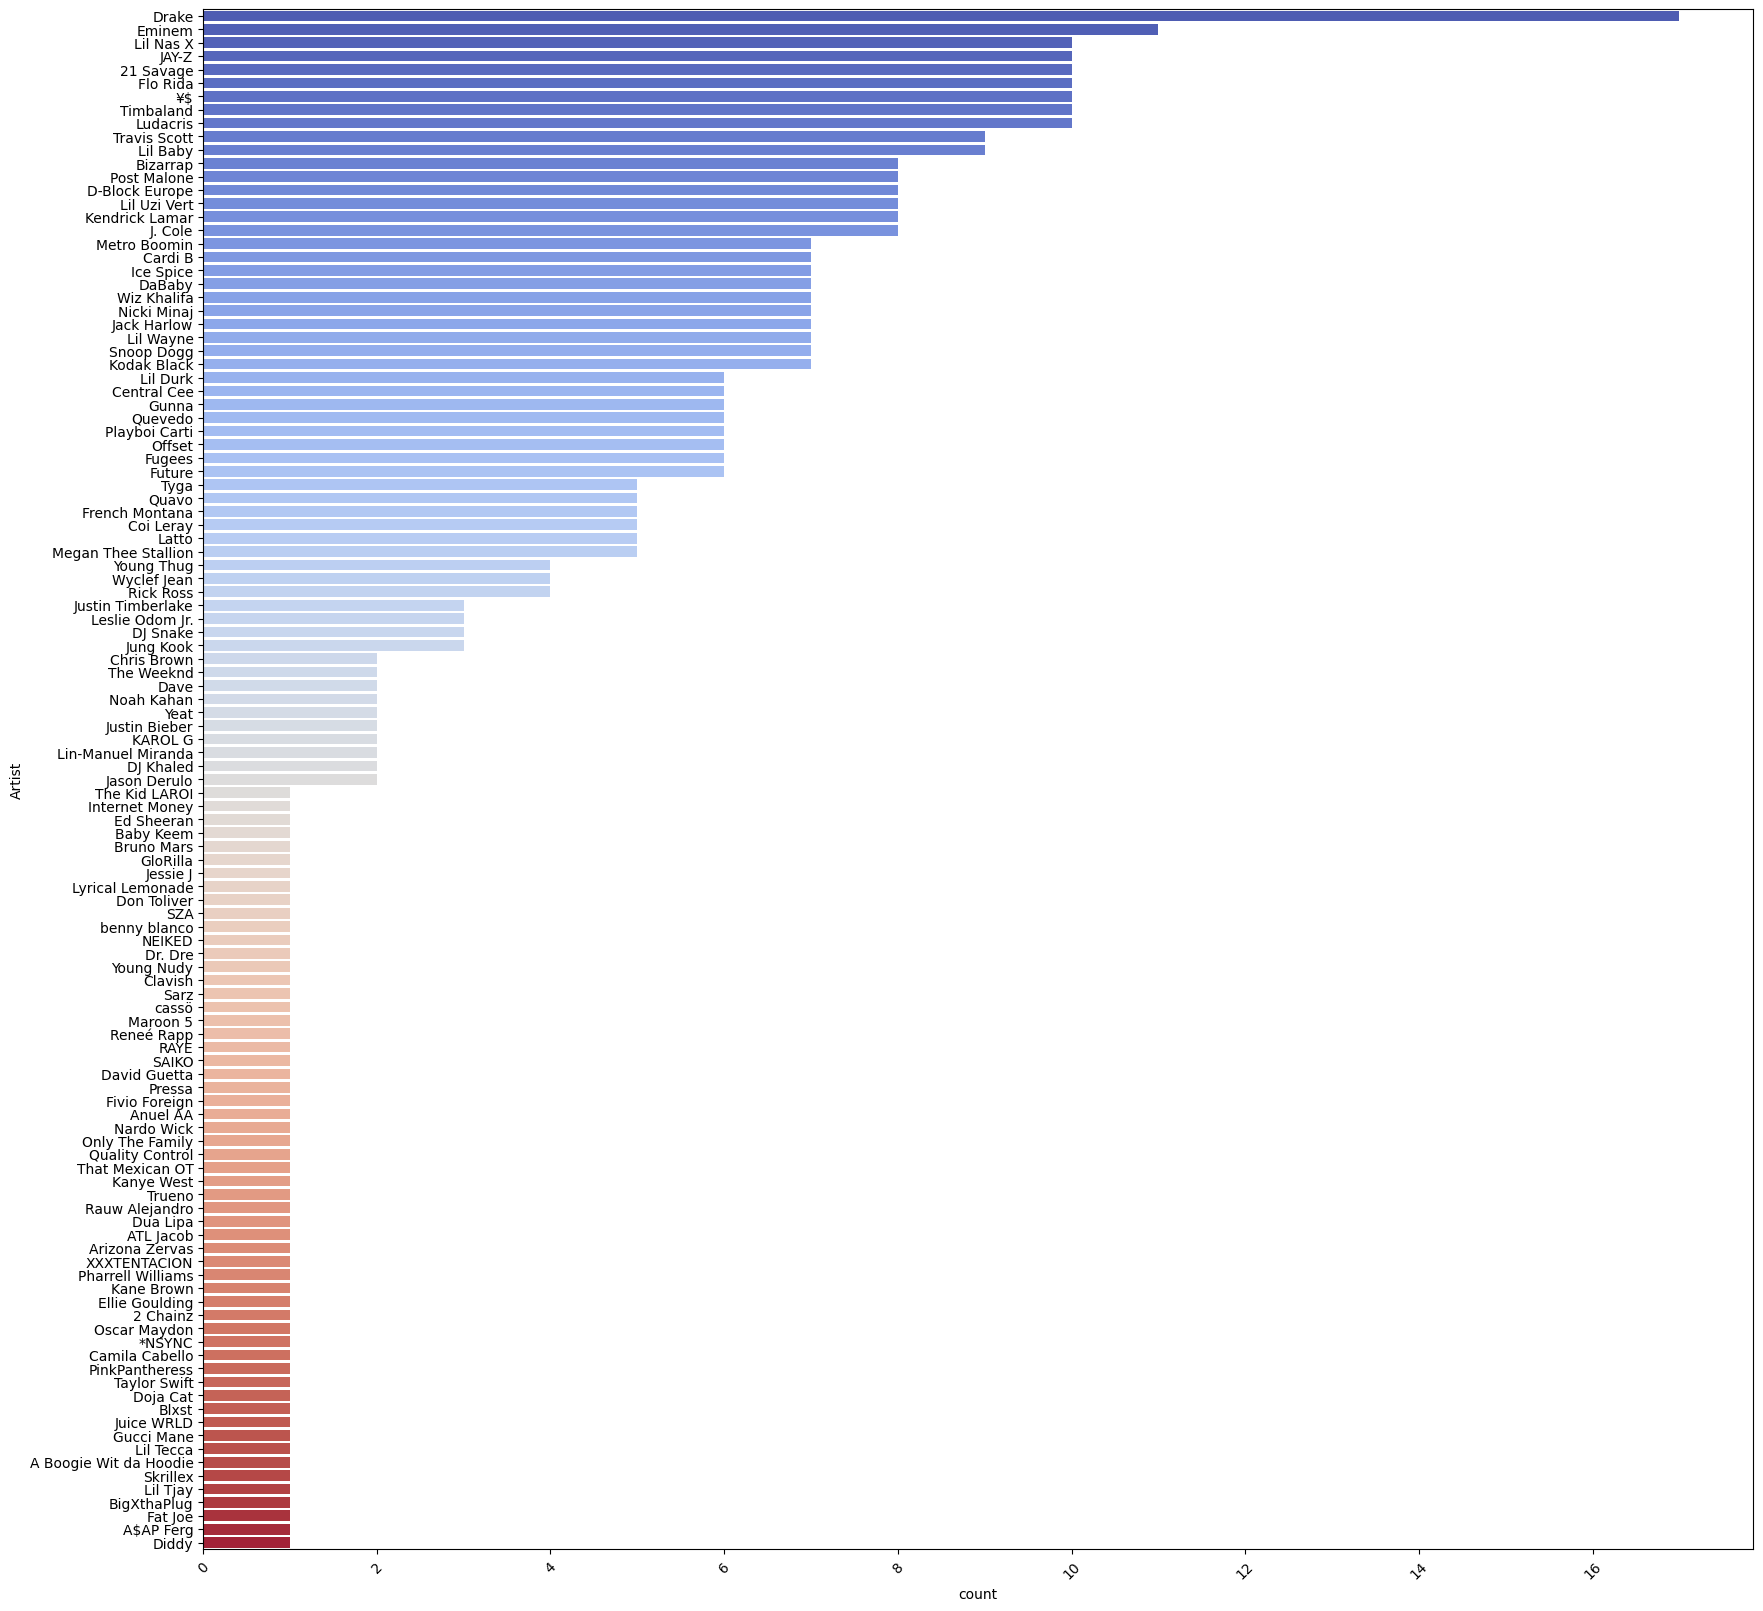

In [673]:
plt.figure(figsize=(20,20))
sns.barplot(data=ass_4["Artist"].value_counts(),orient='h',palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [674]:
# Drake has highest number of Drake's highest number of tracks in the Dataset in the graph of every artist tracks councillor is given above

## 5)What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [675]:
ass_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [676]:
ass_4.groupby(["Track Name","Artist"]).agg({"Popularity":"mean"}).sort_values("Popularity")[:5]

Popularity
Track Name                    Artist                    
Attachments (feat. Coi Leray) Pressa                29.0
Intentions                    Justin Bieber         35.0
Splash Brothers               French Montana        44.0
On Me - Remix                 Lil Baby              47.0
911 (feat. Mary J. Blige)     Wyclef Jean           48.0

 ## 6)Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?

In [677]:
ass_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


In [678]:
ass_4.groupby(["Artist"]).agg({"Popularity":"mean"}).sort_values("Popularity")[::-1].T

Artist      cassö  Trueno  David Guetta  Travis Scott    ¥$  Anuel AA  \
Popularity   92.0    89.0          87.0     86.555556  85.1      85.0   

Artist      Post Malone  Kendrick Lamar  Metro Boomin  Dua Lipa  ...  \
Popularity         85.0            84.5     84.428571      84.0  ...   

Artist      Camila Cabello  Coi Leray  That Mexican OT  French Montana  \
Popularity            61.0       60.6             60.0            58.6   

Artist      Fivio Foreign  RAYE  Wyclef Jean  Arizona Zervas  Justin Bieber  \
Popularity           58.0  55.0         54.5            54.0           49.0   

Artist      Pressa  
Popularity    29.0  

[1 rows x 115 columns]

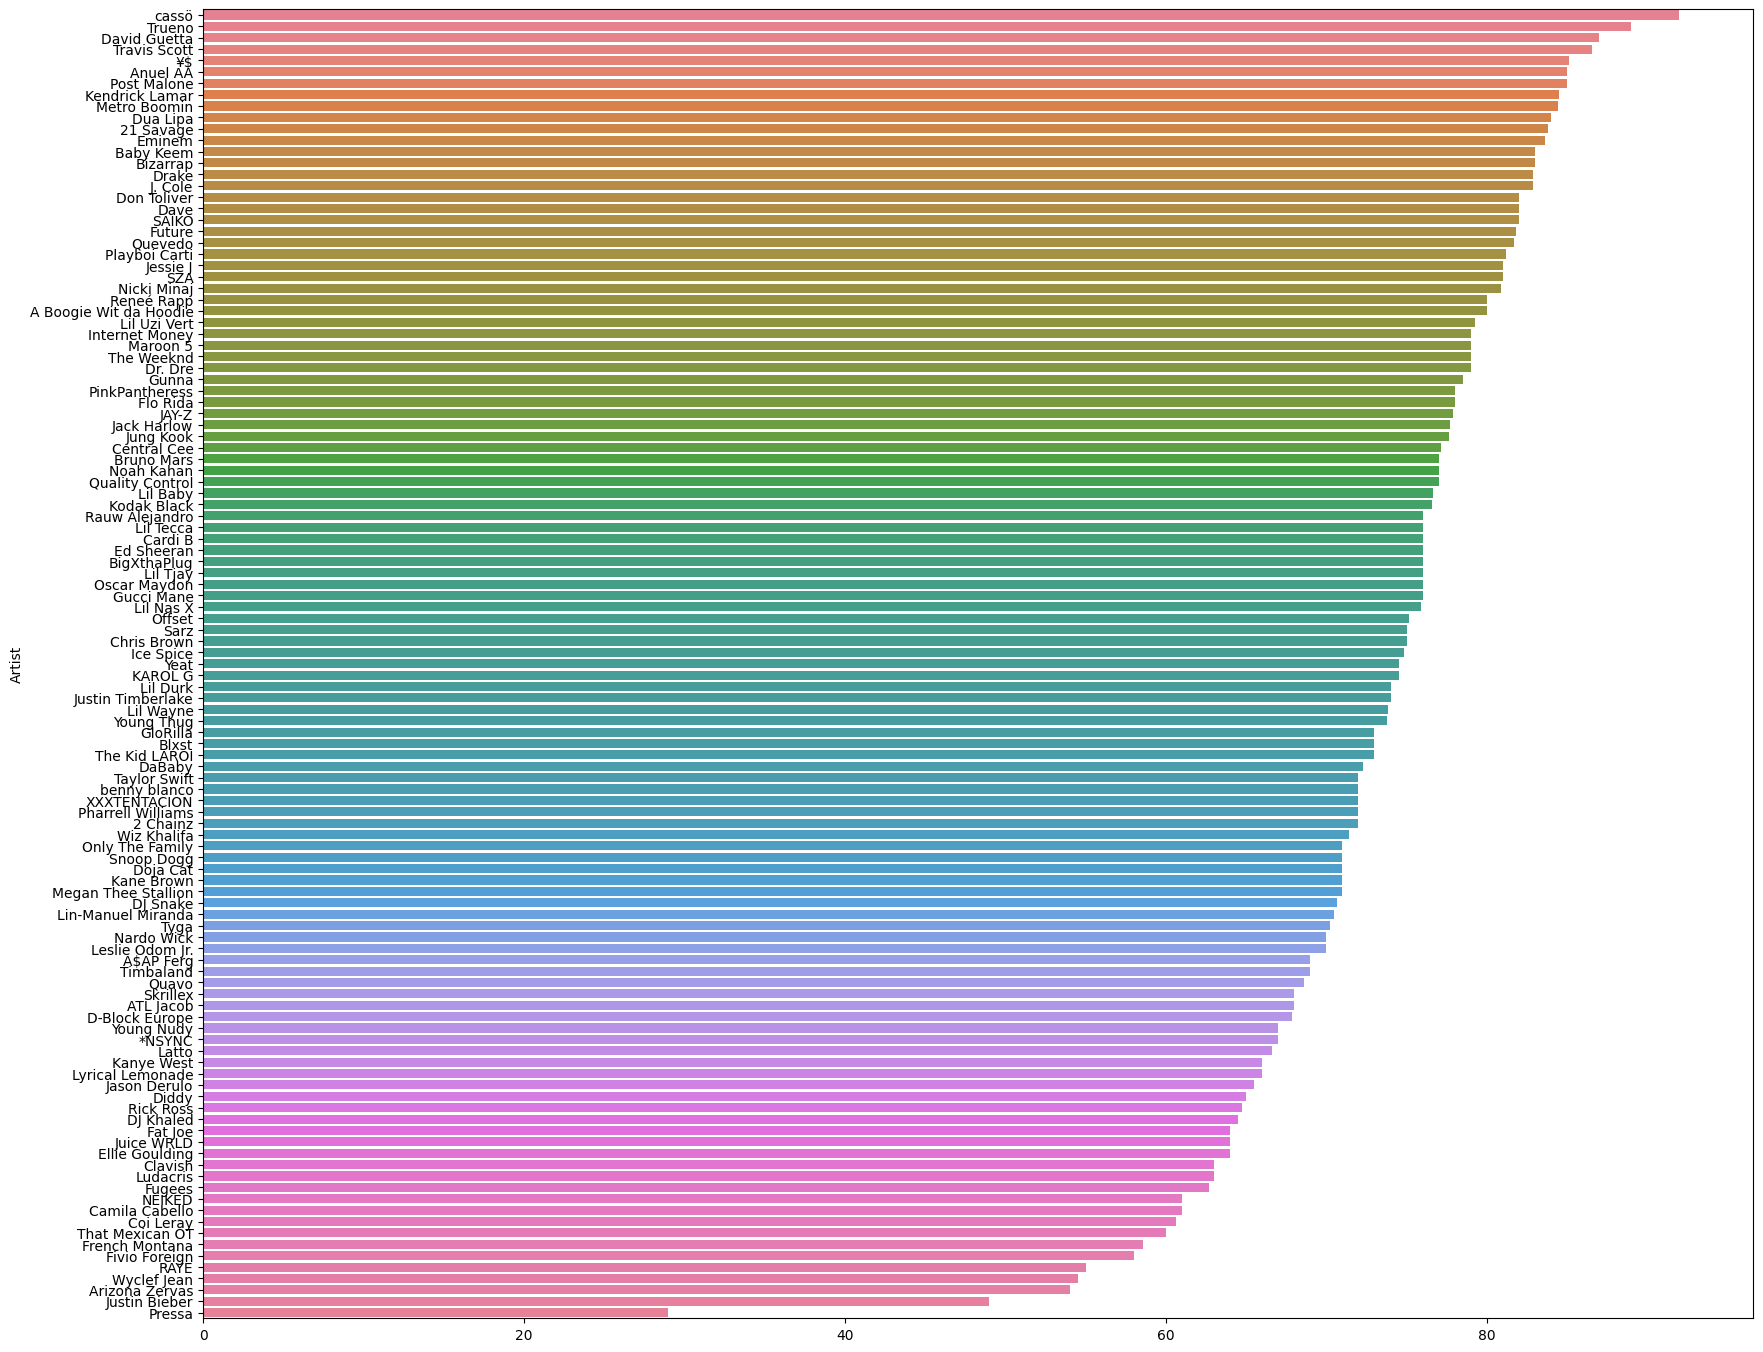

In [679]:
plt.figure(figsize=(20,17))
sns.barplot(data=ass_4.groupby(["Artist"]).agg({"Popularity":"mean"}).sort_values("Popularity")[::-1].T,orient="h")
plt.show()

## 7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [680]:
ass_4.groupby(["Artist","Track Name"]).agg({'Popularity':"mean"}).sort_values("Popularity")[::-1].head(7)

Popularity
Artist       Track Name                                          
Jack Harlow  Lovin On Me                                     97.0
21 Savage    redrum                                          96.0
¥$           CARNIVAL                                        96.0
Travis Scott FE!N (feat. Playboi Carti)                      93.0
             I KNOW ?                                        92.0
Drake        Rich Baby Daddy (feat. Sexyy Red & SZA)         92.0
Bizarrap     Young Miko: Bzrp Music Sessions, Vol. 58        92.0

## 8)Visualize relationships between multiple numerical variables simultaneously using a pair plot?

In [681]:
ass_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


<Figure size 2000x1000 with 0 Axes>

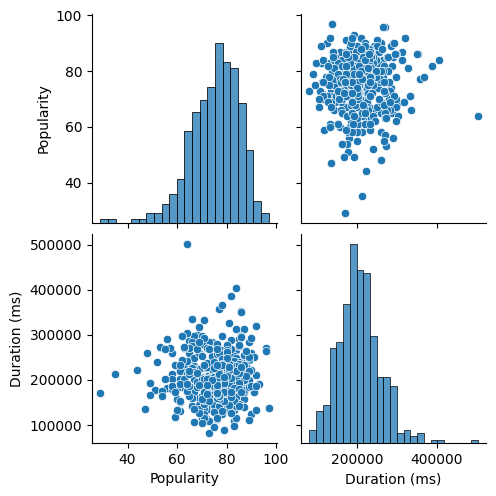

In [682]:
plt.figure(figsize=(20,10))
sns.pairplot(data=ass_4)
plt.show()

In [683]:
# As we can see both the popularity and duration are normally distributed in the pair plot where there are only two numerical variables

## 9)Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

In [721]:
ass_4.groupby(["Artist"]).agg({"Duration (ms)":'std'}).dropna().sort_values("Duration (ms)").T

Artist         Noah Kahan   The Weeknd        Latto  Justin Bieber  \
Duration (ms)         0.0  2860.954037  8778.562041    9729.789309   

Artist         Wiz Khalifa       KAROL G  Megan Thee Stallion  Metro Boomin  \
Duration (ms)  9858.498591  13039.049045         13716.170559  18549.152838   

Artist             Flo Rida          Tyga  ...        Future         Drake  \
Duration (ms)  18999.773626  19041.199983  ...  52620.786694  53991.410875   

Artist                Quavo        Eminem  Travis Scott            ¥$  \
Duration (ms)  57020.437777  58133.599333  60670.663882  65018.834133   

Artist         Kendrick Lamar  Leslie Odom Jr.  Lin-Manuel Miranda  \
Duration (ms)    66474.327347      95652.38567       124821.317442   

Artist            DJ Khaled  
Duration (ms)  170870.93946  

[1 rows x 58 columns]

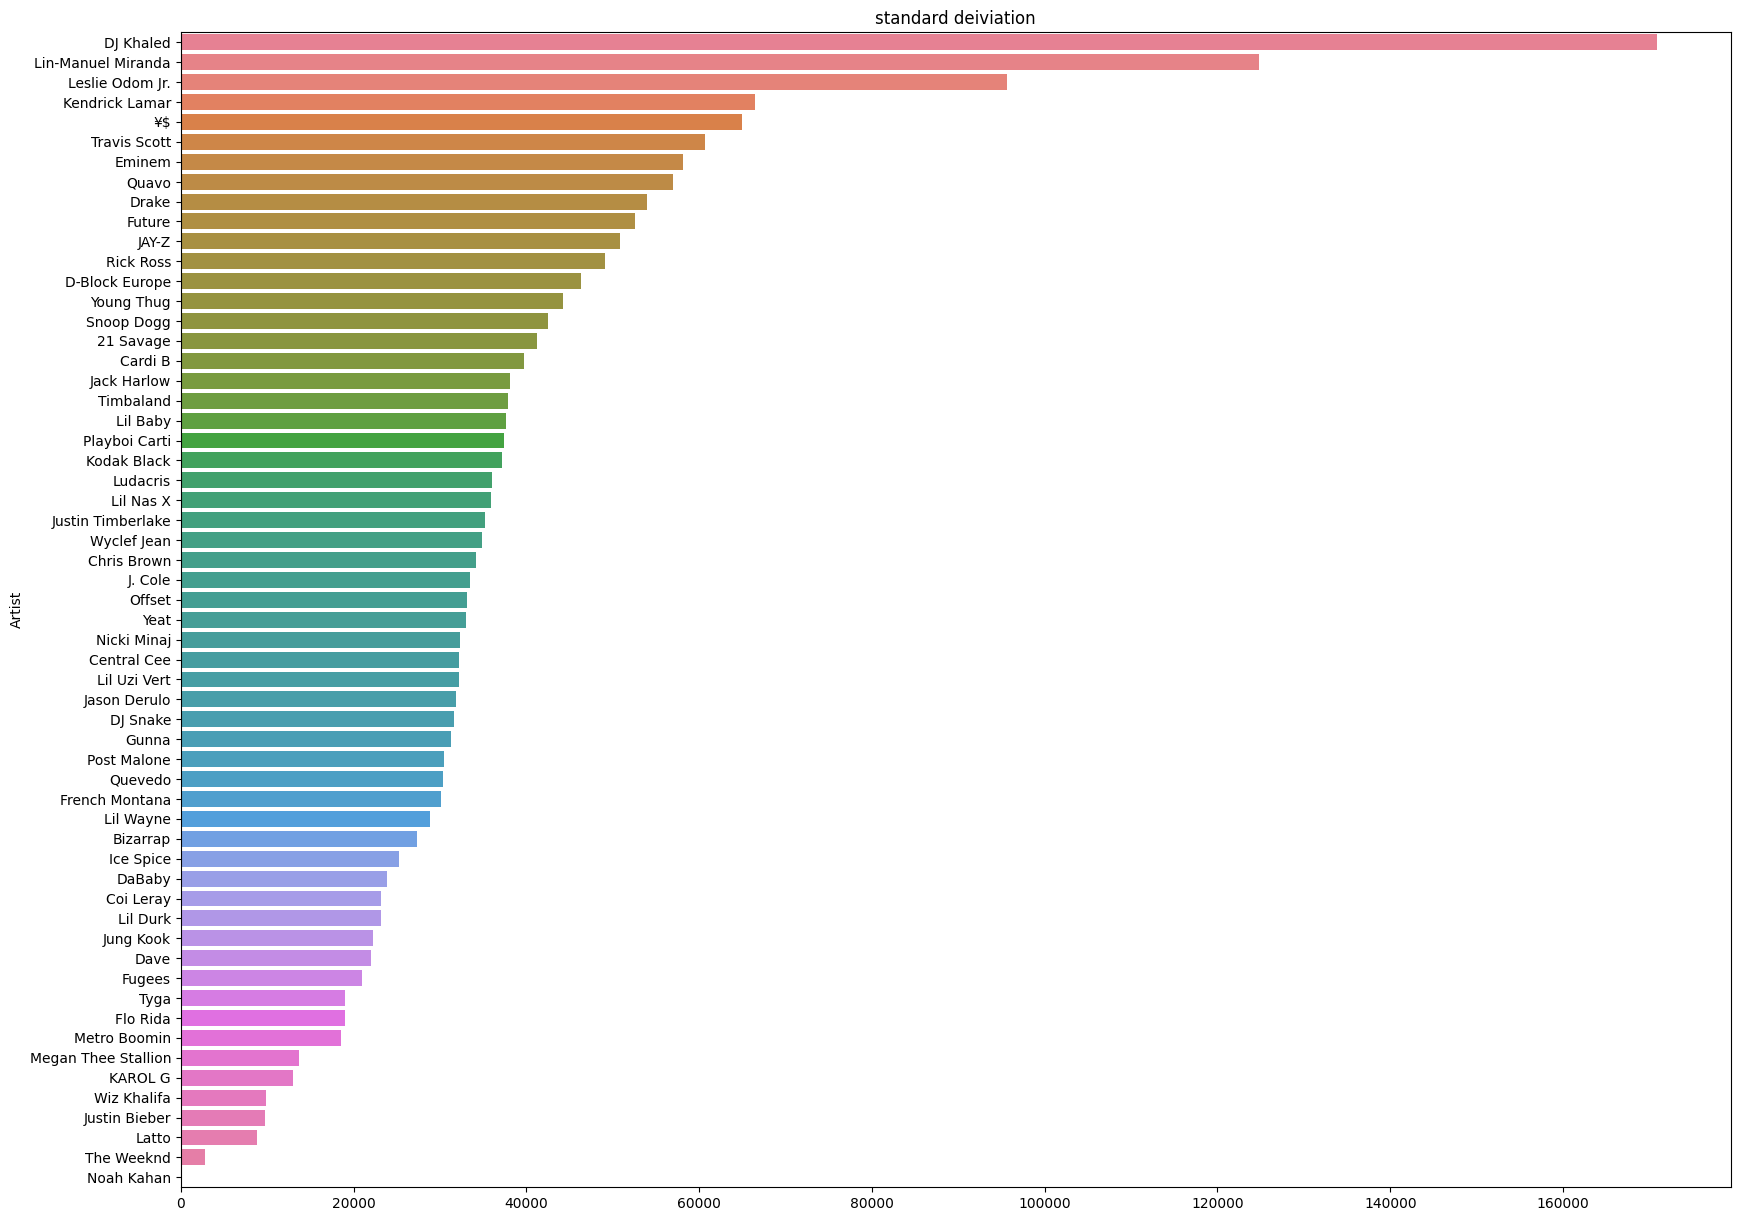

In [723]:
plt.figure(figsize=(20,15))
sns.barplot(data=ass_4.groupby(["Artist"]).agg({"Duration (ms)":'std'}).dropna().sort_values("Duration (ms)")[::-1].T,orient='h')
plt.title("standard deiviation")
plt.show()

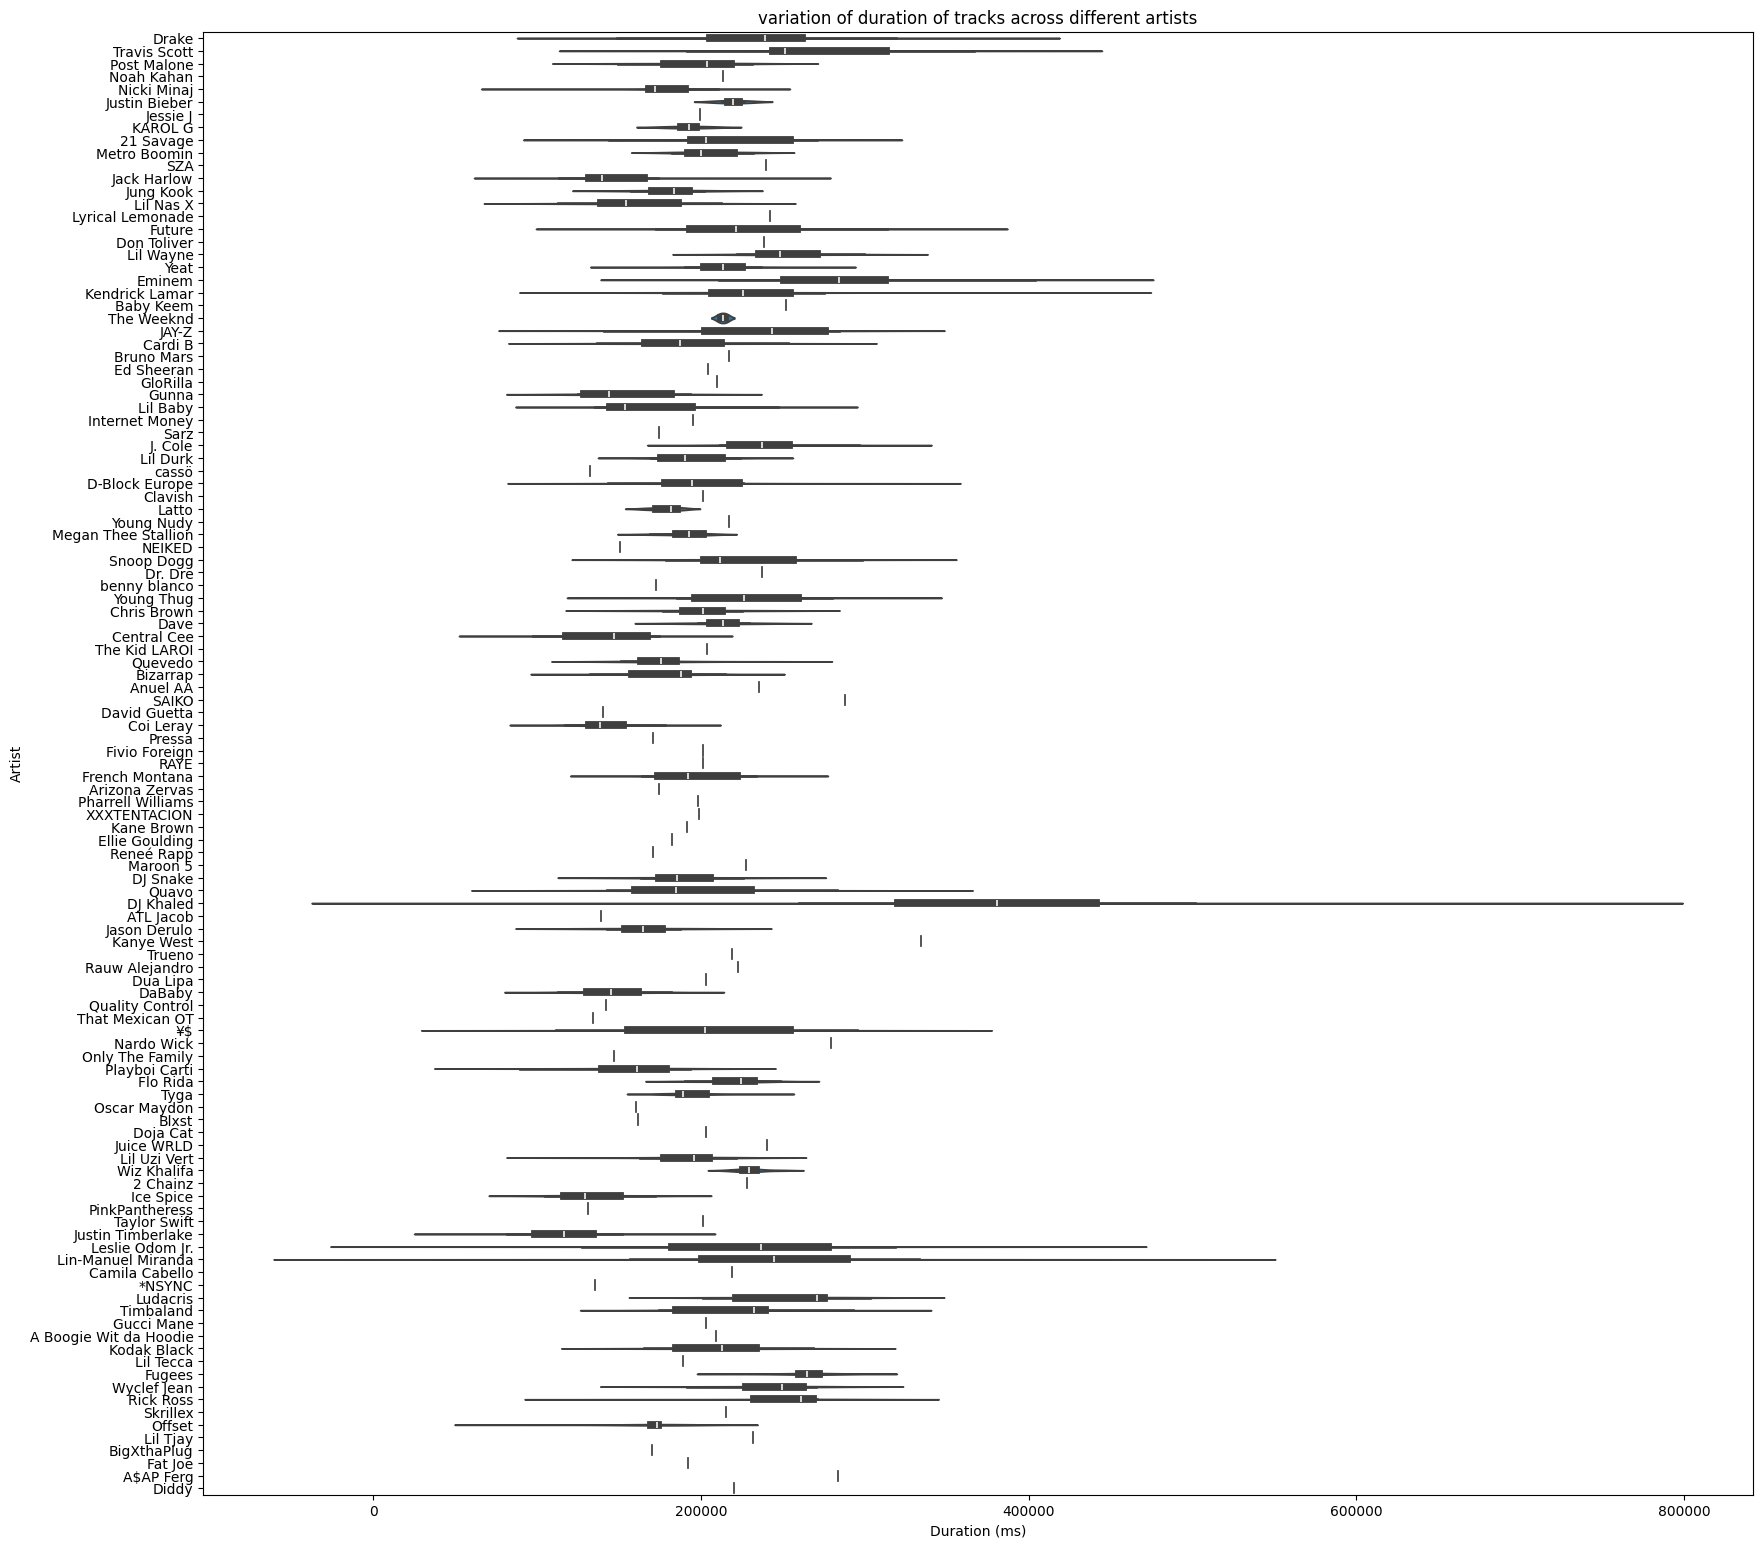

In [714]:
plt.figure(figsize=(20,19))
sns.violinplot(data=ass_4,y="Artist",x="Duration (ms)",orient='h')
plt.title("variation of duration of tracks across different artists")
plt.show()

As we can see in the graph the top artists have very huge variation in duration with a very high standard deviations such as DJ Khaled, Merinda, Jr

## 10)How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot?

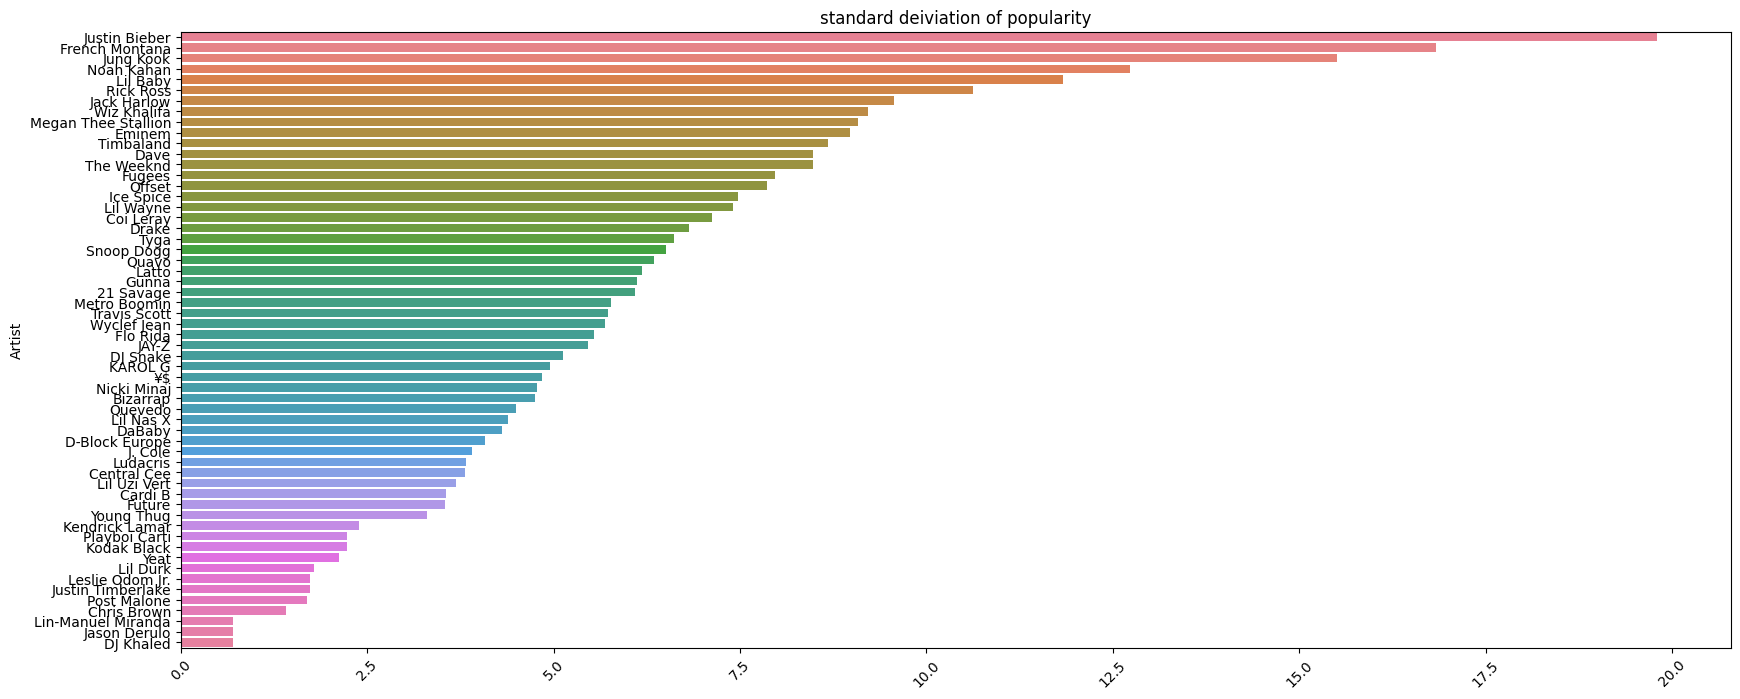

In [727]:
plt.figure(figsize=(20,8))
sns.barplot(data=ass_4.groupby(["Artist"]).agg({"Popularity":'std'}).dropna().sort_values("Popularity")[::-1].T,orient='h')
plt.title("standard deiviation of popularity")
plt.xticks(rotation=45)
plt.show()

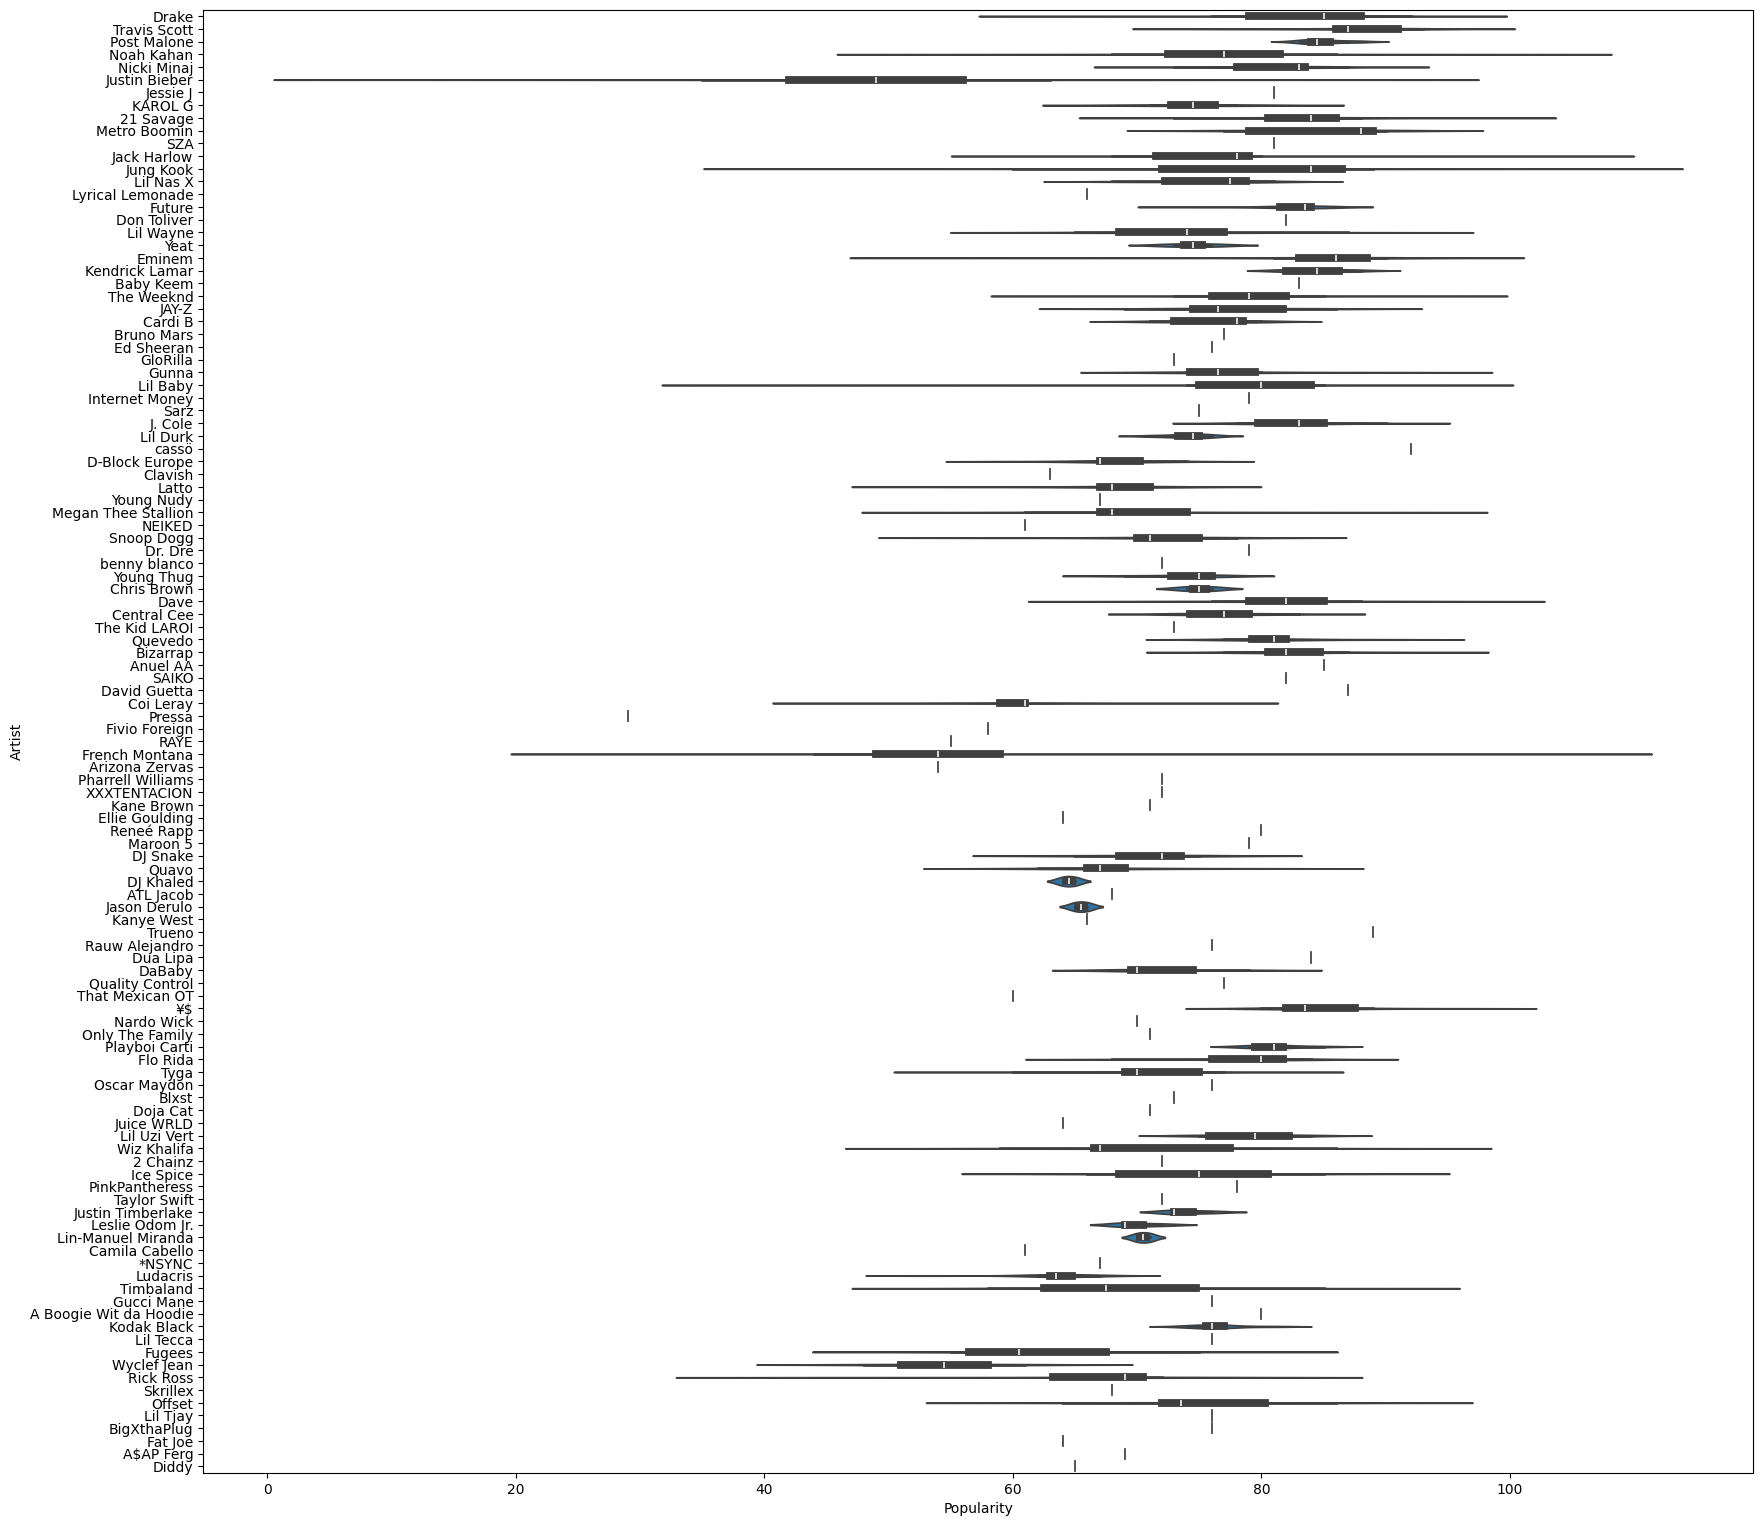

In [719]:
plt.figure(figsize=(20,19))
sns.violinplot(data=ass_4,x="Popularity",y="Artist")
plt.show()

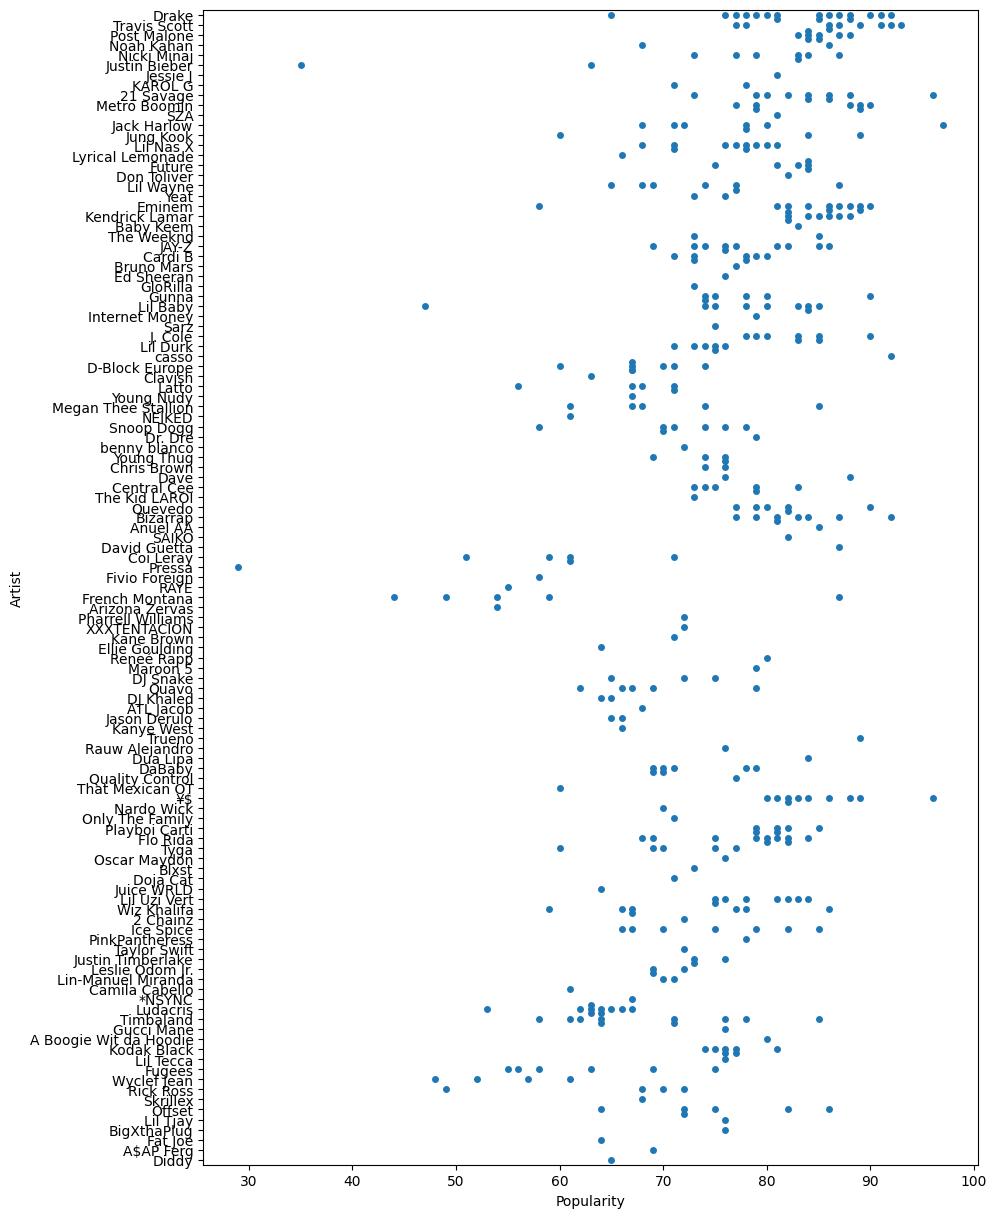

In [686]:
plt.figure(figsize=(10,15))
sns.swarmplot(data=ass_4,x="Popularity",y="Artist")
plt.show()

In [686]:
# You can see some artists have few and very high track variation popularity such as Justin Bieber, french, Zheng and Noah